# CockroachDB - Debug Nodes JSON

Graphs are generated with Matplot and the data is presented in it's raw metric form.

Prerequisites:
* Create the Python environment and activate it
```shell
python -m venv venv
source venv/bin/activate
```

* JupyterLab and other Python libraries

```shell
pip install matplotlib pandas jupyterlab
```

* Generate the debug bundle for the CockroachDB cluster and extract the zip file `nodes.json`
```
cockroach debug zip debug.zip --certs-dir=certs --host=<node-ip>:26257

```
* Validate the file location and Run the JupyterLab project

In [418]:
import pandas as pd
import matplotlib.pyplot as plt
import json

# Before running, validate the location of the nodes.json file
with open('../datasets/nodes.json', 'r') as f:
    data = json.loads(f.read())

# Extract the nodes content
df = pd.json_normalize(data["nodes"])

In [122]:
df[['started_at', 'updated_at', 'store_statuses', 'args', 'env', 'latencies', 'total_system_memory', 'num_cpus', 'desc.node_id', 'desc.address.network_field', 'desc.address.address_field', 'desc.locality.tiers', 'desc.ServerVersion.major', 'desc.ServerVersion.minor', 'desc.ServerVersion.patch', 'desc.ServerVersion.internal']]


started_at           updated_at   
0  1680807842782132525  1682086736887030176  \
1  1680826543263062021  1682086738215060052   
2  1680817097152276022  1682086737810301788   

                                      store_statuses   
0  [{'desc': {'store_id': 1, 'attrs': {}, 'node':...  \
1  [{'desc': {'store_id': 2, 'attrs': {}, 'node':...   
2  [{'desc': {'store_id': 3, 'attrs': {}, 'node':...   

                                                args             env   
0  [/usr/local/bin/cockroach, start, --certs-dir=...  [LANG=C.UTF-8]  \
1  [/usr/local/bin/cockroach, start, --certs-dir=...  [LANG=C.UTF-8]   
2  [/usr/local/bin/cockroach, start, --certs-dir=...  [LANG=C.UTF-8]   

  latencies  total_system_memory  num_cpus  desc.node_id   
0      None           8340787200         2             1  \
1      None           8340779008         2             2   
2      None           8340787200         2             3   

  desc.address.network_field desc.address.address_field desc.locality.tiers   
0                        tcp          192.168.1.8:26257                None  \
1                        tcp         192.168.1.10:26257                None   
2                        tcp          192.168.1.9:26257                None   

   desc.ServerVersion.major  desc.ServerVersion.minor   
0                        22                         2  \
1                        22                         2   
2                        22                         2   

   desc.ServerVersion.patch  desc.ServerVersion.internal  
0                         0                            0  
1                         0                            0  
2                         0                            0

In [123]:
df[['desc.build_tag', 'desc.started_at', 'desc.locality_address', 'desc.cluster_name', 'desc.sql_address.network_field', 'desc.sql_address.address_field', 'desc.http_address.network_field', 'desc.http_address.address_field']]


desc.build_tag      desc.started_at desc.locality_address desc.cluster_name   
0        v22.2.7  1680807842782132525                  None                    \
1        v22.2.7  1680826543263062021                  None                     
2        v22.2.7  1680817097152276022                  None                     

  desc.sql_address.network_field desc.sql_address.address_field   
0                            tcp              192.168.1.8:26257  \
1                            tcp             192.168.1.10:26257   
2                            tcp              192.168.1.9:26257   

  desc.http_address.network_field desc.http_address.address_field  
0                             tcp                192.168.1.8:8080  
1                             tcp               192.168.1.10:8080  
2                             tcp                192.168.1.9:8080

In [124]:
df[['build_info.go_version', 'build_info.tag', 'build_info.time', 'build_info.revision', 'build_info.cgo_compiler', 'build_info.cgo_target_triple', 'build_info.platform', 'build_info.distribution', 'build_info.type', 'build_info.channel', 'build_info.env_channel']]


build_info.go_version build_info.tag      build_info.time   
0              go1.19.6        v22.2.7  2023/03/28 19:47:29  \
1              go1.19.6        v22.2.7  2023/03/28 19:47:29   
2              go1.19.6        v22.2.7  2023/03/28 19:47:29   

                        build_info.revision build_info.cgo_compiler   
0  cbe33971930ee972e639203a73f14240b92aeff4               gcc 6.5.0  \
1  cbe33971930ee972e639203a73f14240b92aeff4               gcc 6.5.0   
2  cbe33971930ee972e639203a73f14240b92aeff4               gcc 6.5.0   

  build_info.cgo_target_triple build_info.platform build_info.distribution   
0          x86_64-pc-linux-gnu         linux amd64                     CCL  \
1          x86_64-pc-linux-gnu         linux amd64                     CCL   
2          x86_64-pc-linux-gnu         linux amd64                     CCL   

  build_info.type build_info.channel build_info.env_channel  
0         release    official-binary                unknown  
1         release    official-binary                unknown  
2         release    official-binary                unknown

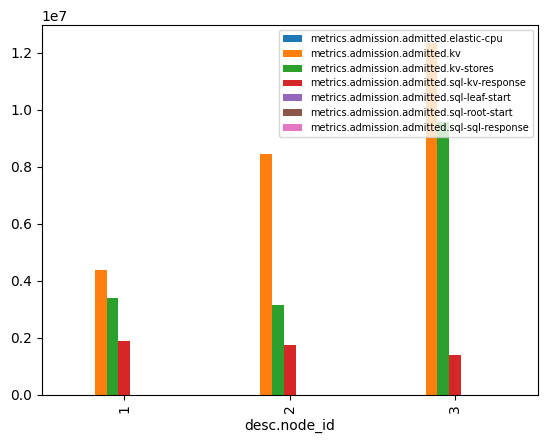

In [125]:
df.plot.bar(x='desc.node_id',y=['metrics.admission.admitted.elastic-cpu', 'metrics.admission.admitted.kv', 'metrics.admission.admitted.kv-stores', 'metrics.admission.admitted.sql-kv-response', 'metrics.admission.admitted.sql-leaf-start', 'metrics.admission.admitted.sql-root-start', 'metrics.admission.admitted.sql-sql-response'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

In [126]:
df.plot.bar(x='desc.node_id',y=['metrics.admission.elastic_cpu.acquired_nanos', 'metrics.admission.elastic_cpu.max_available_nanos', 'metrics.admission.elastic_cpu.returned_nanos', 'metrics.admission.elastic_cpu.utilization', 'metrics.admission.elastic_cpu.utilization_limit'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

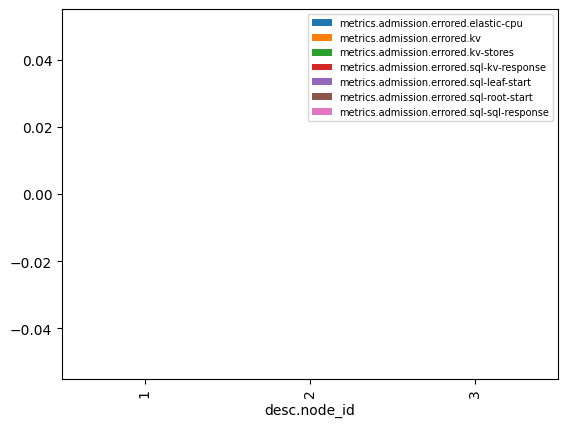

In [127]:
df.plot.bar(x='desc.node_id',y=['metrics.admission.errored.elastic-cpu', 'metrics.admission.errored.kv', 'metrics.admission.errored.kv-stores', 'metrics.admission.errored.sql-kv-response', 'metrics.admission.errored.sql-leaf-start', 'metrics.admission.errored.sql-root-start', 'metrics.admission.errored.sql-sql-response'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

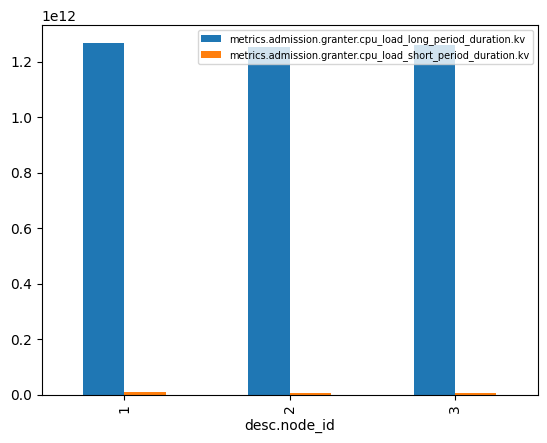

In [128]:
df.plot.bar(x='desc.node_id',y=['metrics.admission.granter.cpu_load_long_period_duration.kv', 'metrics.admission.granter.cpu_load_short_period_duration.kv'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

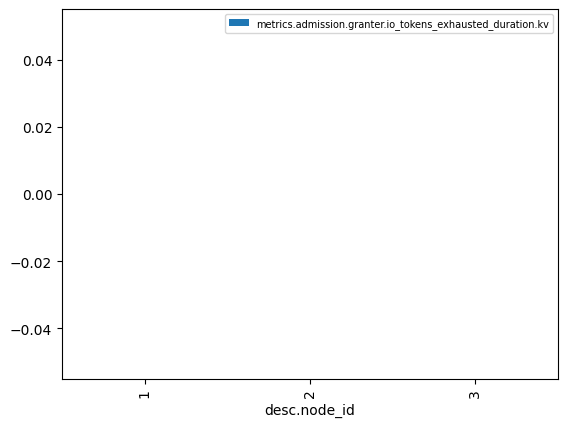

In [129]:
df.plot.bar(x='desc.node_id',y=['metrics.admission.granter.io_tokens_exhausted_duration.kv'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

In [130]:
df.plot.bar(x='desc.node_id',y=['metrics.admission.granter.slot_adjuster_decrements.kv', 'metrics.admission.granter.slot_adjuster_increments.kv', 'metrics.admission.granter.slots_exhausted_duration.kv'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

In [131]:
df.plot.bar(x='desc.node_id',y=['metrics.admission.granter.total_moderate_slots.kv', 'metrics.admission.granter.total_slots.kv', 'metrics.admission.granter.used_slots.kv', 'metrics.admission.granter.used_slots.sql-leaf-start', 'metrics.admission.granter.used_slots.sql-root-start', 'metrics.admission.granter.used_soft_slots.kv'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

In [132]:
df.plot.bar(x='desc.node_id',y=['metrics.admission.requested.elastic-cpu', 'metrics.admission.requested.kv', 'metrics.admission.requested.kv-stores', 'metrics.admission.requested.sql-kv-response', 'metrics.admission.requested.sql-leaf-start', 'metrics.admission.requested.sql-root-start', 'metrics.admission.requested.sql-sql-response',])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

In [133]:
df.plot.bar(x='desc.node_id',y=['metrics.admission.scheduler_latency_listener.p99_nanos'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

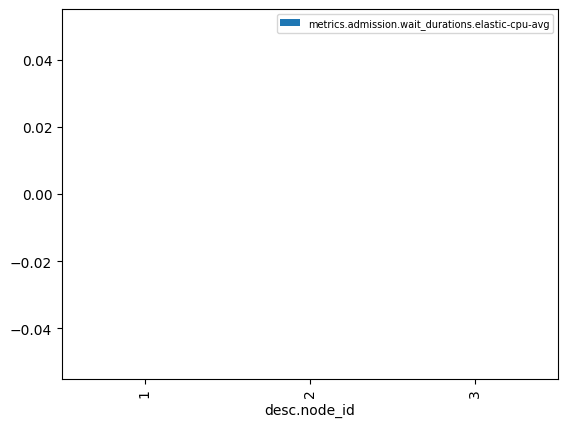

In [134]:
df.plot.bar(x='desc.node_id',y=['metrics.admission.wait_durations.elastic-cpu-avg'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

In [135]:
df.plot.bar(x='desc.node_id',y=['metrics.admission.wait_durations.elastic-cpu-count'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

In [136]:
df.plot.bar(x='desc.node_id',y=['metrics.admission.wait_durations.elastic-cpu-max'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

In [137]:
df.plot.bar(x='desc.node_id',y=['metrics.admission.wait_durations.elastic-cpu-p50', 'metrics.admission.wait_durations.elastic-cpu-p75', 'metrics.admission.wait_durations.elastic-cpu-p90', 'metrics.admission.wait_durations.elastic-cpu-p99', 'metrics.admission.wait_durations.elastic-cpu-p99.9', 'metrics.admission.wait_durations.elastic-cpu-p99.99', 'metrics.admission.wait_durations.elastic-cpu-p99.999'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

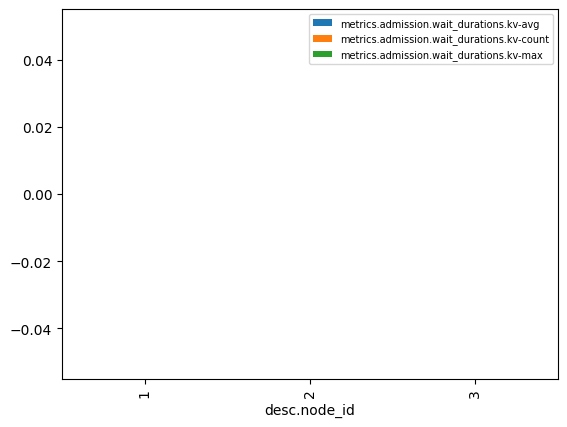

In [138]:
df.plot.bar(x='desc.node_id',y=['metrics.admission.wait_durations.kv-avg', 'metrics.admission.wait_durations.kv-count', 'metrics.admission.wait_durations.kv-max'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

In [139]:
df.plot.bar(x='desc.node_id',y=['metrics.admission.wait_durations.kv-p50', 'metrics.admission.wait_durations.kv-p75', 'metrics.admission.wait_durations.kv-p90', 'metrics.admission.wait_durations.kv-p99', 'metrics.admission.wait_durations.kv-p99.9', 'metrics.admission.wait_durations.kv-p99.99', 'metrics.admission.wait_durations.kv-p99.999'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

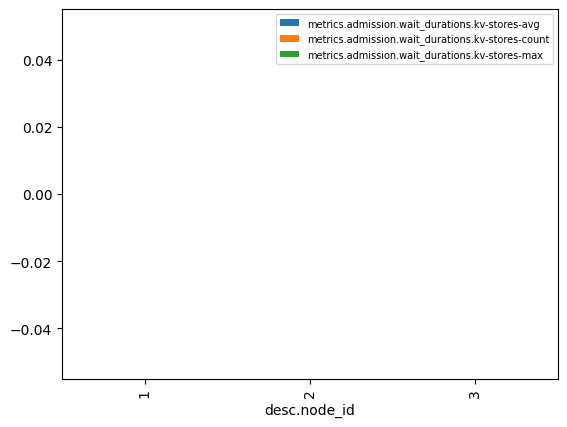

In [140]:
df.plot.bar(x='desc.node_id',y=['metrics.admission.wait_durations.kv-stores-avg', 'metrics.admission.wait_durations.kv-stores-count', 'metrics.admission.wait_durations.kv-stores-max'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

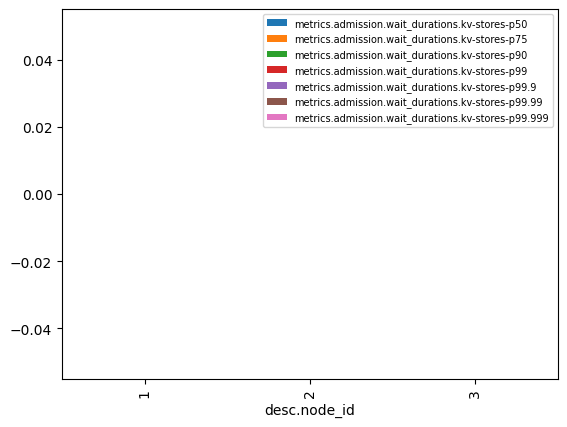

In [141]:
df.plot.bar(x='desc.node_id',y=['metrics.admission.wait_durations.kv-stores-p50', 'metrics.admission.wait_durations.kv-stores-p75', 'metrics.admission.wait_durations.kv-stores-p90', 'metrics.admission.wait_durations.kv-stores-p99', 'metrics.admission.wait_durations.kv-stores-p99.9', 'metrics.admission.wait_durations.kv-stores-p99.99', 'metrics.admission.wait_durations.kv-stores-p99.999'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

In [142]:
df.plot.bar(x='desc.node_id',y=['metrics.admission.wait_durations.sql-kv-response-avg', 'metrics.admission.wait_durations.sql-kv-response-count', 'metrics.admission.wait_durations.sql-kv-response-max'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

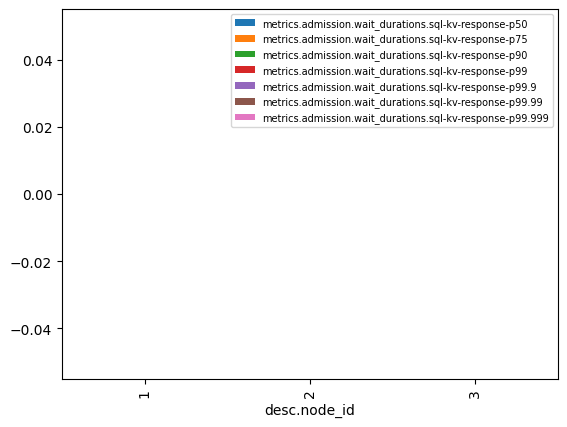

In [143]:
df.plot.bar(x='desc.node_id',y=['metrics.admission.wait_durations.sql-kv-response-p50', 'metrics.admission.wait_durations.sql-kv-response-p75', 'metrics.admission.wait_durations.sql-kv-response-p90', 'metrics.admission.wait_durations.sql-kv-response-p99', 'metrics.admission.wait_durations.sql-kv-response-p99.9', 'metrics.admission.wait_durations.sql-kv-response-p99.99', 'metrics.admission.wait_durations.sql-kv-response-p99.999'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

In [144]:
df.plot.bar(x='desc.node_id',y=['metrics.admission.wait_durations.sql-leaf-start-avg', 'metrics.admission.wait_durations.sql-leaf-start-count', 'metrics.admission.wait_durations.sql-leaf-start-max'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

In [145]:
df.plot.bar(x='desc.node_id',y=['metrics.admission.wait_durations.sql-leaf-start-p50', 'metrics.admission.wait_durations.sql-leaf-start-p75', 'metrics.admission.wait_durations.sql-leaf-start-p90', 'metrics.admission.wait_durations.sql-leaf-start-p99', 'metrics.admission.wait_durations.sql-leaf-start-p99.9', 'metrics.admission.wait_durations.sql-leaf-start-p99.99', 'metrics.admission.wait_durations.sql-leaf-start-p99.999'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

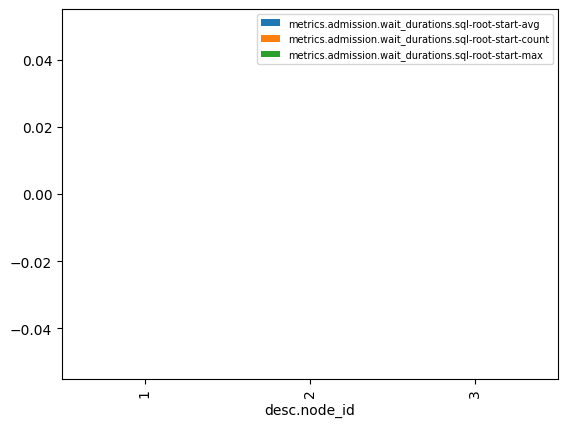

In [146]:
df.plot.bar(x='desc.node_id',y=['metrics.admission.wait_durations.sql-root-start-avg', 'metrics.admission.wait_durations.sql-root-start-count', 'metrics.admission.wait_durations.sql-root-start-max'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

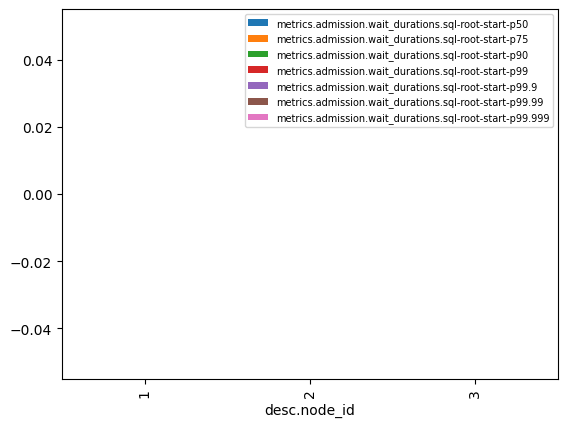

In [147]:
df.plot.bar(x='desc.node_id',y=['metrics.admission.wait_durations.sql-root-start-p50', 'metrics.admission.wait_durations.sql-root-start-p75', 'metrics.admission.wait_durations.sql-root-start-p90', 'metrics.admission.wait_durations.sql-root-start-p99', 'metrics.admission.wait_durations.sql-root-start-p99.9', 'metrics.admission.wait_durations.sql-root-start-p99.99', 'metrics.admission.wait_durations.sql-root-start-p99.999'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

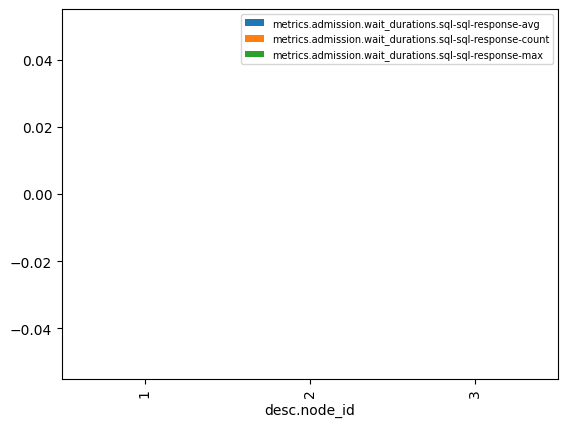

In [148]:
df.plot.bar(x='desc.node_id',y=['metrics.admission.wait_durations.sql-sql-response-avg', 'metrics.admission.wait_durations.sql-sql-response-count', 'metrics.admission.wait_durations.sql-sql-response-max'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

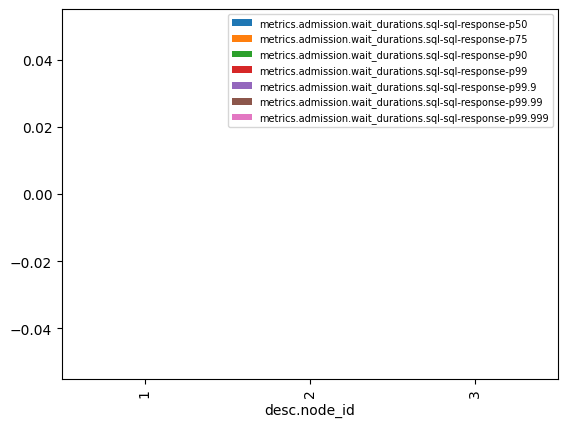

In [149]:
df.plot.bar(x='desc.node_id',y=['metrics.admission.wait_durations.sql-sql-response-p50', 'metrics.admission.wait_durations.sql-sql-response-p75', 'metrics.admission.wait_durations.sql-sql-response-p90', 'metrics.admission.wait_durations.sql-sql-response-p99', 'metrics.admission.wait_durations.sql-sql-response-p99.9', 'metrics.admission.wait_durations.sql-sql-response-p99.99', 'metrics.admission.wait_durations.sql-sql-response-p99.999'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

In [150]:
df.plot.bar(x='desc.node_id',y=['metrics.admission.wait_queue_length.elastic-cpu', 'metrics.admission.wait_queue_length.kv', 'metrics.admission.wait_queue_length.kv-stores', 'metrics.admission.wait_queue_length.sql-kv-response', 'metrics.admission.wait_queue_length.sql-leaf-start', 'metrics.admission.wait_queue_length.sql-root-start', 'metrics.admission.wait_queue_length.sql-sql-response'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

In [151]:
df.plot.bar(x='desc.node_id',y=['metrics.admission.wait_sum.elastic-cpu', 'metrics.admission.wait_sum.kv', 'metrics.admission.wait_sum.kv-stores', 'metrics.admission.wait_sum.sql-kv-response', 'metrics.admission.wait_sum.sql-leaf-start', 'metrics.admission.wait_sum.sql-root-start', 'metrics.admission.wait_sum.sql-sql-response'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

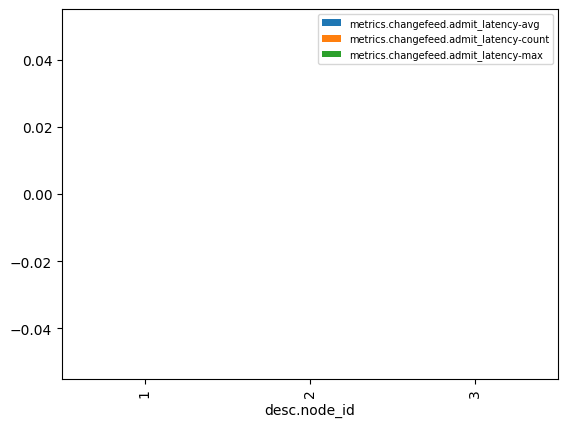

In [153]:
df.plot.bar(x='desc.node_id',y=['metrics.changefeed.admit_latency-avg', 'metrics.changefeed.admit_latency-count', 'metrics.changefeed.admit_latency-max'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

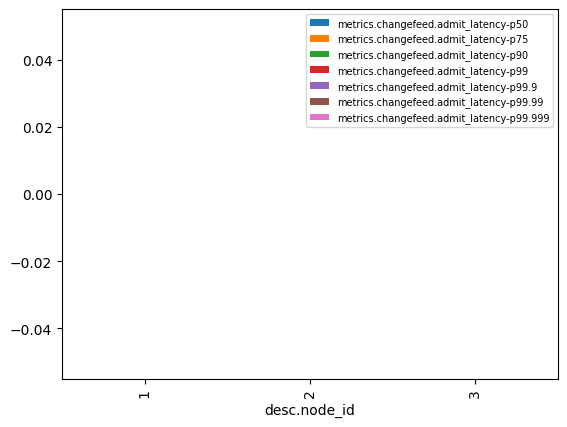

In [154]:
df.plot.bar(x='desc.node_id',y=['metrics.changefeed.admit_latency-p50', 'metrics.changefeed.admit_latency-p75', 'metrics.changefeed.admit_latency-p90', 'metrics.changefeed.admit_latency-p99', 'metrics.changefeed.admit_latency-p99.9', 'metrics.changefeed.admit_latency-p99.99', 'metrics.changefeed.admit_latency-p99.999'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

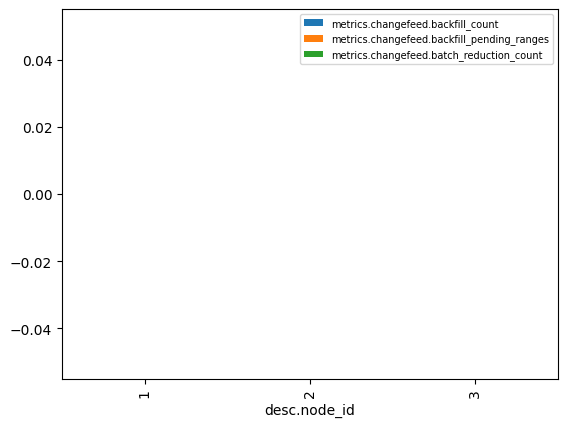

In [155]:
df.plot.bar(x='desc.node_id',y=['metrics.changefeed.backfill_count', 'metrics.changefeed.backfill_pending_ranges', 'metrics.changefeed.batch_reduction_count'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

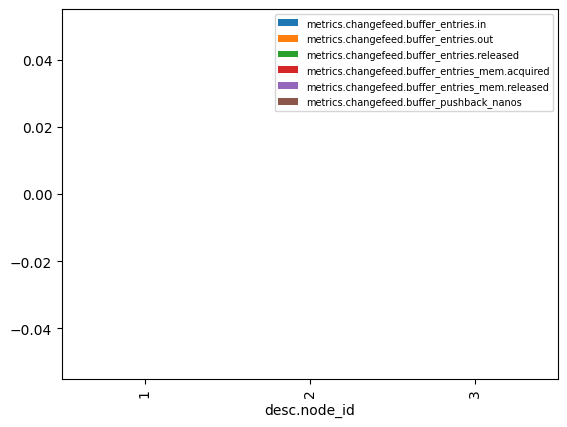

In [156]:
df.plot.bar(x='desc.node_id',y=['metrics.changefeed.buffer_entries.in', 'metrics.changefeed.buffer_entries.out', 'metrics.changefeed.buffer_entries.released', 'metrics.changefeed.buffer_entries_mem.acquired', 'metrics.changefeed.buffer_entries_mem.released', 'metrics.changefeed.buffer_pushback_nanos'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

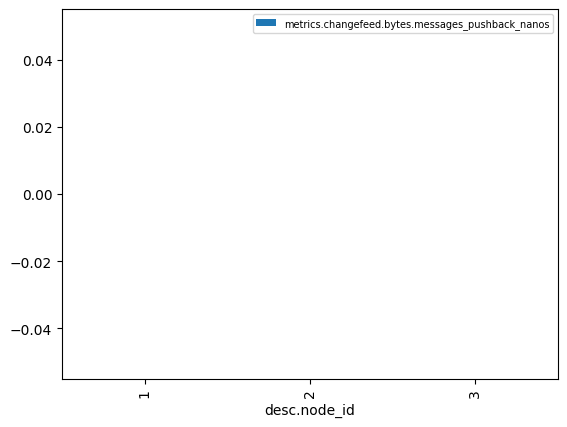

In [157]:
df.plot.bar(x='desc.node_id',y=['metrics.changefeed.bytes.messages_pushback_nanos'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

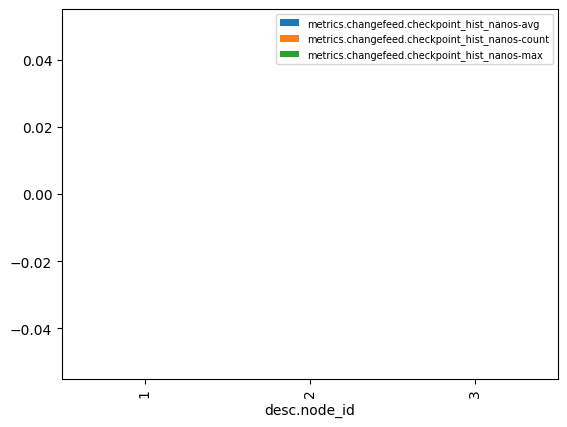

In [158]:
df.plot.bar(x='desc.node_id',y=['metrics.changefeed.checkpoint_hist_nanos-avg', 'metrics.changefeed.checkpoint_hist_nanos-count', 'metrics.changefeed.checkpoint_hist_nanos-max'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

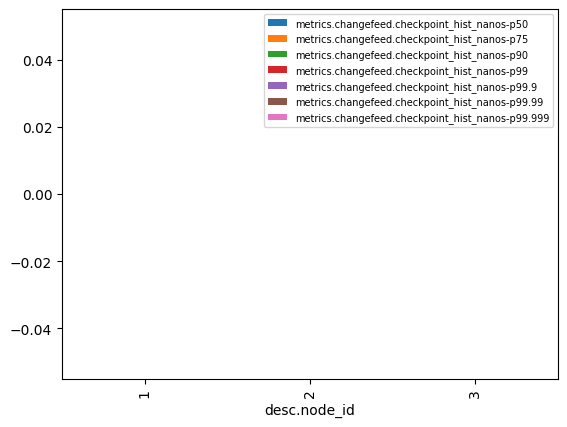

In [159]:
df.plot.bar(x='desc.node_id',y=['metrics.changefeed.checkpoint_hist_nanos-p50', 'metrics.changefeed.checkpoint_hist_nanos-p75', 'metrics.changefeed.checkpoint_hist_nanos-p90', 'metrics.changefeed.checkpoint_hist_nanos-p99', 'metrics.changefeed.checkpoint_hist_nanos-p99.9', 'metrics.changefeed.checkpoint_hist_nanos-p99.99', 'metrics.changefeed.checkpoint_hist_nanos-p99.999'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

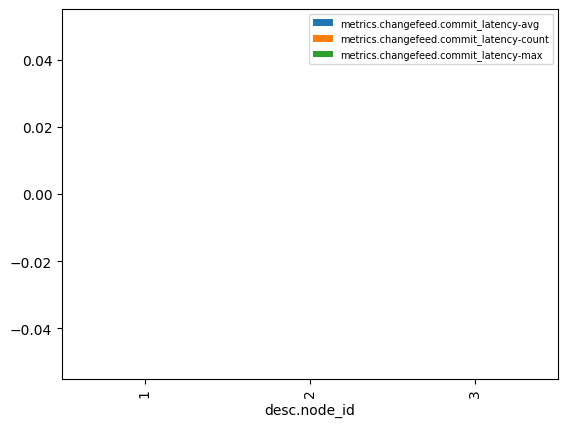

In [160]:
df.plot.bar(x='desc.node_id',y=['metrics.changefeed.commit_latency-avg', 'metrics.changefeed.commit_latency-count', 'metrics.changefeed.commit_latency-max'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

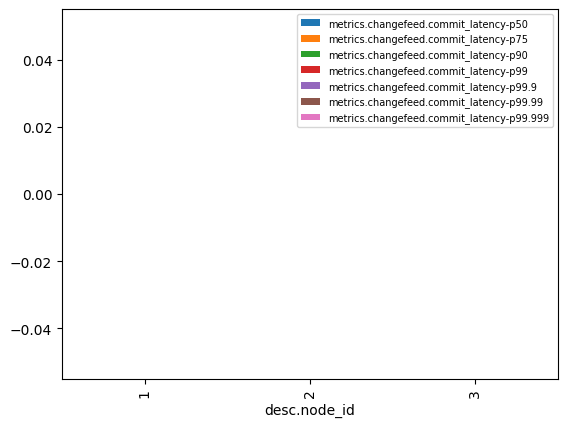

In [161]:
df.plot.bar(x='desc.node_id',y=['metrics.changefeed.commit_latency-p50', 'metrics.changefeed.commit_latency-p75', 'metrics.changefeed.commit_latency-p90', 'metrics.changefeed.commit_latency-p99', 'metrics.changefeed.commit_latency-p99.9', 'metrics.changefeed.commit_latency-p99.99', 'metrics.changefeed.commit_latency-p99.999'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

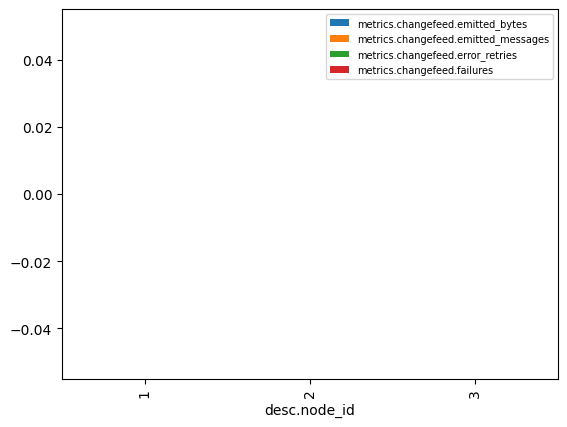

In [162]:
df.plot.bar(x='desc.node_id',y=['metrics.changefeed.emitted_bytes', 'metrics.changefeed.emitted_messages', 'metrics.changefeed.error_retries', 'metrics.changefeed.failures'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

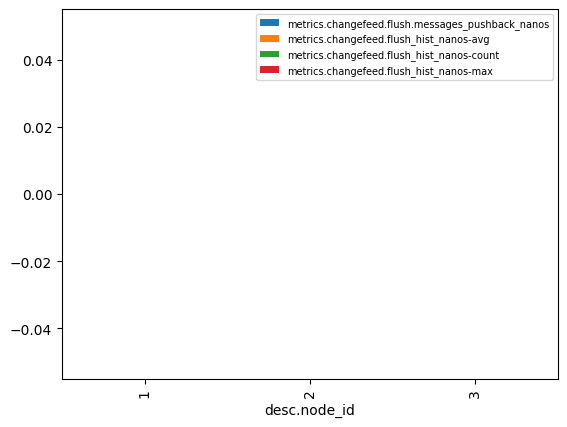

In [163]:
df.plot.bar(x='desc.node_id',y=['metrics.changefeed.flush.messages_pushback_nanos', 'metrics.changefeed.flush_hist_nanos-avg', 'metrics.changefeed.flush_hist_nanos-count', 'metrics.changefeed.flush_hist_nanos-max'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

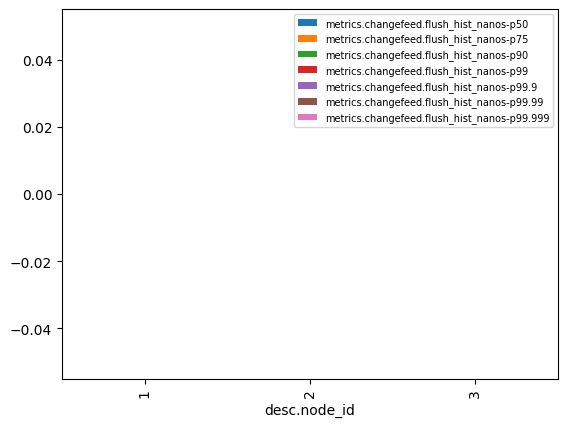

In [164]:
df.plot.bar(x='desc.node_id',y=['metrics.changefeed.flush_hist_nanos-p50', 'metrics.changefeed.flush_hist_nanos-p75', 'metrics.changefeed.flush_hist_nanos-p90', 'metrics.changefeed.flush_hist_nanos-p99', 'metrics.changefeed.flush_hist_nanos-p99.9', 'metrics.changefeed.flush_hist_nanos-p99.99', 'metrics.changefeed.flush_hist_nanos-p99.999'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

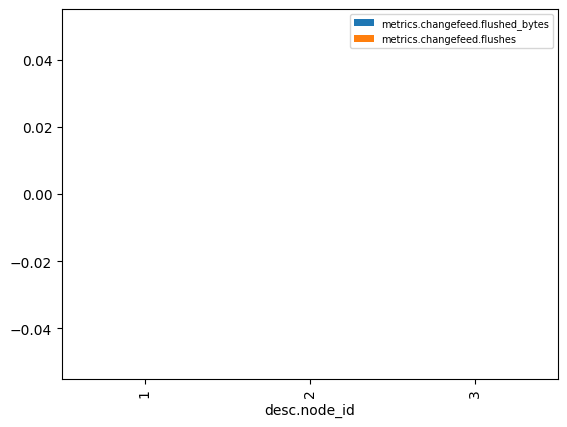

In [165]:
df.plot.bar(x='desc.node_id',y=['metrics.changefeed.flushed_bytes', 'metrics.changefeed.flushes'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

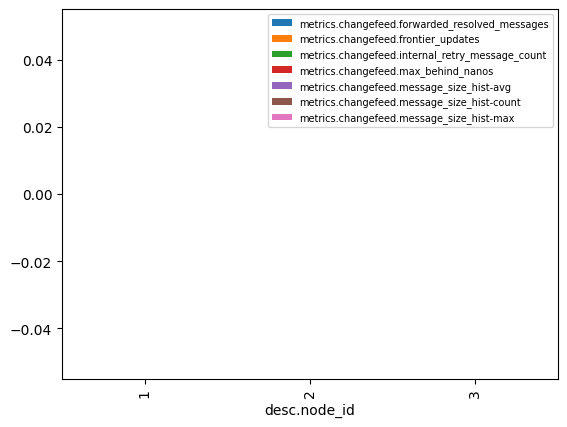

In [166]:
df.plot.bar(x='desc.node_id',y=['metrics.changefeed.forwarded_resolved_messages', 'metrics.changefeed.frontier_updates', 'metrics.changefeed.internal_retry_message_count', 'metrics.changefeed.max_behind_nanos', 'metrics.changefeed.message_size_hist-avg', 'metrics.changefeed.message_size_hist-count', 'metrics.changefeed.message_size_hist-max'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

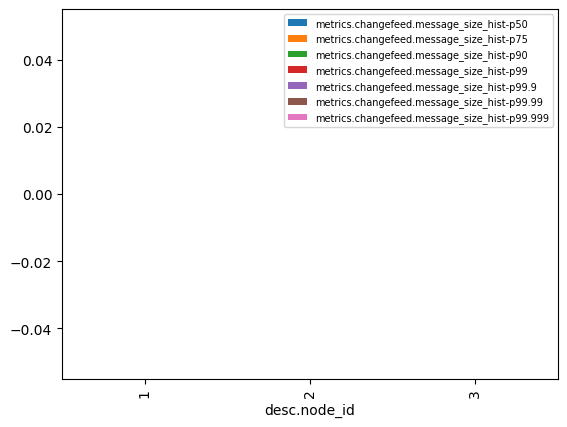

In [167]:
df.plot.bar(x='desc.node_id',y=['metrics.changefeed.message_size_hist-p50', 'metrics.changefeed.message_size_hist-p75', 'metrics.changefeed.message_size_hist-p90', 'metrics.changefeed.message_size_hist-p99', 'metrics.changefeed.message_size_hist-p99.9', 'metrics.changefeed.message_size_hist-p99.99', 'metrics.changefeed.message_size_hist-p99.999'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

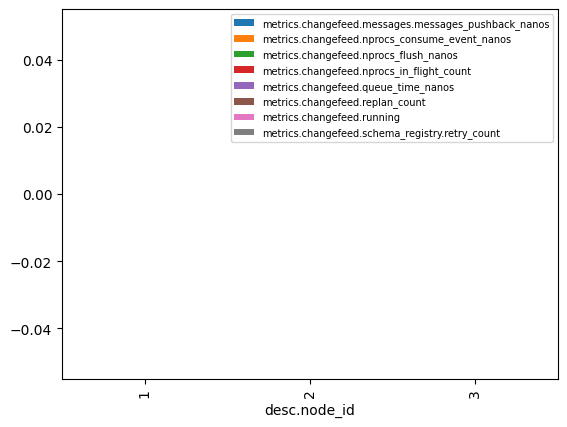

In [168]:
df.plot.bar(x='desc.node_id',y=['metrics.changefeed.messages.messages_pushback_nanos', 'metrics.changefeed.nprocs_consume_event_nanos', 'metrics.changefeed.nprocs_flush_nanos', 'metrics.changefeed.nprocs_in_flight_count', 'metrics.changefeed.queue_time_nanos', 'metrics.changefeed.replan_count', 'metrics.changefeed.running', 'metrics.changefeed.schema_registry.retry_count'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

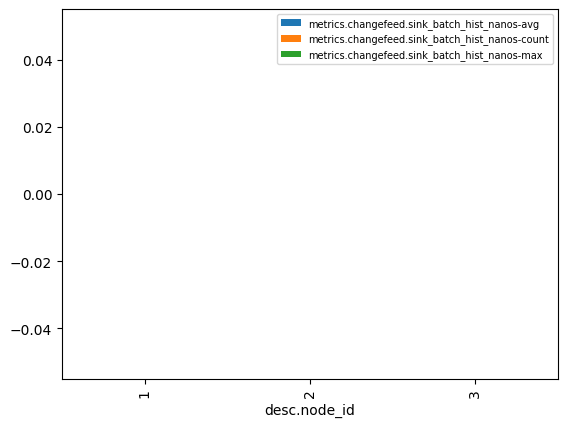

In [169]:
df.plot.bar(x='desc.node_id',y=['metrics.changefeed.sink_batch_hist_nanos-avg', 'metrics.changefeed.sink_batch_hist_nanos-count', 'metrics.changefeed.sink_batch_hist_nanos-max'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

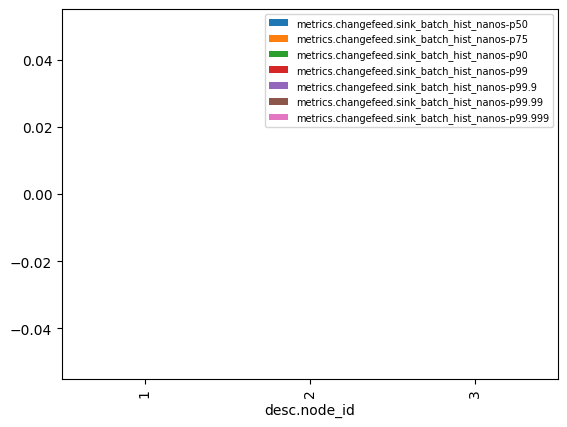

In [170]:
df.plot.bar(x='desc.node_id',y=['metrics.changefeed.sink_batch_hist_nanos-p50', 'metrics.changefeed.sink_batch_hist_nanos-p75', 'metrics.changefeed.sink_batch_hist_nanos-p90', 'metrics.changefeed.sink_batch_hist_nanos-p99', 'metrics.changefeed.sink_batch_hist_nanos-p99.9', 'metrics.changefeed.sink_batch_hist_nanos-p99.99', 'metrics.changefeed.sink_batch_hist_nanos-p99.999'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

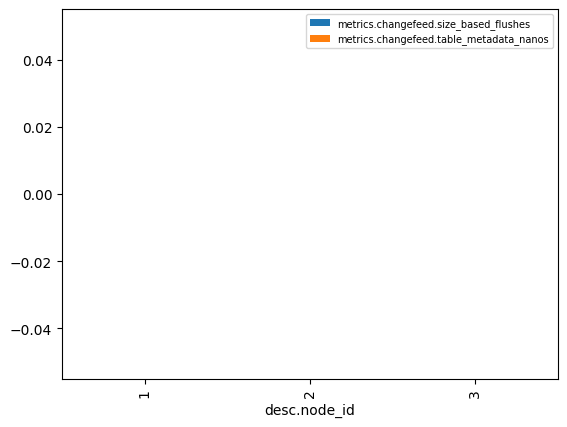

In [171]:
df.plot.bar(x='desc.node_id',y=['metrics.changefeed.size_based_flushes', 'metrics.changefeed.table_metadata_nanos'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

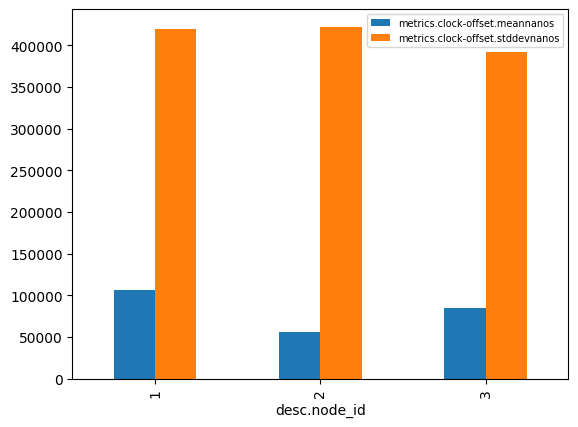

In [172]:
df.plot.bar(x='desc.node_id',y=['metrics.clock-offset.meannanos', 'metrics.clock-offset.stddevnanos'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

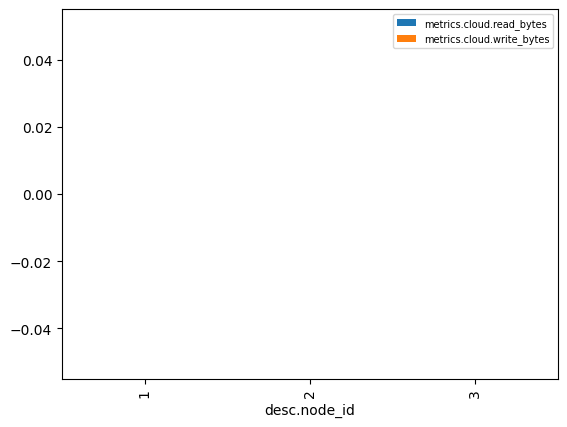

In [173]:
df.plot.bar(x='desc.node_id',y=['metrics.cloud.read_bytes', 'metrics.cloud.write_bytes'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

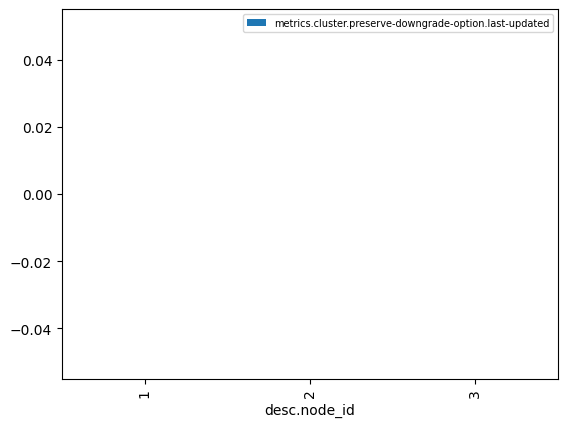

In [174]:
df.plot.bar(x='desc.node_id',y=['metrics.cluster.preserve-downgrade-option.last-updated'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

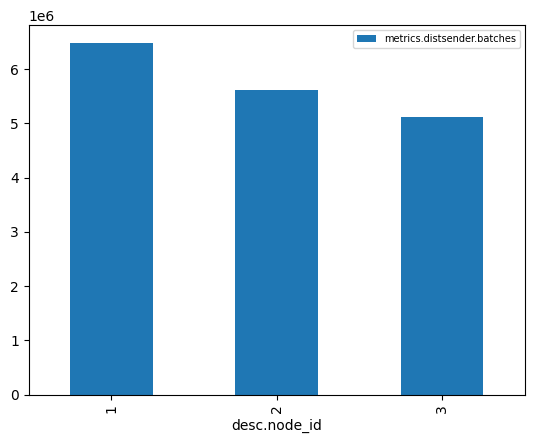

In [175]:
df.plot.bar(x='desc.node_id',y=['metrics.distsender.batches'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

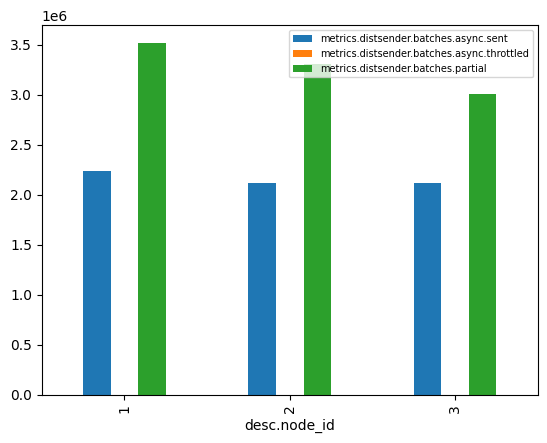

In [176]:
df.plot.bar(x='desc.node_id',y=['metrics.distsender.batches.async.sent', 'metrics.distsender.batches.async.throttled', 'metrics.distsender.batches.partial'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

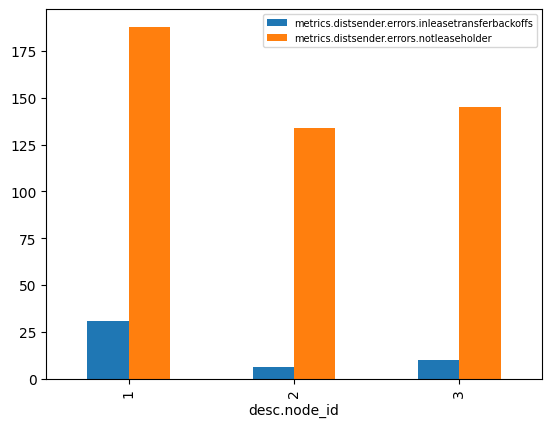

In [177]:
df.plot.bar(x='desc.node_id',y=['metrics.distsender.errors.inleasetransferbackoffs', 'metrics.distsender.errors.notleaseholder'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

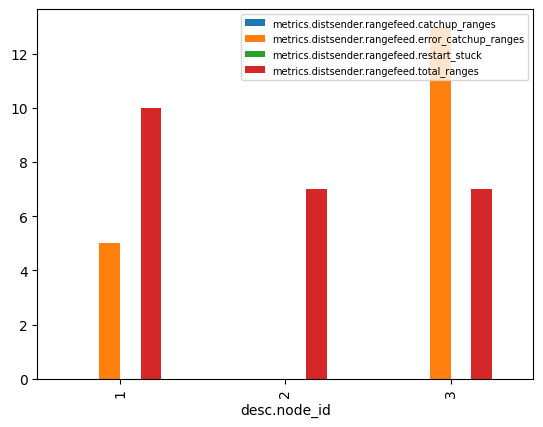

In [178]:
df.plot.bar(x='desc.node_id',y=['metrics.distsender.rangefeed.catchup_ranges', 'metrics.distsender.rangefeed.error_catchup_ranges', 'metrics.distsender.rangefeed.restart_stuck', 'metrics.distsender.rangefeed.total_ranges'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

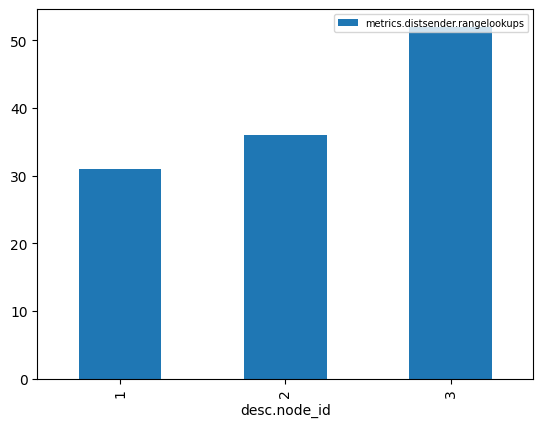

In [179]:
df.plot.bar(x='desc.node_id',y=['metrics.distsender.rangelookups'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

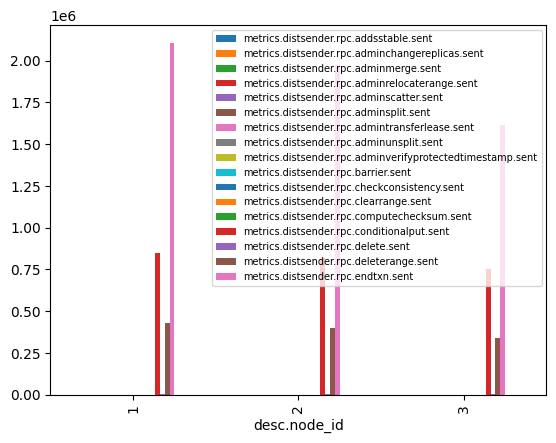

In [180]:
df.plot.bar(x='desc.node_id',y=['metrics.distsender.rpc.addsstable.sent', 'metrics.distsender.rpc.adminchangereplicas.sent', 'metrics.distsender.rpc.adminmerge.sent', 'metrics.distsender.rpc.adminrelocaterange.sent', 'metrics.distsender.rpc.adminscatter.sent', 'metrics.distsender.rpc.adminsplit.sent', 'metrics.distsender.rpc.admintransferlease.sent', 'metrics.distsender.rpc.adminunsplit.sent', 'metrics.distsender.rpc.adminverifyprotectedtimestamp.sent', 'metrics.distsender.rpc.barrier.sent', 'metrics.distsender.rpc.checkconsistency.sent', 'metrics.distsender.rpc.clearrange.sent', 'metrics.distsender.rpc.computechecksum.sent', 'metrics.distsender.rpc.conditionalput.sent', 'metrics.distsender.rpc.delete.sent', 'metrics.distsender.rpc.deleterange.sent', 'metrics.distsender.rpc.endtxn.sent'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

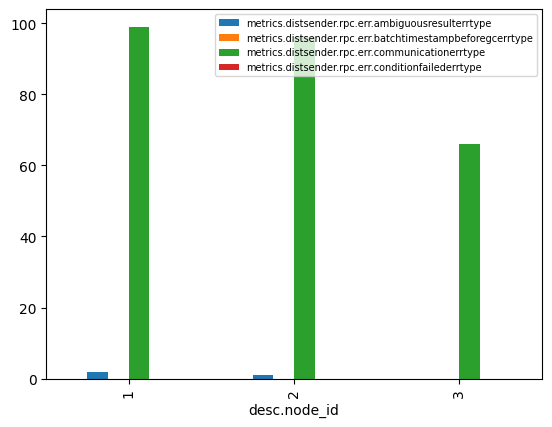

In [181]:
df.plot.bar(x='desc.node_id',y=['metrics.distsender.rpc.err.ambiguousresulterrtype', 'metrics.distsender.rpc.err.batchtimestampbeforegcerrtype', 'metrics.distsender.rpc.err.communicationerrtype', 'metrics.distsender.rpc.err.conditionfailederrtype'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

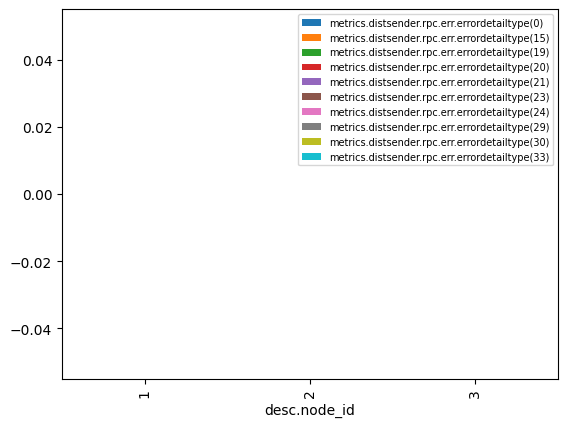

In [182]:
df.plot.bar(x='desc.node_id',y=['metrics.distsender.rpc.err.errordetailtype(0)', 'metrics.distsender.rpc.err.errordetailtype(15)', 'metrics.distsender.rpc.err.errordetailtype(19)', 'metrics.distsender.rpc.err.errordetailtype(20)', 'metrics.distsender.rpc.err.errordetailtype(21)', 'metrics.distsender.rpc.err.errordetailtype(23)', 'metrics.distsender.rpc.err.errordetailtype(24)', 'metrics.distsender.rpc.err.errordetailtype(29)', 'metrics.distsender.rpc.err.errordetailtype(30)', 'metrics.distsender.rpc.err.errordetailtype(33)'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

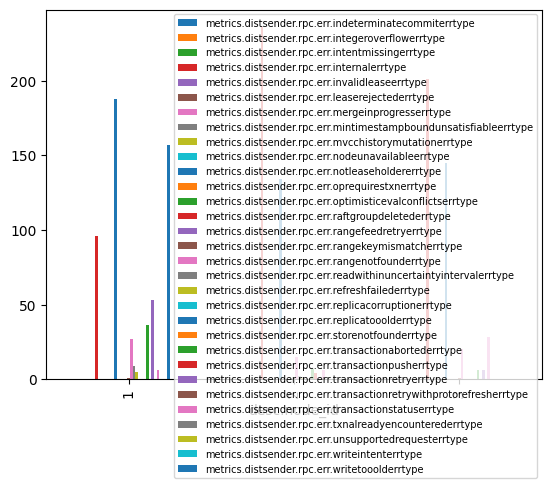

In [183]:
df.plot.bar(x='desc.node_id',y=['metrics.distsender.rpc.err.indeterminatecommiterrtype', 'metrics.distsender.rpc.err.integeroverflowerrtype', 'metrics.distsender.rpc.err.intentmissingerrtype', 'metrics.distsender.rpc.err.internalerrtype', 'metrics.distsender.rpc.err.invalidleaseerrtype', 'metrics.distsender.rpc.err.leaserejectederrtype', 'metrics.distsender.rpc.err.mergeinprogresserrtype', 'metrics.distsender.rpc.err.mintimestampboundunsatisfiableerrtype', 'metrics.distsender.rpc.err.mvcchistorymutationerrtype', 'metrics.distsender.rpc.err.nodeunavailableerrtype', 'metrics.distsender.rpc.err.notleaseholdererrtype', 'metrics.distsender.rpc.err.oprequirestxnerrtype', 'metrics.distsender.rpc.err.optimisticevalconflictserrtype', 'metrics.distsender.rpc.err.raftgroupdeletederrtype', 'metrics.distsender.rpc.err.rangefeedretryerrtype', 'metrics.distsender.rpc.err.rangekeymismatcherrtype', 'metrics.distsender.rpc.err.rangenotfounderrtype', 'metrics.distsender.rpc.err.readwithinuncertaintyintervalerrtype', 'metrics.distsender.rpc.err.refreshfailederrtype', 'metrics.distsender.rpc.err.replicacorruptionerrtype', 'metrics.distsender.rpc.err.replicatooolderrtype', 'metrics.distsender.rpc.err.storenotfounderrtype', 'metrics.distsender.rpc.err.transactionabortederrtype', 'metrics.distsender.rpc.err.transactionpusherrtype', 'metrics.distsender.rpc.err.transactionretryerrtype', 'metrics.distsender.rpc.err.transactionretrywithprotorefresherrtype', 'metrics.distsender.rpc.err.transactionstatuserrtype', 'metrics.distsender.rpc.err.txnalreadyencounterederrtype', 'metrics.distsender.rpc.err.unsupportedrequesterrtype', 'metrics.distsender.rpc.err.writeintenterrtype', 'metrics.distsender.rpc.err.writetooolderrtype'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

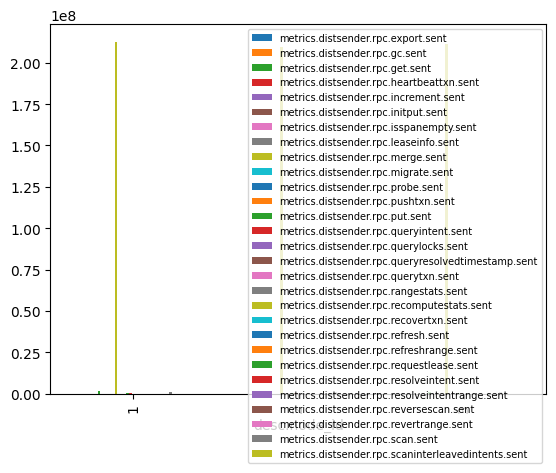

In [184]:
df.plot.bar(x='desc.node_id',y=['metrics.distsender.rpc.export.sent', 'metrics.distsender.rpc.gc.sent', 'metrics.distsender.rpc.get.sent', 'metrics.distsender.rpc.heartbeattxn.sent', 'metrics.distsender.rpc.increment.sent', 'metrics.distsender.rpc.initput.sent', 'metrics.distsender.rpc.isspanempty.sent', 'metrics.distsender.rpc.leaseinfo.sent', 'metrics.distsender.rpc.merge.sent', 'metrics.distsender.rpc.migrate.sent', 'metrics.distsender.rpc.probe.sent', 'metrics.distsender.rpc.pushtxn.sent', 'metrics.distsender.rpc.put.sent', 'metrics.distsender.rpc.queryintent.sent', 'metrics.distsender.rpc.querylocks.sent', 'metrics.distsender.rpc.queryresolvedtimestamp.sent', 'metrics.distsender.rpc.querytxn.sent', 'metrics.distsender.rpc.rangestats.sent', 'metrics.distsender.rpc.recomputestats.sent', 'metrics.distsender.rpc.recovertxn.sent', 'metrics.distsender.rpc.refresh.sent', 'metrics.distsender.rpc.refreshrange.sent', 'metrics.distsender.rpc.requestlease.sent', 'metrics.distsender.rpc.resolveintent.sent', 'metrics.distsender.rpc.resolveintentrange.sent', 'metrics.distsender.rpc.reversescan.sent', 'metrics.distsender.rpc.revertrange.sent', 'metrics.distsender.rpc.scan.sent', 'metrics.distsender.rpc.scaninterleavedintents.sent'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

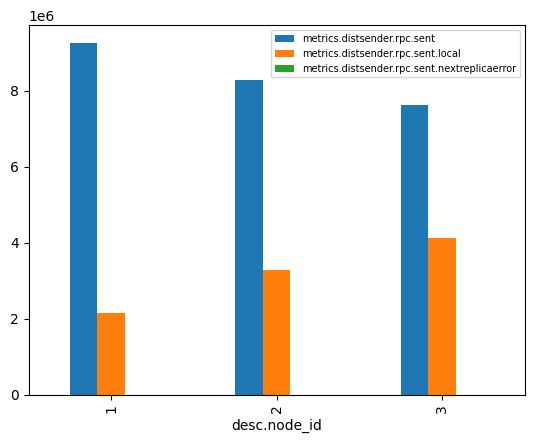

In [185]:
df.plot.bar(x='desc.node_id',y=['metrics.distsender.rpc.sent', 'metrics.distsender.rpc.sent.local', 'metrics.distsender.rpc.sent.nextreplicaerror'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

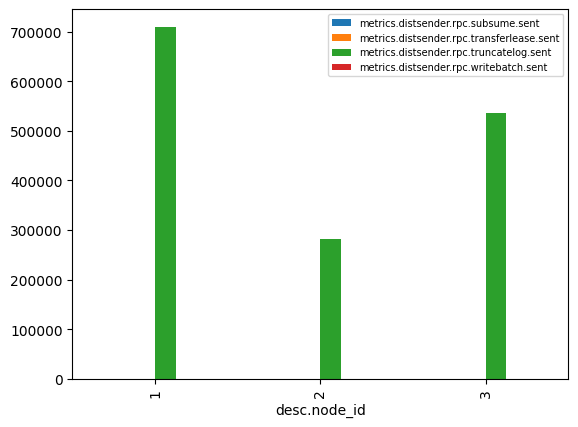

In [186]:
df.plot.bar(x='desc.node_id',y=['metrics.distsender.rpc.subsume.sent', 'metrics.distsender.rpc.transferlease.sent', 'metrics.distsender.rpc.truncatelog.sent', 'metrics.distsender.rpc.writebatch.sent'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

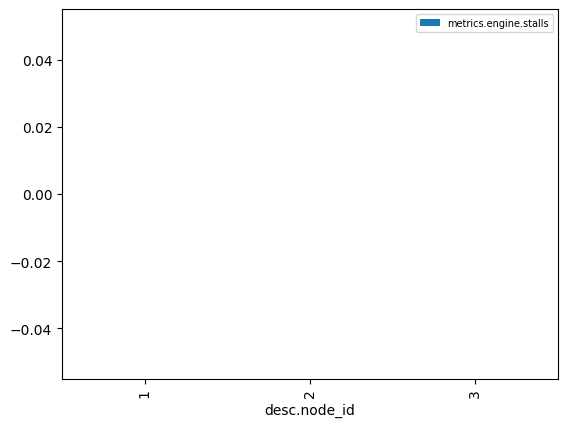

In [187]:
df.plot.bar(x='desc.node_id',y=['metrics.engine.stalls'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

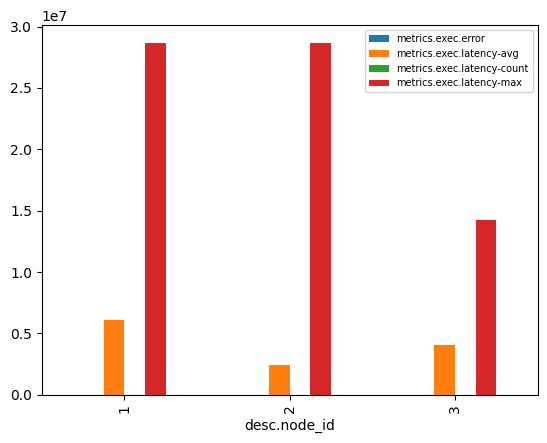

In [188]:
df.plot.bar(x='desc.node_id',y=['metrics.exec.error', 'metrics.exec.latency-avg', 'metrics.exec.latency-count', 'metrics.exec.latency-max'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

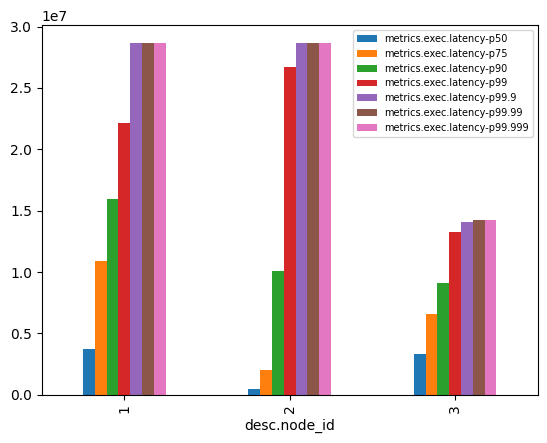

In [189]:
df.plot.bar(x='desc.node_id',y=['metrics.exec.latency-p50', 'metrics.exec.latency-p75', 'metrics.exec.latency-p90', 'metrics.exec.latency-p99', 'metrics.exec.latency-p99.9', 'metrics.exec.latency-p99.99', 'metrics.exec.latency-p99.999'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

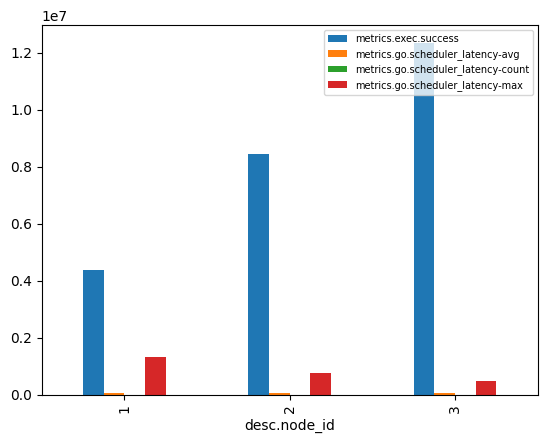

In [190]:
df.plot.bar(x='desc.node_id',y=['metrics.exec.success', 'metrics.go.scheduler_latency-avg', 'metrics.go.scheduler_latency-count', 'metrics.go.scheduler_latency-max'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

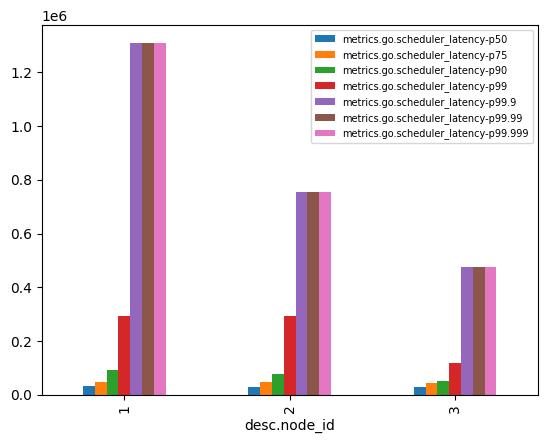

In [191]:
df.plot.bar(x='desc.node_id',y=['metrics.go.scheduler_latency-p50', 'metrics.go.scheduler_latency-p75', 'metrics.go.scheduler_latency-p90', 'metrics.go.scheduler_latency-p99', 'metrics.go.scheduler_latency-p99.9', 'metrics.go.scheduler_latency-p99.99', 'metrics.go.scheduler_latency-p99.999'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

In [192]:
df.plot.bar(x='desc.node_id',y=['metrics.gossip.bytes.received', 'metrics.gossip.bytes.sent'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

In [193]:
df.plot.bar(x='desc.node_id',y=['metrics.gossip.connections.incoming', 'metrics.gossip.connections.outgoing', 'metrics.gossip.connections.refused'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

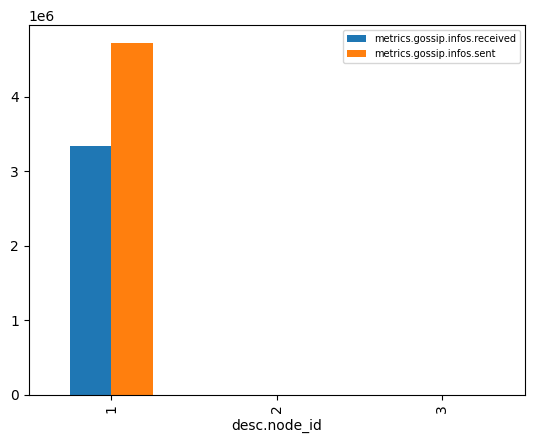

In [194]:
df.plot.bar(x='desc.node_id',y=['metrics.gossip.infos.received', 'metrics.gossip.infos.sent'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

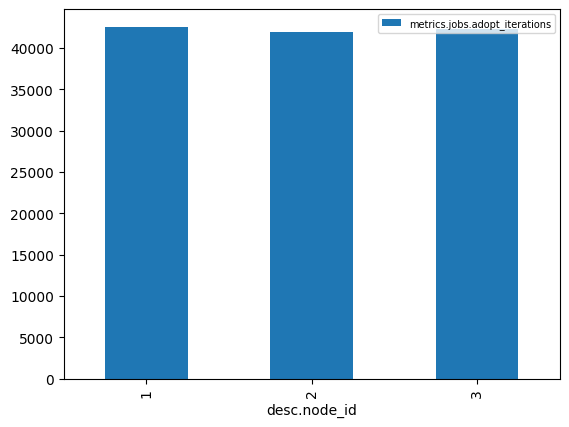

In [195]:
df.plot.bar(x='desc.node_id',y=['metrics.jobs.adopt_iterations'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

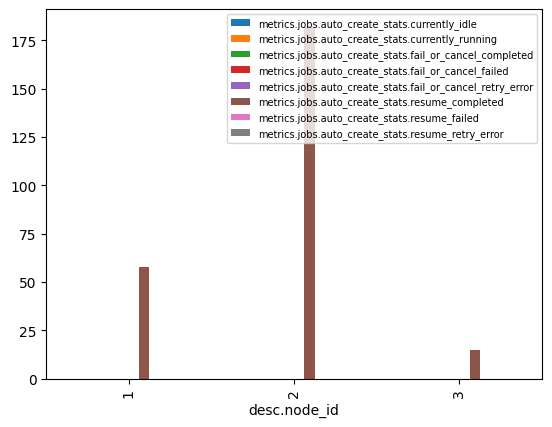

In [196]:
df.plot.bar(x='desc.node_id',y=['metrics.jobs.auto_create_stats.currently_idle', 'metrics.jobs.auto_create_stats.currently_running', 'metrics.jobs.auto_create_stats.fail_or_cancel_completed', 'metrics.jobs.auto_create_stats.fail_or_cancel_failed', 'metrics.jobs.auto_create_stats.fail_or_cancel_retry_error', 'metrics.jobs.auto_create_stats.resume_completed', 'metrics.jobs.auto_create_stats.resume_failed', 'metrics.jobs.auto_create_stats.resume_retry_error'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

In [197]:
df.plot.bar(x='desc.node_id',y=['metrics.jobs.auto_schema_telemetry.currently_idle', 'metrics.jobs.auto_schema_telemetry.currently_running', 'metrics.jobs.auto_schema_telemetry.fail_or_cancel_completed', 'metrics.jobs.auto_schema_telemetry.fail_or_cancel_failed', 'metrics.jobs.auto_schema_telemetry.fail_or_cancel_retry_error', 'metrics.jobs.auto_schema_telemetry.resume_completed', 'metrics.jobs.auto_schema_telemetry.resume_failed', 'metrics.jobs.auto_schema_telemetry.resume_retry_error'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

In [198]:
df.plot.bar(x='desc.node_id',y=['metrics.jobs.auto_span_config_reconciliation.currently_idle', 'metrics.jobs.auto_span_config_reconciliation.currently_running', 'metrics.jobs.auto_span_config_reconciliation.fail_or_cancel_completed', 'metrics.jobs.auto_span_config_reconciliation.fail_or_cancel_failed', 'metrics.jobs.auto_span_config_reconciliation.fail_or_cancel_retry_error', 'metrics.jobs.auto_span_config_reconciliation.resume_completed', 'metrics.jobs.auto_span_config_reconciliation.resume_failed', 'metrics.jobs.auto_span_config_reconciliation.resume_retry_error'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

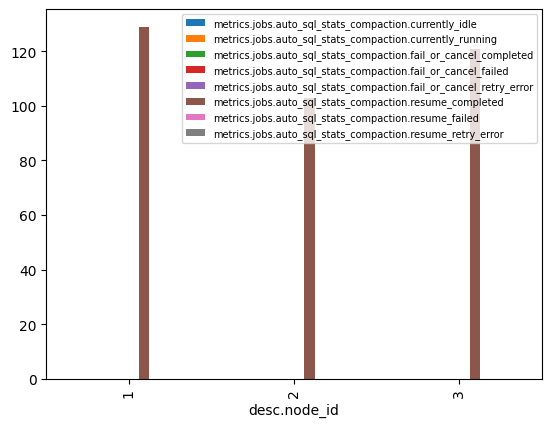

In [199]:
df.plot.bar(x='desc.node_id',y=['metrics.jobs.auto_sql_stats_compaction.currently_idle', 'metrics.jobs.auto_sql_stats_compaction.currently_running', 'metrics.jobs.auto_sql_stats_compaction.fail_or_cancel_completed', 'metrics.jobs.auto_sql_stats_compaction.fail_or_cancel_failed', 'metrics.jobs.auto_sql_stats_compaction.fail_or_cancel_retry_error', 'metrics.jobs.auto_sql_stats_compaction.resume_completed', 'metrics.jobs.auto_sql_stats_compaction.resume_failed', 'metrics.jobs.auto_sql_stats_compaction.resume_retry_error'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

In [200]:
df.plot.bar(x='desc.node_id',y=['metrics.jobs.backup.currently_idle', 'metrics.jobs.backup.currently_running', 'metrics.jobs.backup.fail_or_cancel_completed', 'metrics.jobs.backup.fail_or_cancel_failed', 'metrics.jobs.backup.fail_or_cancel_retry_error', 'metrics.jobs.backup.resume_completed', 'metrics.jobs.backup.resume_failed', 'metrics.jobs.backup.resume_retry_error'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

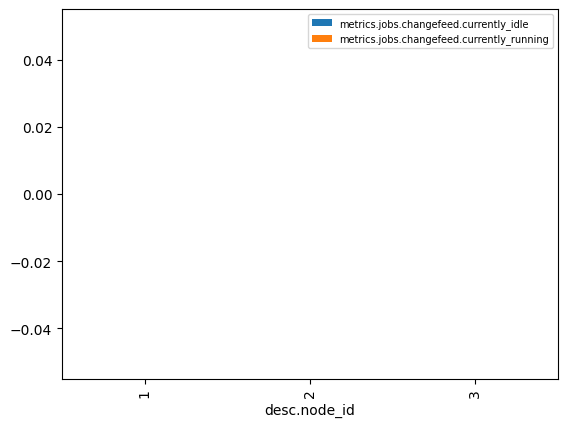

In [201]:
df.plot.bar(x='desc.node_id',y=['metrics.jobs.changefeed.currently_idle', 'metrics.jobs.changefeed.currently_running'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

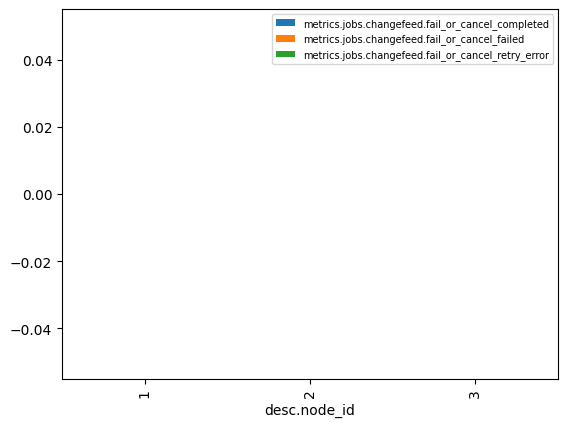

In [202]:
df.plot.bar(x='desc.node_id',y=['metrics.jobs.changefeed.fail_or_cancel_completed', 'metrics.jobs.changefeed.fail_or_cancel_failed', 'metrics.jobs.changefeed.fail_or_cancel_retry_error'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

In [203]:
df.plot.bar(x='desc.node_id',y=['metrics.jobs.changefeed.resume_completed', 'metrics.jobs.changefeed.resume_failed', 'metrics.jobs.changefeed.resume_retry_error'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

In [204]:
df.plot.bar(x='desc.node_id',y=['metrics.jobs.claimed_jobs'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

In [205]:
df.plot.bar(x='desc.node_id',y=['metrics.jobs.create_stats.currently_idle', 'metrics.jobs.create_stats.currently_running', 'metrics.jobs.create_stats.fail_or_cancel_completed', 'metrics.jobs.create_stats.fail_or_cancel_failed', 'metrics.jobs.create_stats.fail_or_cancel_retry_error', 'metrics.jobs.create_stats.resume_completed', 'metrics.jobs.create_stats.resume_failed', 'metrics.jobs.create_stats.resume_retry_error'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

In [206]:
df.plot.bar(x='desc.node_id',y=['metrics.jobs.import.currently_idle', 'metrics.jobs.import.currently_running', 'metrics.jobs.import.fail_or_cancel_completed', 'metrics.jobs.import.fail_or_cancel_failed', 'metrics.jobs.import.fail_or_cancel_retry_error', 'metrics.jobs.import.resume_completed', 'metrics.jobs.import.resume_failed', 'metrics.jobs.import.resume_retry_error'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

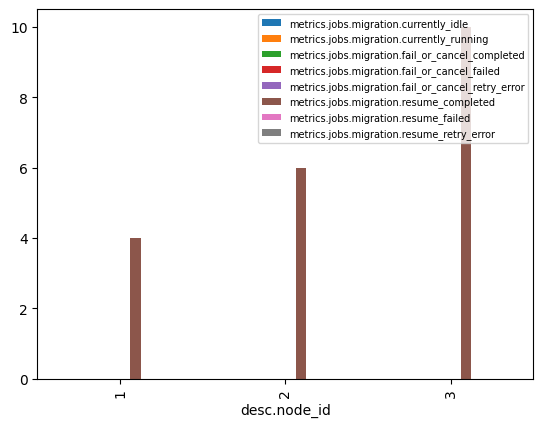

In [207]:
df.plot.bar(x='desc.node_id',y=['metrics.jobs.migration.currently_idle', 'metrics.jobs.migration.currently_running', 'metrics.jobs.migration.fail_or_cancel_completed', 'metrics.jobs.migration.fail_or_cancel_failed', 'metrics.jobs.migration.fail_or_cancel_retry_error', 'metrics.jobs.migration.resume_completed', 'metrics.jobs.migration.resume_failed', 'metrics.jobs.migration.resume_retry_error'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

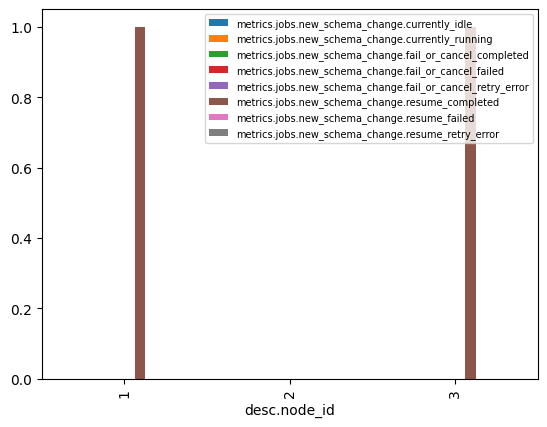

In [208]:
df.plot.bar(x='desc.node_id',y=['metrics.jobs.new_schema_change.currently_idle', 'metrics.jobs.new_schema_change.currently_running', 'metrics.jobs.new_schema_change.fail_or_cancel_completed', 'metrics.jobs.new_schema_change.fail_or_cancel_failed', 'metrics.jobs.new_schema_change.fail_or_cancel_retry_error', 'metrics.jobs.new_schema_change.resume_completed', 'metrics.jobs.new_schema_change.resume_failed', 'metrics.jobs.new_schema_change.resume_retry_error'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

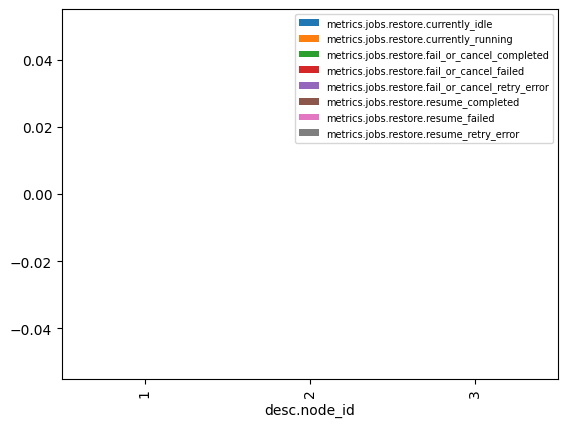

In [209]:
df.plot.bar(x='desc.node_id',y=['metrics.jobs.restore.currently_idle', 'metrics.jobs.restore.currently_running', 'metrics.jobs.restore.fail_or_cancel_completed', 'metrics.jobs.restore.fail_or_cancel_failed', 'metrics.jobs.restore.fail_or_cancel_retry_error', 'metrics.jobs.restore.resume_completed', 'metrics.jobs.restore.resume_failed', 'metrics.jobs.restore.resume_retry_error'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

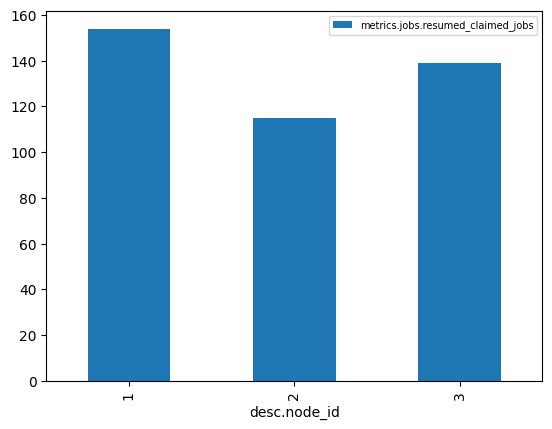

In [210]:
df.plot.bar(x='desc.node_id',y=['metrics.jobs.resumed_claimed_jobs'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

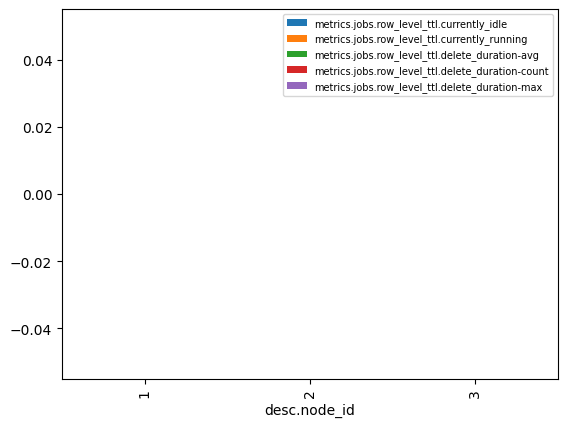

In [211]:
df.plot.bar(x='desc.node_id',y=['metrics.jobs.row_level_ttl.currently_idle', 'metrics.jobs.row_level_ttl.currently_running', 'metrics.jobs.row_level_ttl.delete_duration-avg', 'metrics.jobs.row_level_ttl.delete_duration-count', 'metrics.jobs.row_level_ttl.delete_duration-max'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

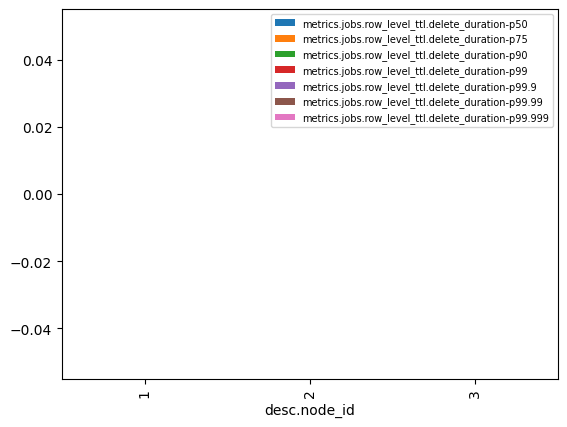

In [212]:
df.plot.bar(x='desc.node_id',y=['metrics.jobs.row_level_ttl.delete_duration-p50', 'metrics.jobs.row_level_ttl.delete_duration-p75', 'metrics.jobs.row_level_ttl.delete_duration-p90', 'metrics.jobs.row_level_ttl.delete_duration-p99', 'metrics.jobs.row_level_ttl.delete_duration-p99.9', 'metrics.jobs.row_level_ttl.delete_duration-p99.99', 'metrics.jobs.row_level_ttl.delete_duration-p99.999'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

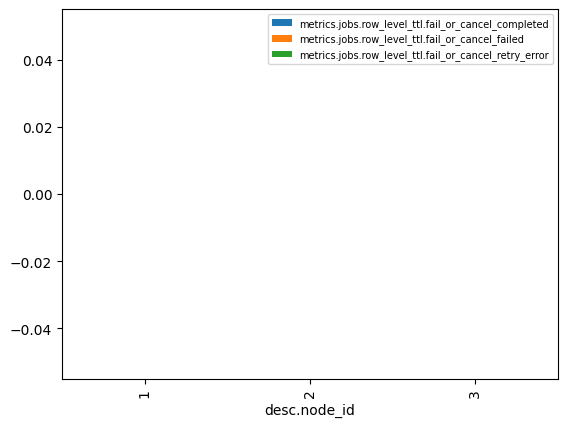

In [213]:
df.plot.bar(x='desc.node_id',y=['metrics.jobs.row_level_ttl.fail_or_cancel_completed', 'metrics.jobs.row_level_ttl.fail_or_cancel_failed', 'metrics.jobs.row_level_ttl.fail_or_cancel_retry_error'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

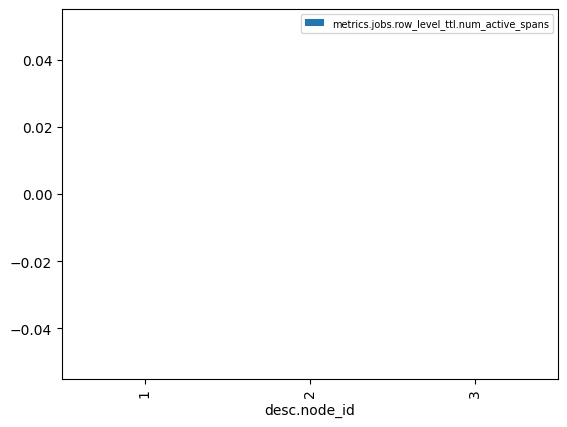

In [214]:
df.plot.bar(x='desc.node_id',y=['metrics.jobs.row_level_ttl.num_active_spans'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

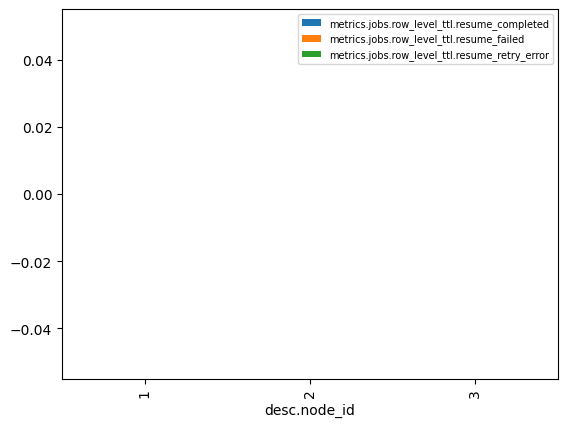

In [215]:
df.plot.bar(x='desc.node_id',y=['metrics.jobs.row_level_ttl.resume_completed', 'metrics.jobs.row_level_ttl.resume_failed', 'metrics.jobs.row_level_ttl.resume_retry_error'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

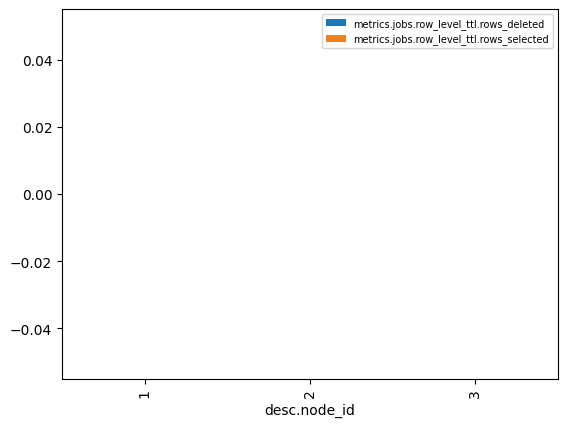

In [216]:
df.plot.bar(x='desc.node_id',y=['metrics.jobs.row_level_ttl.rows_deleted', 'metrics.jobs.row_level_ttl.rows_selected'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

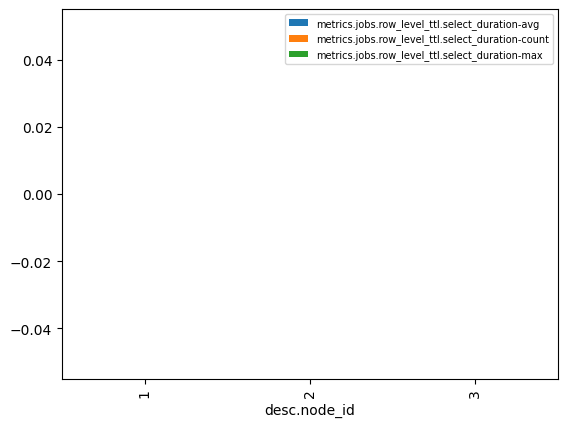

In [217]:
df.plot.bar(x='desc.node_id',y=['metrics.jobs.row_level_ttl.select_duration-avg', 'metrics.jobs.row_level_ttl.select_duration-count', 'metrics.jobs.row_level_ttl.select_duration-max'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

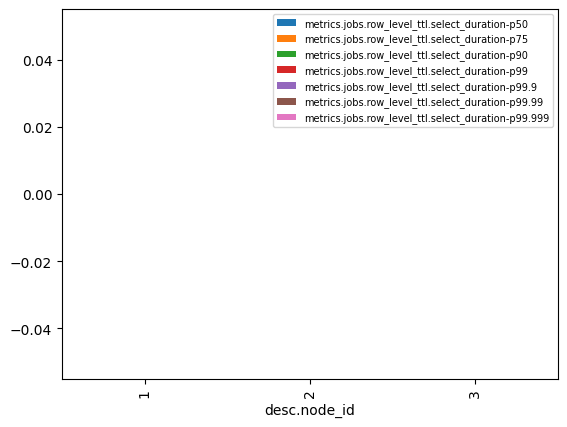

In [218]:
df.plot.bar(x='desc.node_id',y=['metrics.jobs.row_level_ttl.select_duration-p50', 'metrics.jobs.row_level_ttl.select_duration-p75', 'metrics.jobs.row_level_ttl.select_duration-p90', 'metrics.jobs.row_level_ttl.select_duration-p99', 'metrics.jobs.row_level_ttl.select_duration-p99.9', 'metrics.jobs.row_level_ttl.select_duration-p99.99', 'metrics.jobs.row_level_ttl.select_duration-p99.999'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

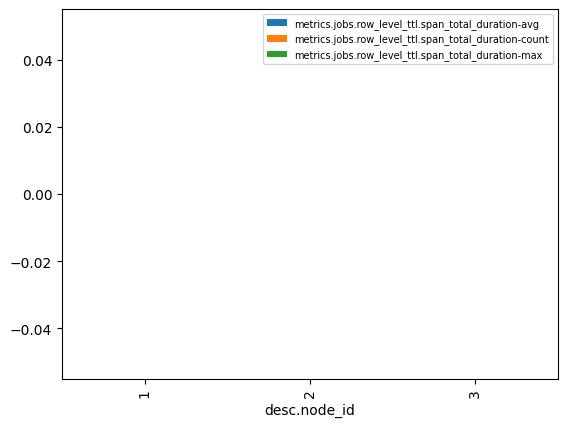

In [219]:
df.plot.bar(x='desc.node_id',y=['metrics.jobs.row_level_ttl.span_total_duration-avg', 'metrics.jobs.row_level_ttl.span_total_duration-count', 'metrics.jobs.row_level_ttl.span_total_duration-max'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

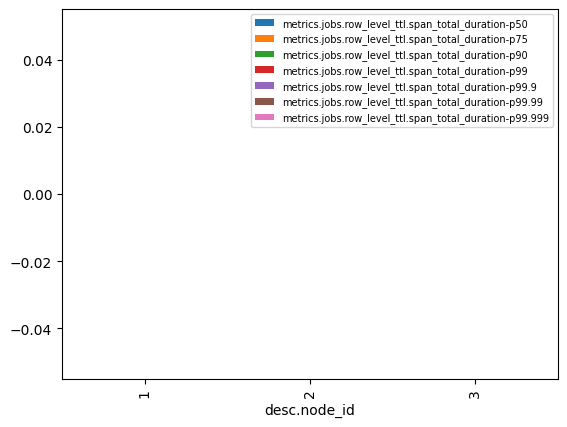

In [220]:
df.plot.bar(x='desc.node_id',y=['metrics.jobs.row_level_ttl.span_total_duration-p50', 'metrics.jobs.row_level_ttl.span_total_duration-p75', 'metrics.jobs.row_level_ttl.span_total_duration-p90', 'metrics.jobs.row_level_ttl.span_total_duration-p99', 'metrics.jobs.row_level_ttl.span_total_duration-p99.9', 'metrics.jobs.row_level_ttl.span_total_duration-p99.99', 'metrics.jobs.row_level_ttl.span_total_duration-p99.999'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

In [221]:
df.plot.bar(x='desc.node_id',y=['metrics.jobs.row_level_ttl.total_expired_rows', 'metrics.jobs.row_level_ttl.total_rows'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

In [222]:
df.plot.bar(x='desc.node_id',y=['metrics.jobs.running_non_idle'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

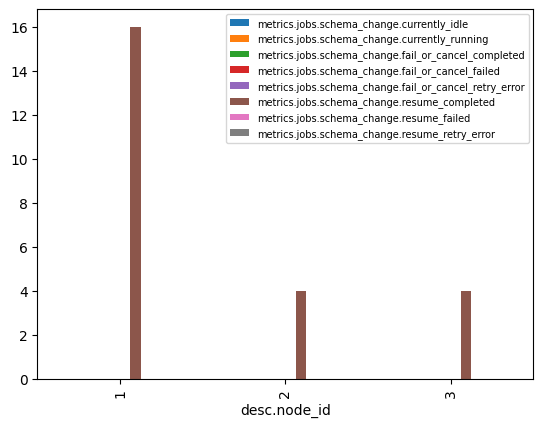

In [223]:
df.plot.bar(x='desc.node_id',y=['metrics.jobs.schema_change.currently_idle', 'metrics.jobs.schema_change.currently_running', 'metrics.jobs.schema_change.fail_or_cancel_completed', 'metrics.jobs.schema_change.fail_or_cancel_failed', 'metrics.jobs.schema_change.fail_or_cancel_retry_error', 'metrics.jobs.schema_change.resume_completed', 'metrics.jobs.schema_change.resume_failed', 'metrics.jobs.schema_change.resume_retry_error'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

In [224]:
df.plot.bar(x='desc.node_id',y=['metrics.jobs.schema_change_gc.currently_idle', 'metrics.jobs.schema_change_gc.currently_running', 'metrics.jobs.schema_change_gc.fail_or_cancel_completed', 'metrics.jobs.schema_change_gc.fail_or_cancel_failed', 'metrics.jobs.schema_change_gc.fail_or_cancel_retry_error', 'metrics.jobs.schema_change_gc.resume_completed', 'metrics.jobs.schema_change_gc.resume_failed', 'metrics.jobs.schema_change_gc.resume_retry_error'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

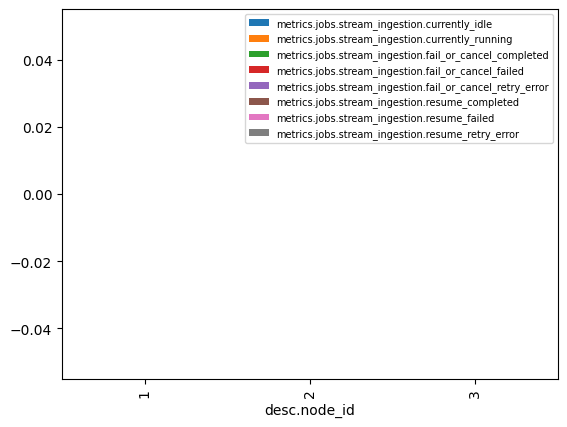

In [225]:
df.plot.bar(x='desc.node_id',y=['metrics.jobs.stream_ingestion.currently_idle', 'metrics.jobs.stream_ingestion.currently_running', 'metrics.jobs.stream_ingestion.fail_or_cancel_completed', 'metrics.jobs.stream_ingestion.fail_or_cancel_failed', 'metrics.jobs.stream_ingestion.fail_or_cancel_retry_error', 'metrics.jobs.stream_ingestion.resume_completed', 'metrics.jobs.stream_ingestion.resume_failed', 'metrics.jobs.stream_ingestion.resume_retry_error'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

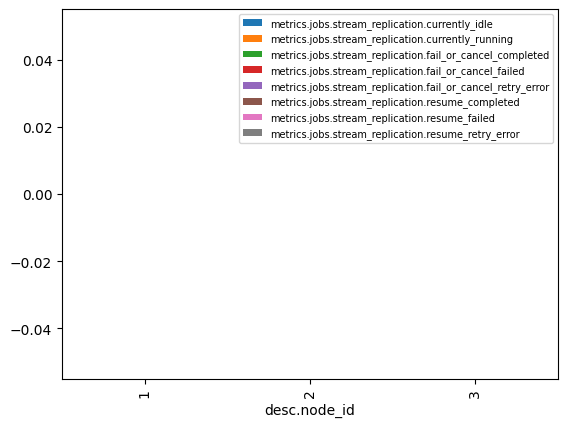

In [226]:
df.plot.bar(x='desc.node_id',y=['metrics.jobs.stream_replication.currently_idle', 'metrics.jobs.stream_replication.currently_running', 'metrics.jobs.stream_replication.fail_or_cancel_completed', 'metrics.jobs.stream_replication.fail_or_cancel_failed', 'metrics.jobs.stream_replication.fail_or_cancel_retry_error', 'metrics.jobs.stream_replication.resume_completed', 'metrics.jobs.stream_replication.resume_failed', 'metrics.jobs.stream_replication.resume_retry_error'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

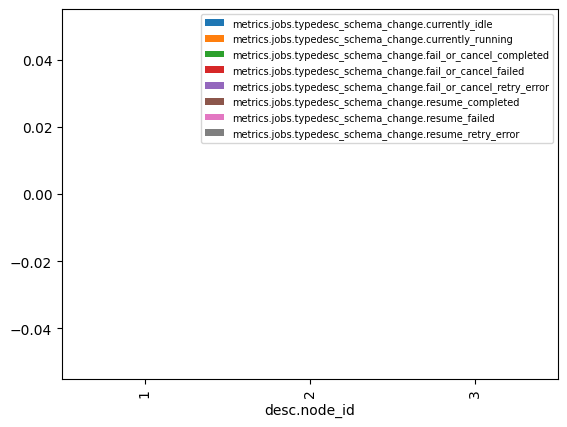

In [227]:
df.plot.bar(x='desc.node_id',y=['metrics.jobs.typedesc_schema_change.currently_idle', 'metrics.jobs.typedesc_schema_change.currently_running', 'metrics.jobs.typedesc_schema_change.fail_or_cancel_completed', 'metrics.jobs.typedesc_schema_change.fail_or_cancel_failed', 'metrics.jobs.typedesc_schema_change.fail_or_cancel_retry_error', 'metrics.jobs.typedesc_schema_change.resume_completed', 'metrics.jobs.typedesc_schema_change.resume_failed', 'metrics.jobs.typedesc_schema_change.resume_retry_error'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

In [228]:
df.plot.bar(x='desc.node_id',y=['metrics.kv.prober.planning_attempts', 'metrics.kv.prober.planning_failures'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

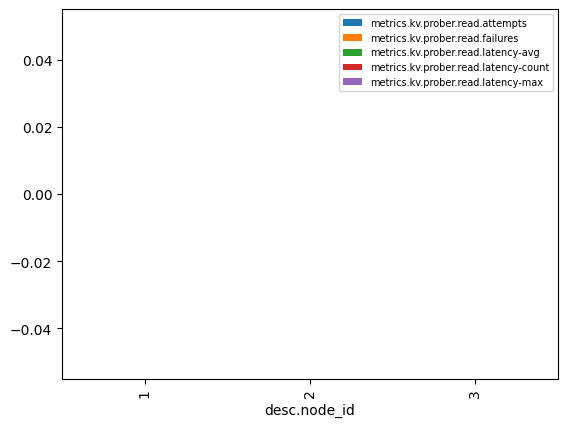

In [229]:
df.plot.bar(x='desc.node_id',y=['metrics.kv.prober.read.attempts', 'metrics.kv.prober.read.failures', 'metrics.kv.prober.read.latency-avg', 'metrics.kv.prober.read.latency-count', 'metrics.kv.prober.read.latency-max'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

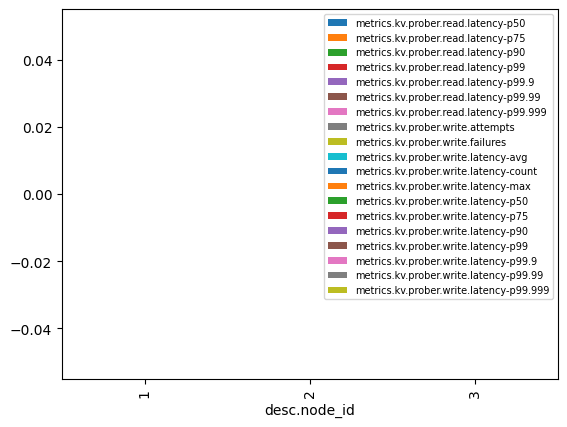

In [230]:
df.plot.bar(x='desc.node_id',y=['metrics.kv.prober.read.latency-p50', 'metrics.kv.prober.read.latency-p75', 'metrics.kv.prober.read.latency-p90', 'metrics.kv.prober.read.latency-p99', 'metrics.kv.prober.read.latency-p99.9', 'metrics.kv.prober.read.latency-p99.99', 'metrics.kv.prober.read.latency-p99.999', 'metrics.kv.prober.write.attempts', 'metrics.kv.prober.write.failures', 'metrics.kv.prober.write.latency-avg', 'metrics.kv.prober.write.latency-count', 'metrics.kv.prober.write.latency-max', 'metrics.kv.prober.write.latency-p50', 'metrics.kv.prober.write.latency-p75', 'metrics.kv.prober.write.latency-p90', 'metrics.kv.prober.write.latency-p99', 'metrics.kv.prober.write.latency-p99.9', 'metrics.kv.prober.write.latency-p99.99', 'metrics.kv.prober.write.latency-p99.999'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

In [231]:
df.plot.bar(x='desc.node_id',y=['metrics.kv.prober.write.quarantine.oldest_duration'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

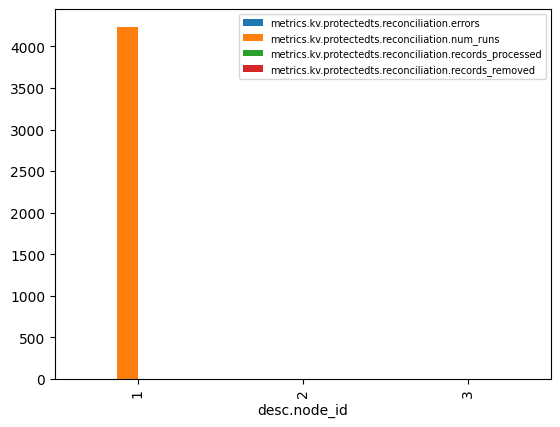

In [232]:
df.plot.bar(x='desc.node_id',y=['metrics.kv.protectedts.reconciliation.errors', 'metrics.kv.protectedts.reconciliation.num_runs', 'metrics.kv.protectedts.reconciliation.records_processed', 'metrics.kv.protectedts.reconciliation.records_removed'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

In [233]:
df.plot.bar(x='desc.node_id',y=['metrics.kv.rangefeed.mem_shared', 'metrics.kv.rangefeed.mem_system'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

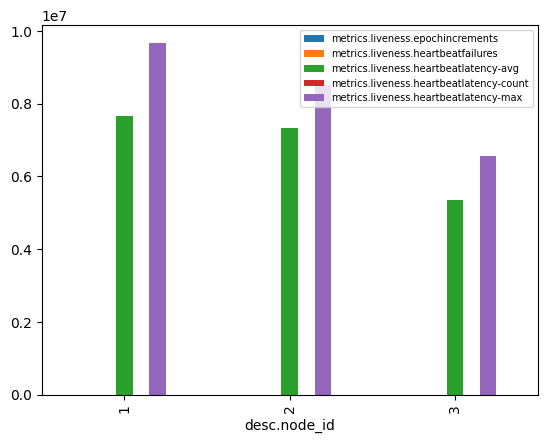

In [234]:
df.plot.bar(x='desc.node_id',y=['metrics.liveness.epochincrements', 'metrics.liveness.heartbeatfailures', 'metrics.liveness.heartbeatlatency-avg', 'metrics.liveness.heartbeatlatency-count', 'metrics.liveness.heartbeatlatency-max'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

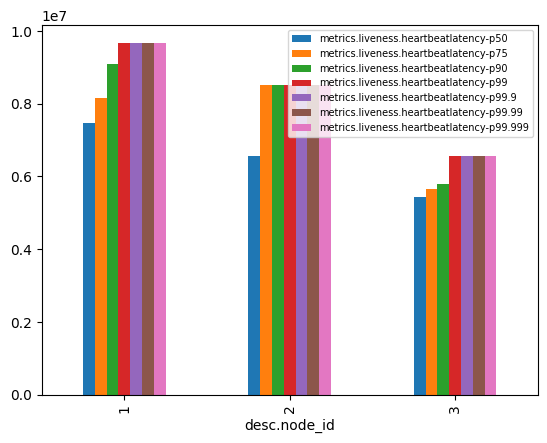

In [235]:
df.plot.bar(x='desc.node_id',y=['metrics.liveness.heartbeatlatency-p50', 'metrics.liveness.heartbeatlatency-p75', 'metrics.liveness.heartbeatlatency-p90', 'metrics.liveness.heartbeatlatency-p99', 'metrics.liveness.heartbeatlatency-p99.9', 'metrics.liveness.heartbeatlatency-p99.99', 'metrics.liveness.heartbeatlatency-p99.999'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

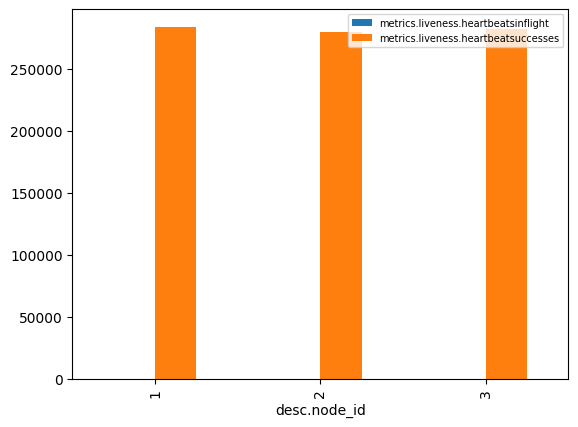

In [236]:
df.plot.bar(x='desc.node_id',y=['metrics.liveness.heartbeatsinflight', 'metrics.liveness.heartbeatsuccesses'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

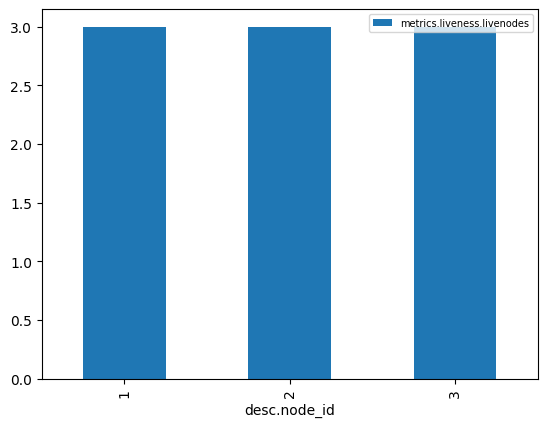

In [237]:
df.plot.bar(x='desc.node_id',y=['metrics.liveness.livenodes'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

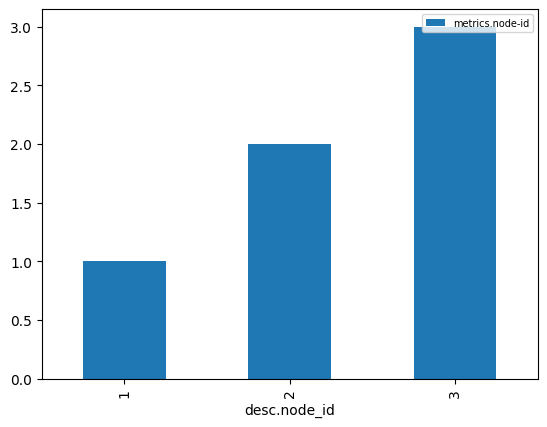

In [238]:
df.plot.bar(x='desc.node_id',y=['metrics.node-id'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

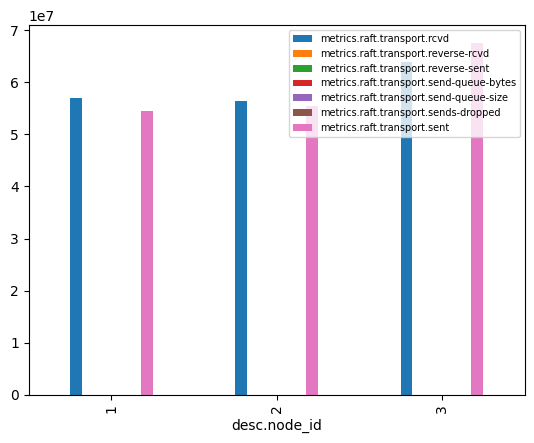

In [239]:
df.plot.bar(x='desc.node_id',y=['metrics.raft.transport.rcvd', 'metrics.raft.transport.reverse-rcvd', 'metrics.raft.transport.reverse-sent', 'metrics.raft.transport.send-queue-bytes', 'metrics.raft.transport.send-queue-size', 'metrics.raft.transport.sends-dropped', 'metrics.raft.transport.sent'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

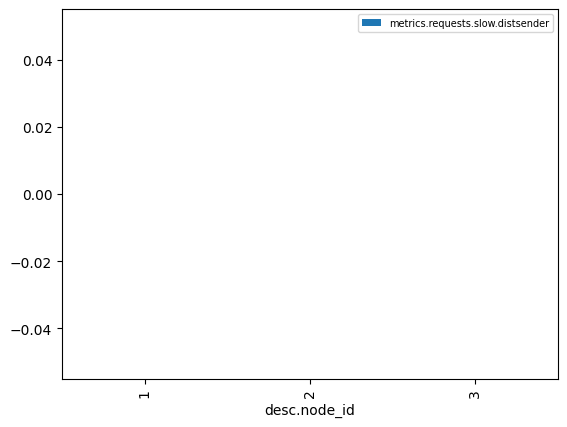

In [240]:
df.plot.bar(x='desc.node_id',y=['metrics.requests.slow.distsender'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

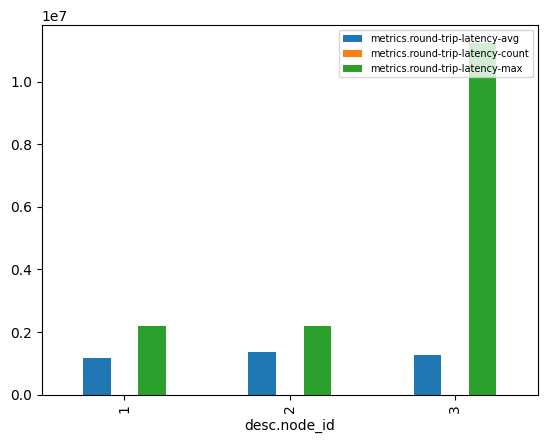

In [241]:
df.plot.bar(x='desc.node_id',y=['metrics.round-trip-latency-avg', 'metrics.round-trip-latency-count', 'metrics.round-trip-latency-max'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

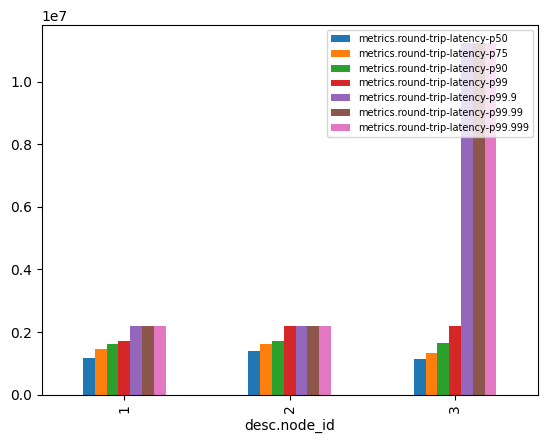

In [242]:
df.plot.bar(x='desc.node_id',y=['metrics.round-trip-latency-p50', 'metrics.round-trip-latency-p75', 'metrics.round-trip-latency-p90', 'metrics.round-trip-latency-p99', 'metrics.round-trip-latency-p99.9', 'metrics.round-trip-latency-p99.99', 'metrics.round-trip-latency-p99.999'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

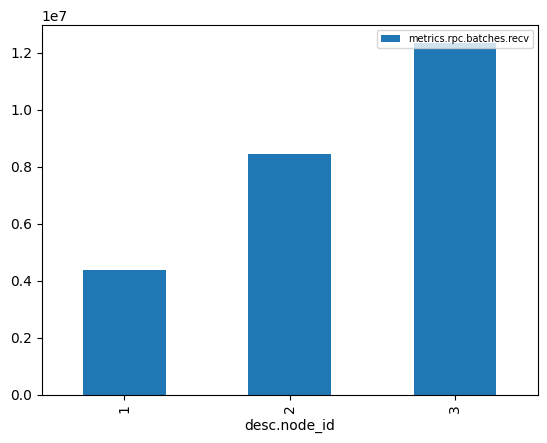

In [243]:
df.plot.bar(x='desc.node_id',y=['metrics.rpc.batches.recv'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

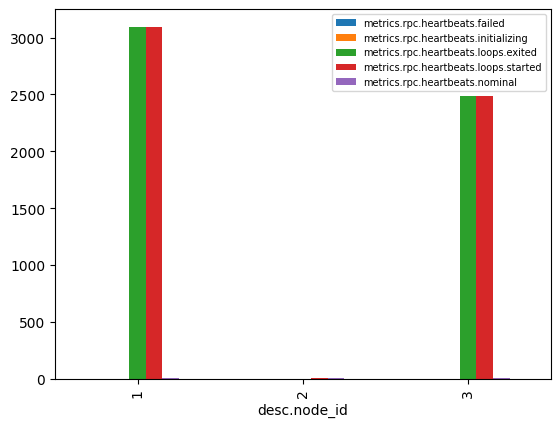

In [244]:
df.plot.bar(x='desc.node_id',y=['metrics.rpc.heartbeats.failed', 'metrics.rpc.heartbeats.initializing', 'metrics.rpc.heartbeats.loops.exited', 'metrics.rpc.heartbeats.loops.started', 'metrics.rpc.heartbeats.nominal'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

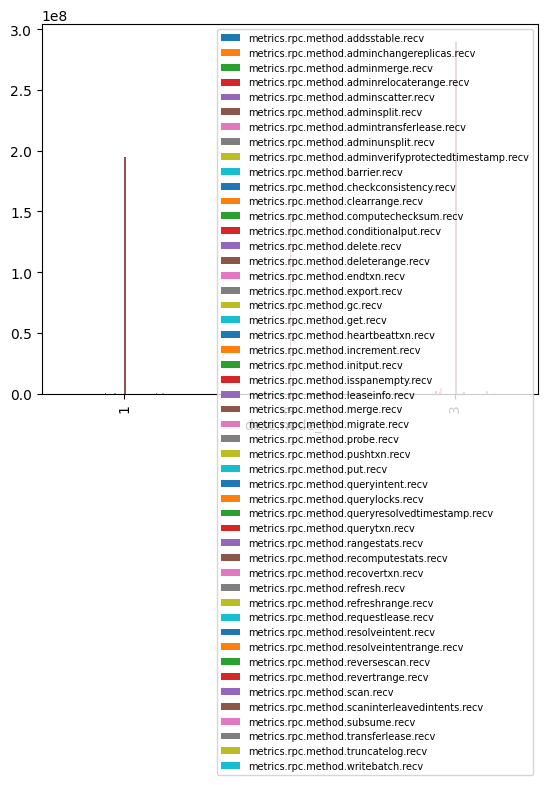

In [245]:
df.plot.bar(x='desc.node_id',y=['metrics.rpc.method.addsstable.recv', 'metrics.rpc.method.adminchangereplicas.recv', 'metrics.rpc.method.adminmerge.recv', 'metrics.rpc.method.adminrelocaterange.recv', 'metrics.rpc.method.adminscatter.recv', 'metrics.rpc.method.adminsplit.recv', 'metrics.rpc.method.admintransferlease.recv', 'metrics.rpc.method.adminunsplit.recv', 'metrics.rpc.method.adminverifyprotectedtimestamp.recv', 'metrics.rpc.method.barrier.recv', 'metrics.rpc.method.checkconsistency.recv', 'metrics.rpc.method.clearrange.recv', 'metrics.rpc.method.computechecksum.recv', 'metrics.rpc.method.conditionalput.recv', 'metrics.rpc.method.delete.recv', 'metrics.rpc.method.deleterange.recv', 'metrics.rpc.method.endtxn.recv', 'metrics.rpc.method.export.recv', 'metrics.rpc.method.gc.recv', 'metrics.rpc.method.get.recv', 'metrics.rpc.method.heartbeattxn.recv', 'metrics.rpc.method.increment.recv', 'metrics.rpc.method.initput.recv', 'metrics.rpc.method.isspanempty.recv', 'metrics.rpc.method.leaseinfo.recv', 'metrics.rpc.method.merge.recv', 'metrics.rpc.method.migrate.recv', 'metrics.rpc.method.probe.recv', 'metrics.rpc.method.pushtxn.recv', 'metrics.rpc.method.put.recv', 'metrics.rpc.method.queryintent.recv', 'metrics.rpc.method.querylocks.recv', 'metrics.rpc.method.queryresolvedtimestamp.recv', 'metrics.rpc.method.querytxn.recv', 'metrics.rpc.method.rangestats.recv', 'metrics.rpc.method.recomputestats.recv', 'metrics.rpc.method.recovertxn.recv', 'metrics.rpc.method.refresh.recv', 'metrics.rpc.method.refreshrange.recv', 'metrics.rpc.method.requestlease.recv', 'metrics.rpc.method.resolveintent.recv', 'metrics.rpc.method.resolveintentrange.recv', 'metrics.rpc.method.reversescan.recv', 'metrics.rpc.method.revertrange.recv', 'metrics.rpc.method.scan.recv', 'metrics.rpc.method.scaninterleavedintents.recv', 'metrics.rpc.method.subsume.recv', 'metrics.rpc.method.transferlease.recv', 'metrics.rpc.method.truncatelog.recv', 'metrics.rpc.method.writebatch.recv'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

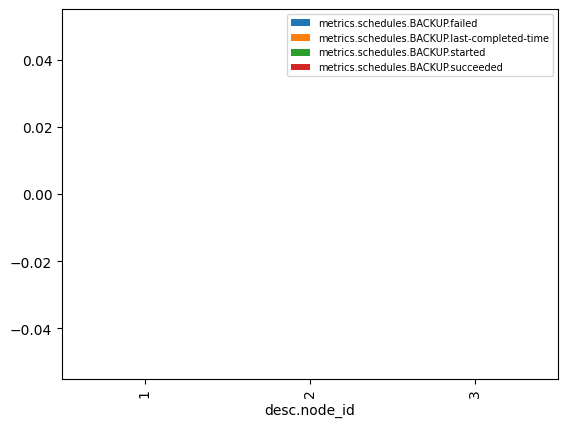

In [246]:
df.plot.bar(x='desc.node_id',y=['metrics.schedules.BACKUP.failed', 'metrics.schedules.BACKUP.last-completed-time', 'metrics.schedules.BACKUP.started', 'metrics.schedules.BACKUP.succeeded'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

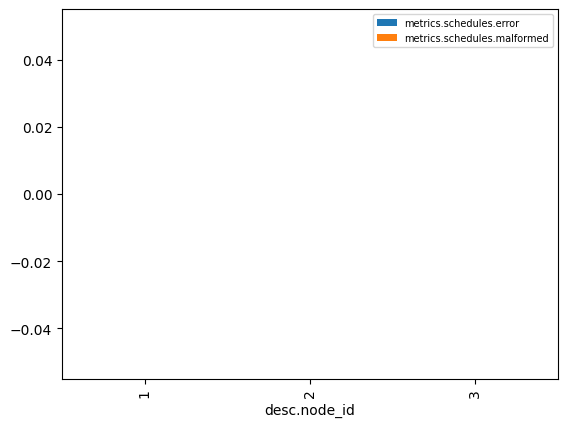

In [247]:
df.plot.bar(x='desc.node_id',y=['metrics.schedules.error', 'metrics.schedules.malformed'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

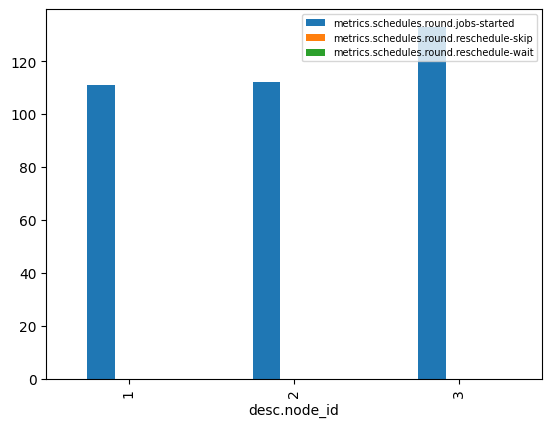

In [248]:
df.plot.bar(x='desc.node_id',y=['metrics.schedules.round.jobs-started', 'metrics.schedules.round.reschedule-skip', 'metrics.schedules.round.reschedule-wait'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

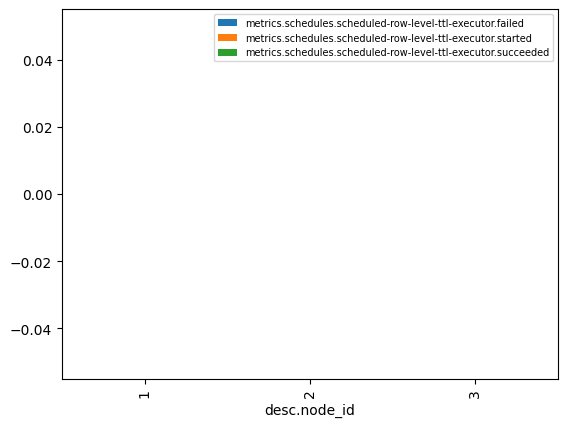

In [249]:
df.plot.bar(x='desc.node_id',y=['metrics.schedules.scheduled-row-level-ttl-executor.failed', 'metrics.schedules.scheduled-row-level-ttl-executor.started', 'metrics.schedules.scheduled-row-level-ttl-executor.succeeded'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

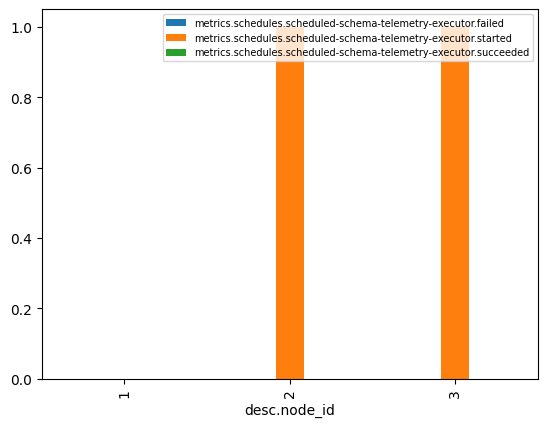

In [250]:
df.plot.bar(x='desc.node_id',y=['metrics.schedules.scheduled-schema-telemetry-executor.failed', 'metrics.schedules.scheduled-schema-telemetry-executor.started', 'metrics.schedules.scheduled-schema-telemetry-executor.succeeded'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

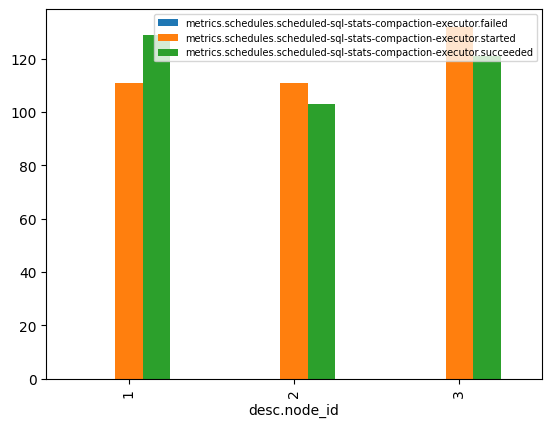

In [251]:
df.plot.bar(x='desc.node_id',y=['metrics.schedules.scheduled-sql-stats-compaction-executor.failed', 'metrics.schedules.scheduled-sql-stats-compaction-executor.started', 'metrics.schedules.scheduled-sql-stats-compaction-executor.succeeded'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

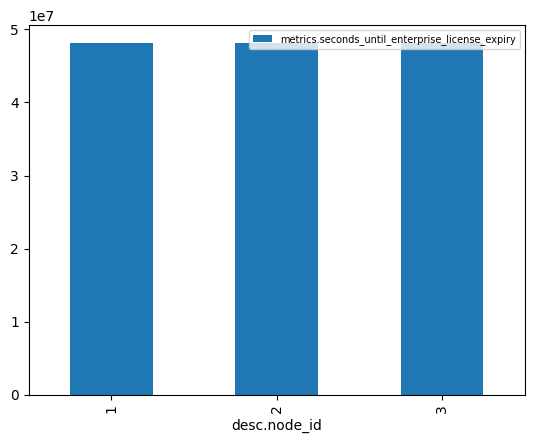

In [252]:
df.plot.bar(x='desc.node_id',y=['metrics.seconds_until_enterprise_license_expiry'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

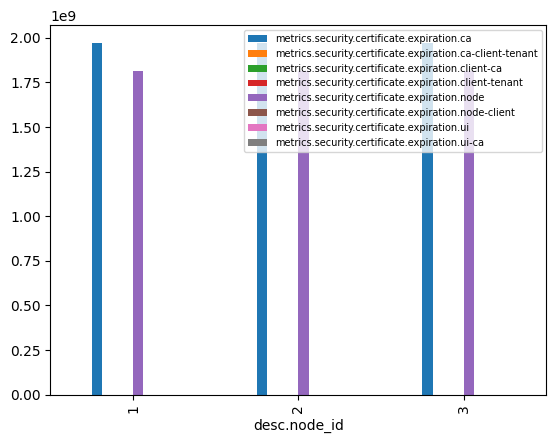

In [253]:
df.plot.bar(x='desc.node_id',y=['metrics.security.certificate.expiration.ca', 'metrics.security.certificate.expiration.ca-client-tenant', 'metrics.security.certificate.expiration.client-ca', 'metrics.security.certificate.expiration.client-tenant', 'metrics.security.certificate.expiration.node', 'metrics.security.certificate.expiration.node-client', 'metrics.security.certificate.expiration.ui', 'metrics.security.certificate.expiration.ui-ca'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

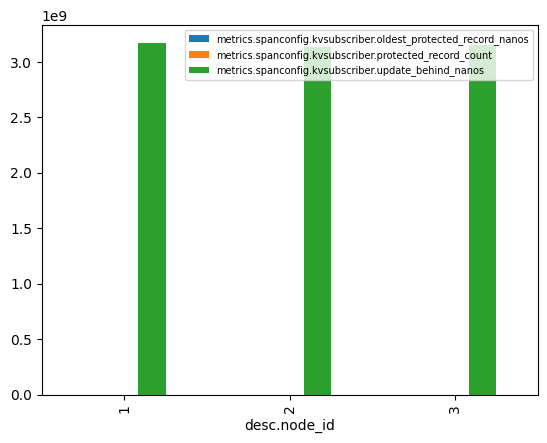

In [254]:
df.plot.bar(x='desc.node_id',y=['metrics.spanconfig.kvsubscriber.oldest_protected_record_nanos', 'metrics.spanconfig.kvsubscriber.protected_record_count', 'metrics.spanconfig.kvsubscriber.update_behind_nanos'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

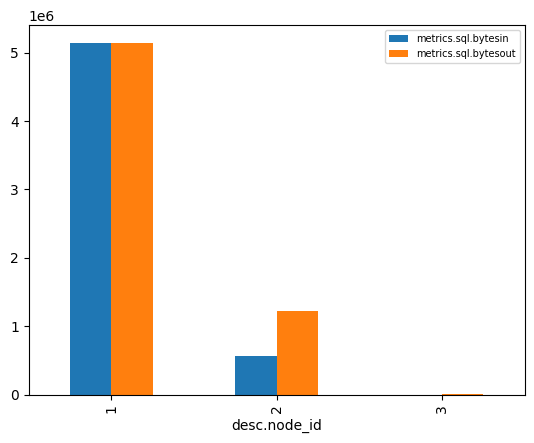

In [255]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.bytesin', 'metrics.sql.bytesout'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

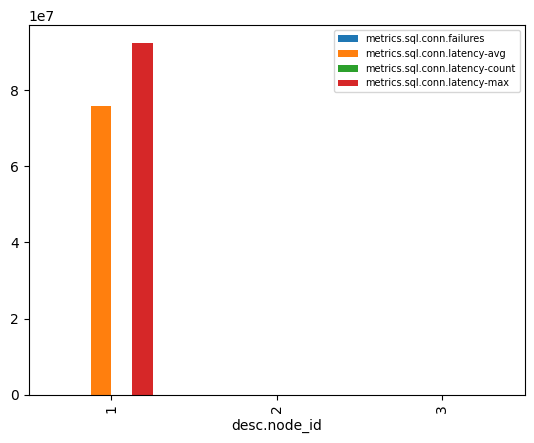

In [256]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.conn.failures', 'metrics.sql.conn.latency-avg', 'metrics.sql.conn.latency-count', 'metrics.sql.conn.latency-max'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

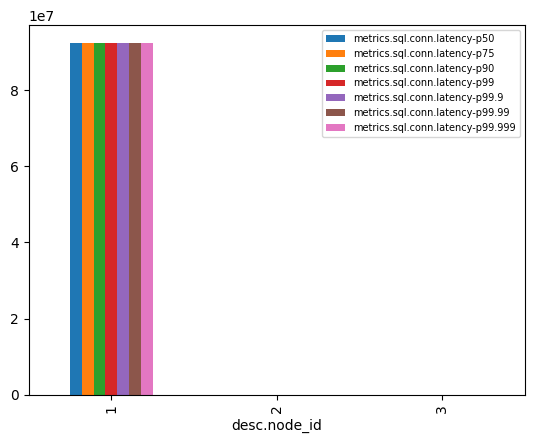

In [257]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.conn.latency-p50', 'metrics.sql.conn.latency-p75', 'metrics.sql.conn.latency-p90', 'metrics.sql.conn.latency-p99', 'metrics.sql.conn.latency-p99.9', 'metrics.sql.conn.latency-p99.99', 'metrics.sql.conn.latency-p99.999'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

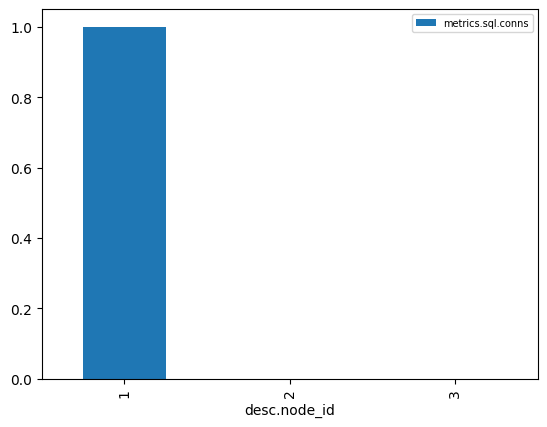

In [258]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.conns'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

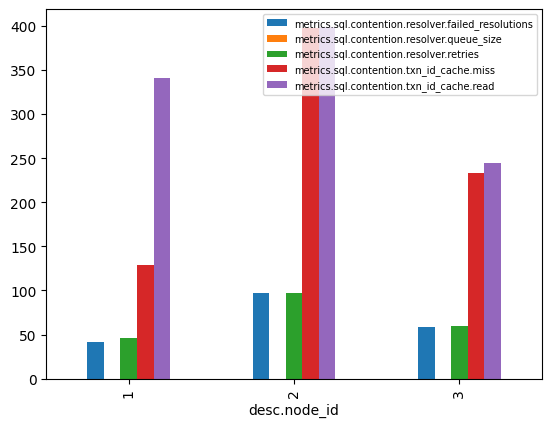

In [259]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.contention.resolver.failed_resolutions', 'metrics.sql.contention.resolver.queue_size', 'metrics.sql.contention.resolver.retries', 'metrics.sql.contention.txn_id_cache.miss', 'metrics.sql.contention.txn_id_cache.read'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

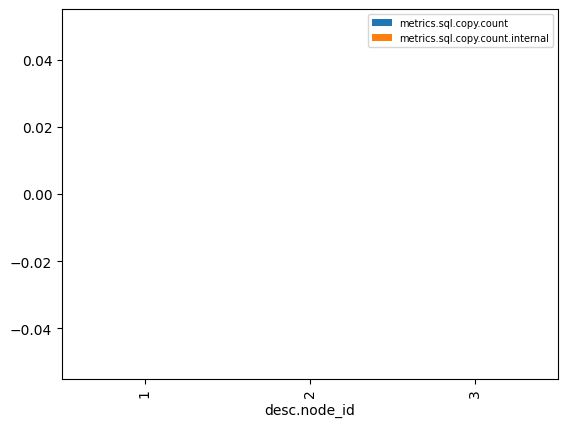

In [260]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.copy.count', 'metrics.sql.copy.count.internal'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

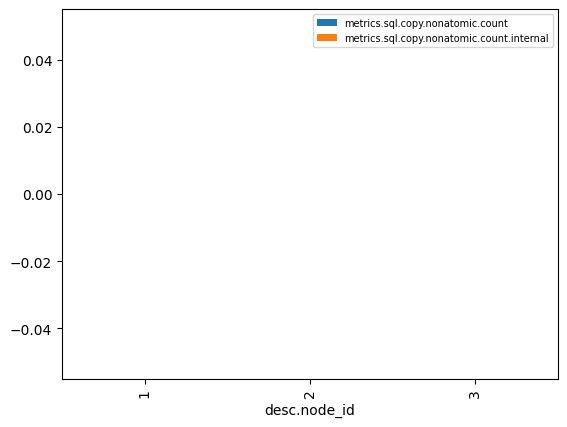

In [261]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.copy.nonatomic.count', 'metrics.sql.copy.nonatomic.count.internal'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

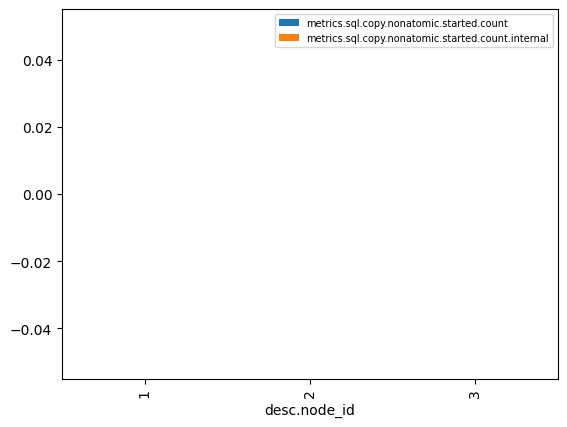

In [262]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.copy.nonatomic.started.count', 'metrics.sql.copy.nonatomic.started.count.internal'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

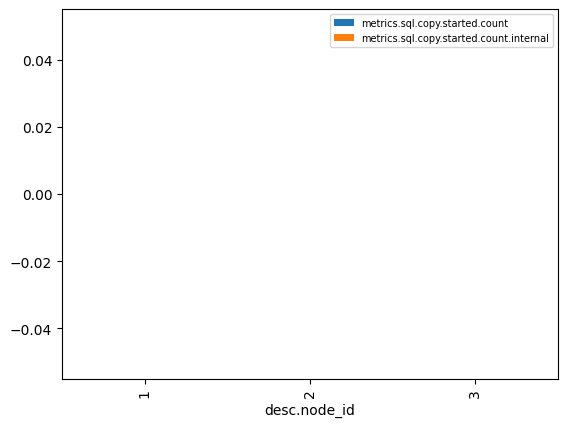

In [263]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.copy.started.count', 'metrics.sql.copy.started.count.internal'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

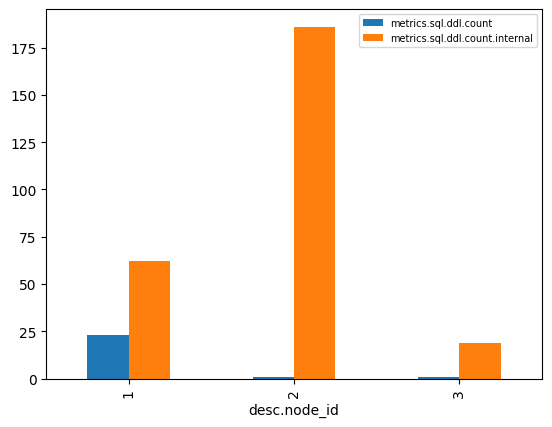

In [264]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.ddl.count', 'metrics.sql.ddl.count.internal'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

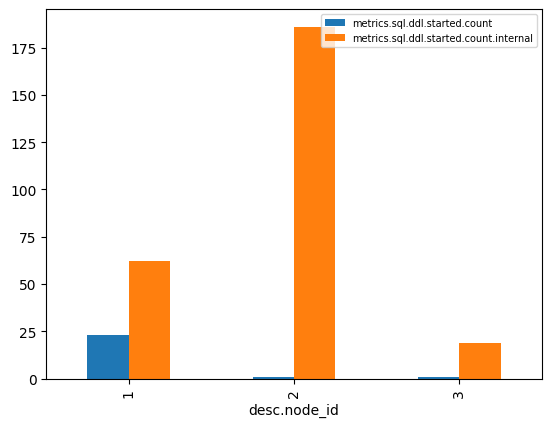

In [265]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.ddl.started.count', 'metrics.sql.ddl.started.count.internal'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

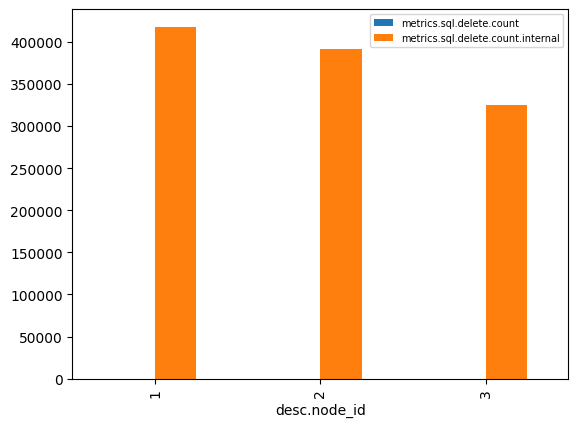

In [266]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.delete.count', 'metrics.sql.delete.count.internal'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

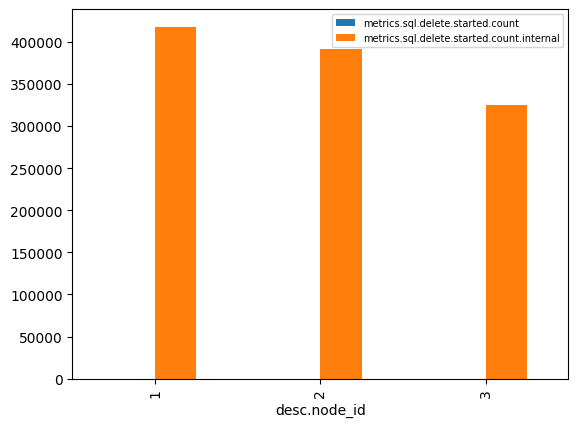

In [267]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.delete.started.count', 'metrics.sql.delete.started.count.internal'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

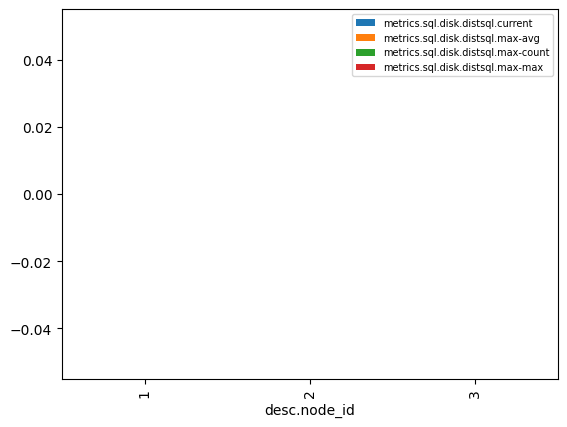

In [268]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.disk.distsql.current', 'metrics.sql.disk.distsql.max-avg', 'metrics.sql.disk.distsql.max-count', 'metrics.sql.disk.distsql.max-max'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

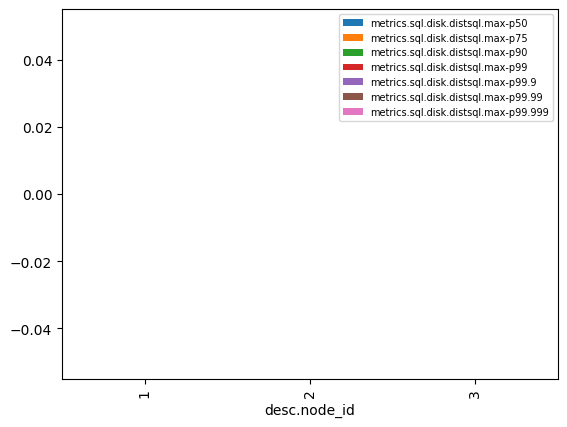

In [269]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.disk.distsql.max-p50', 'metrics.sql.disk.distsql.max-p75', 'metrics.sql.disk.distsql.max-p90', 'metrics.sql.disk.distsql.max-p99', 'metrics.sql.disk.distsql.max-p99.9', 'metrics.sql.disk.distsql.max-p99.99', 'metrics.sql.disk.distsql.max-p99.999'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

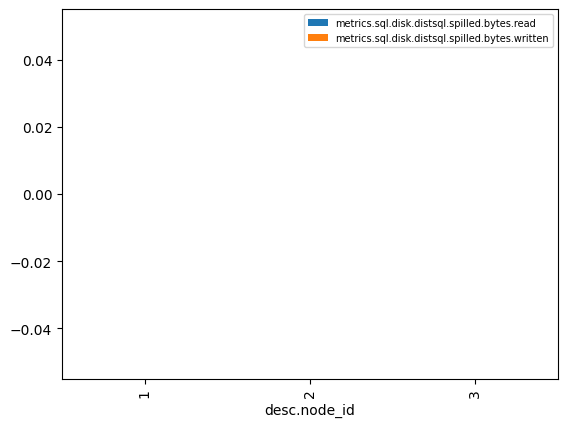

In [270]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.disk.distsql.spilled.bytes.read', 'metrics.sql.disk.distsql.spilled.bytes.written'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

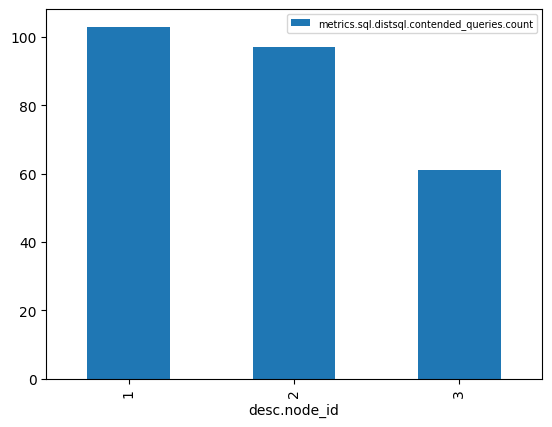

In [271]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.distsql.contended_queries.count'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

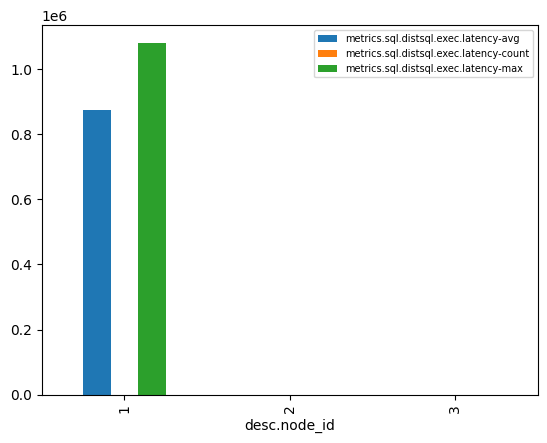

In [272]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.distsql.exec.latency-avg', 'metrics.sql.distsql.exec.latency-count', 'metrics.sql.distsql.exec.latency-max'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

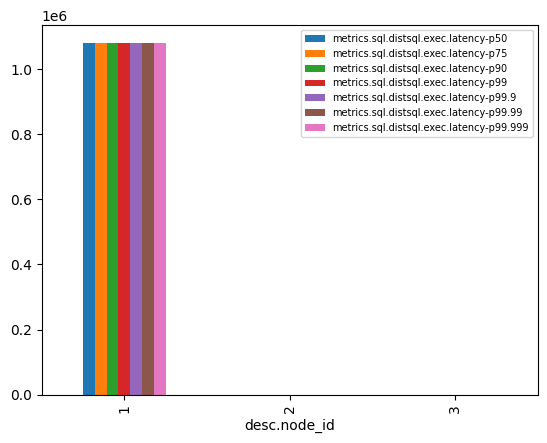

In [273]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.distsql.exec.latency-p50', 'metrics.sql.distsql.exec.latency-p75', 'metrics.sql.distsql.exec.latency-p90', 'metrics.sql.distsql.exec.latency-p99', 'metrics.sql.distsql.exec.latency-p99.9', 'metrics.sql.distsql.exec.latency-p99.99', 'metrics.sql.distsql.exec.latency-p99.999'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

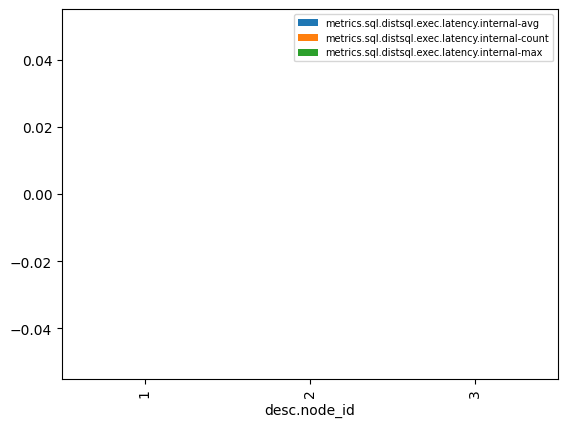

In [274]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.distsql.exec.latency.internal-avg', 'metrics.sql.distsql.exec.latency.internal-count', 'metrics.sql.distsql.exec.latency.internal-max'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

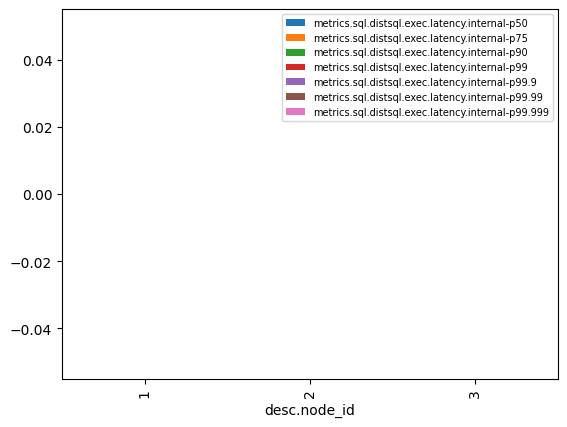

In [275]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.distsql.exec.latency.internal-p50', 'metrics.sql.distsql.exec.latency.internal-p75', 'metrics.sql.distsql.exec.latency.internal-p90', 'metrics.sql.distsql.exec.latency.internal-p99', 'metrics.sql.distsql.exec.latency.internal-p99.9', 'metrics.sql.distsql.exec.latency.internal-p99.99', 'metrics.sql.distsql.exec.latency.internal-p99.999'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

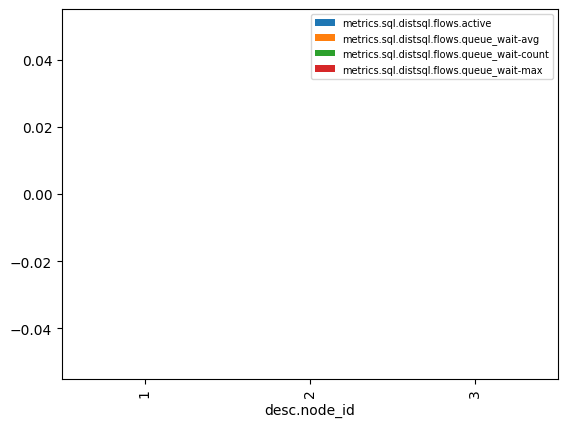

In [276]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.distsql.flows.active', 'metrics.sql.distsql.flows.queue_wait-avg', 'metrics.sql.distsql.flows.queue_wait-count', 'metrics.sql.distsql.flows.queue_wait-max'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

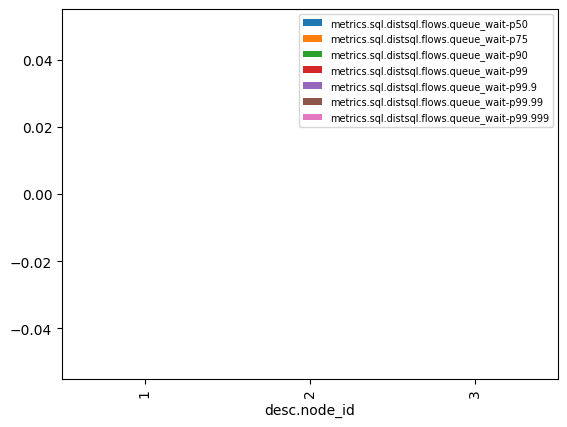

In [277]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.distsql.flows.queue_wait-p50', 'metrics.sql.distsql.flows.queue_wait-p75', 'metrics.sql.distsql.flows.queue_wait-p90', 'metrics.sql.distsql.flows.queue_wait-p99', 'metrics.sql.distsql.flows.queue_wait-p99.9', 'metrics.sql.distsql.flows.queue_wait-p99.99', 'metrics.sql.distsql.flows.queue_wait-p99.999'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

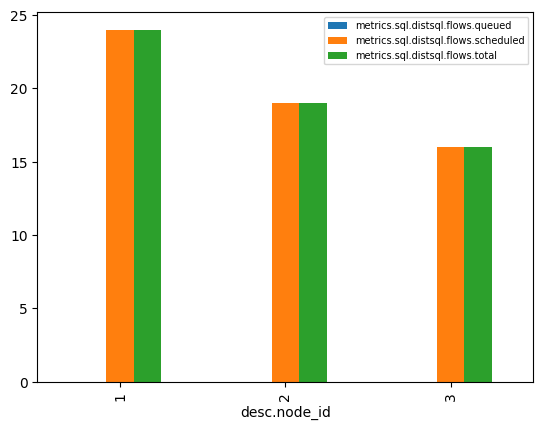

In [278]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.distsql.flows.queued', 'metrics.sql.distsql.flows.scheduled', 'metrics.sql.distsql.flows.total'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

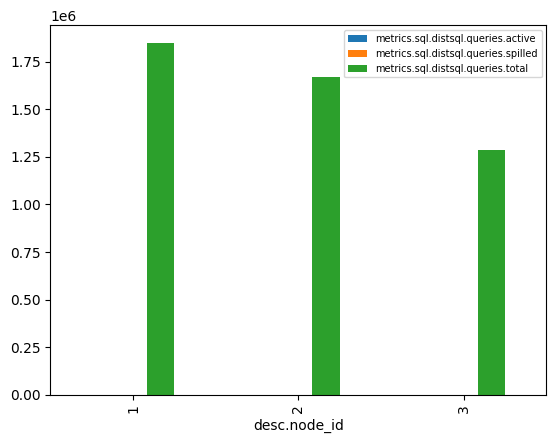

In [279]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.distsql.queries.active', 'metrics.sql.distsql.queries.spilled', 'metrics.sql.distsql.queries.total'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

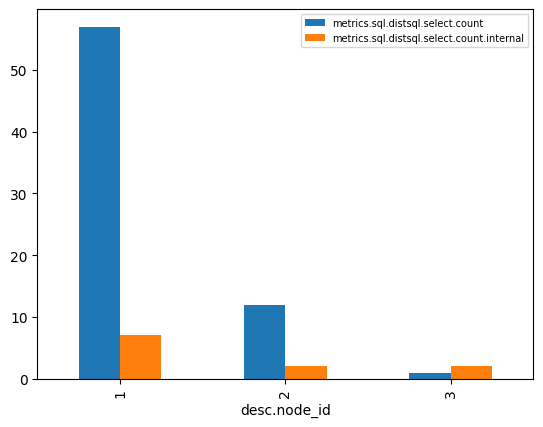

In [280]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.distsql.select.count', 'metrics.sql.distsql.select.count.internal'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

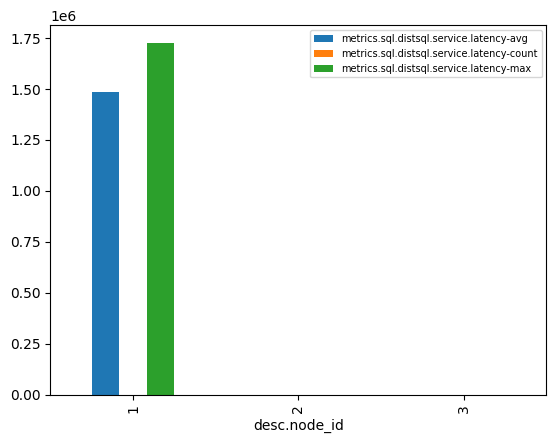

In [281]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.distsql.service.latency-avg', 'metrics.sql.distsql.service.latency-count', 'metrics.sql.distsql.service.latency-max'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

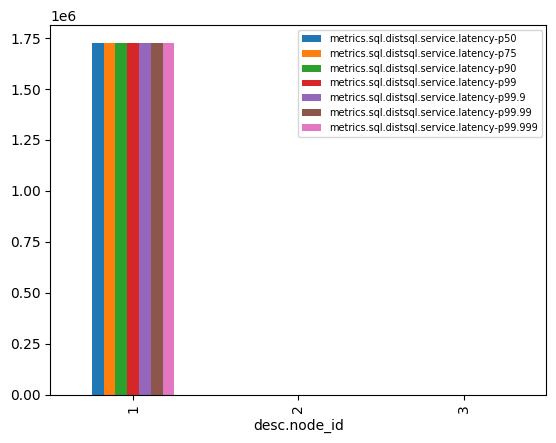

In [282]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.distsql.service.latency-p50', 'metrics.sql.distsql.service.latency-p75', 'metrics.sql.distsql.service.latency-p90', 'metrics.sql.distsql.service.latency-p99', 'metrics.sql.distsql.service.latency-p99.9', 'metrics.sql.distsql.service.latency-p99.99', 'metrics.sql.distsql.service.latency-p99.999'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

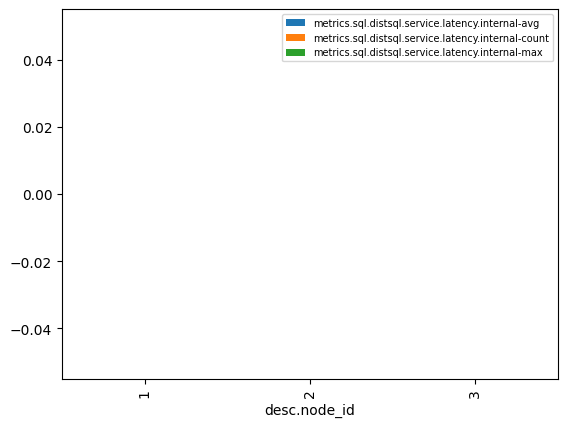

In [283]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.distsql.service.latency.internal-avg', 'metrics.sql.distsql.service.latency.internal-count', 'metrics.sql.distsql.service.latency.internal-max'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

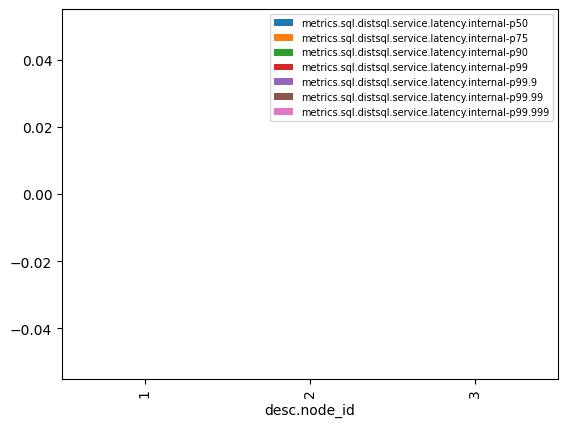

In [284]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.distsql.service.latency.internal-p50', 'metrics.sql.distsql.service.latency.internal-p75', 'metrics.sql.distsql.service.latency.internal-p90', 'metrics.sql.distsql.service.latency.internal-p99', 'metrics.sql.distsql.service.latency.internal-p99.9', 'metrics.sql.distsql.service.latency.internal-p99.99', 'metrics.sql.distsql.service.latency.internal-p99.999'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

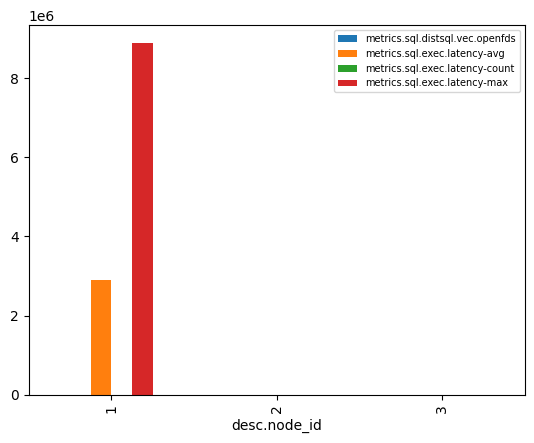

In [285]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.distsql.vec.openfds', 'metrics.sql.exec.latency-avg', 'metrics.sql.exec.latency-count', 'metrics.sql.exec.latency-max'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

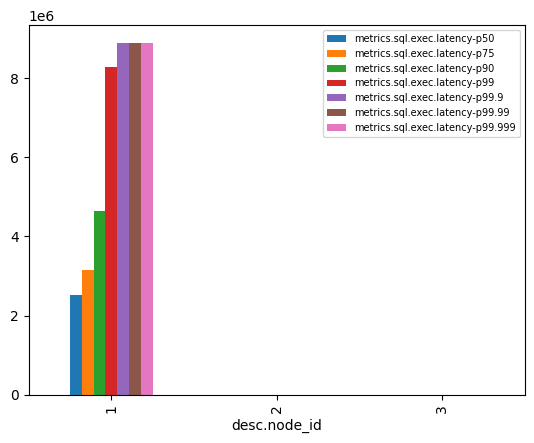

In [286]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.exec.latency-p50', 'metrics.sql.exec.latency-p75', 'metrics.sql.exec.latency-p90', 'metrics.sql.exec.latency-p99', 'metrics.sql.exec.latency-p99.9', 'metrics.sql.exec.latency-p99.99', 'metrics.sql.exec.latency-p99.999'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

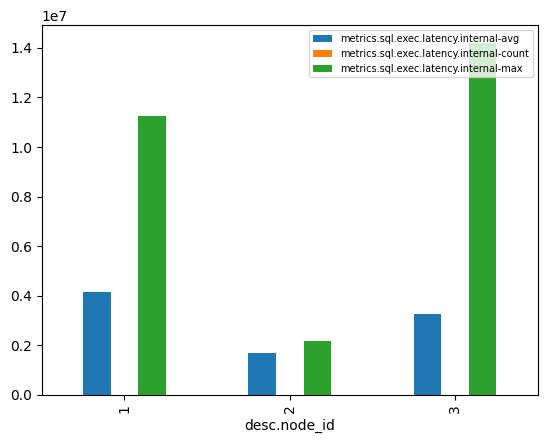

In [287]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.exec.latency.internal-avg', 'metrics.sql.exec.latency.internal-count', 'metrics.sql.exec.latency.internal-max'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

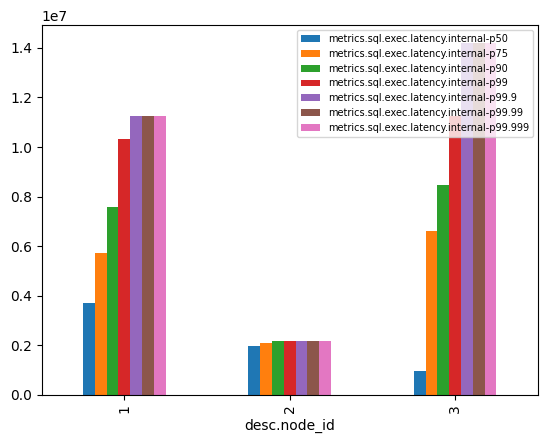

In [288]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.exec.latency.internal-p50', 'metrics.sql.exec.latency.internal-p75', 'metrics.sql.exec.latency.internal-p90', 'metrics.sql.exec.latency.internal-p99', 'metrics.sql.exec.latency.internal-p99.9', 'metrics.sql.exec.latency.internal-p99.99', 'metrics.sql.exec.latency.internal-p99.999'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

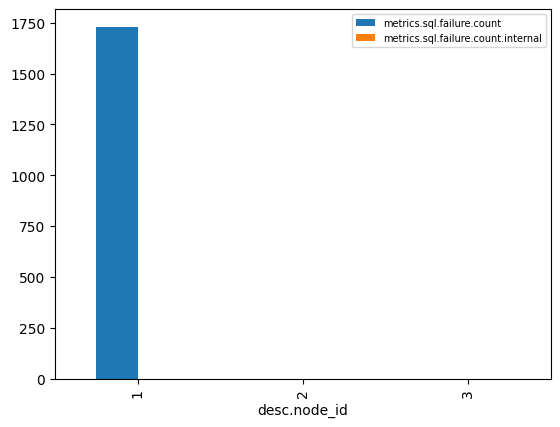

In [289]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.failure.count', 'metrics.sql.failure.count.internal'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

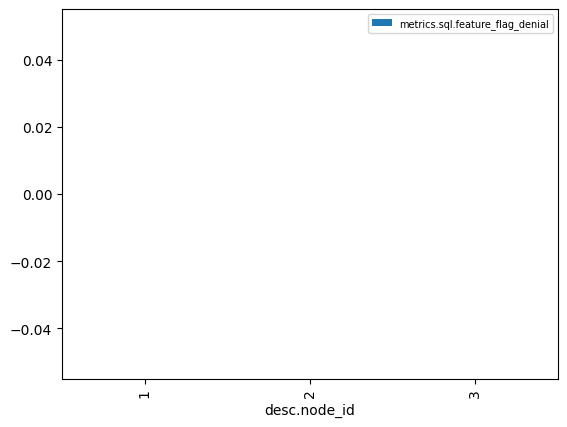

In [290]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.feature_flag_denial'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

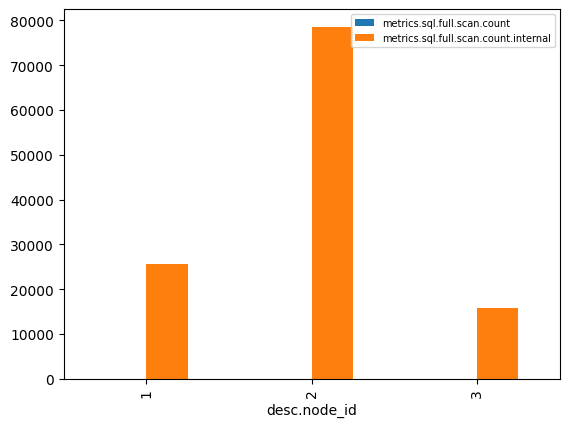

In [291]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.full.scan.count', 'metrics.sql.full.scan.count.internal'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

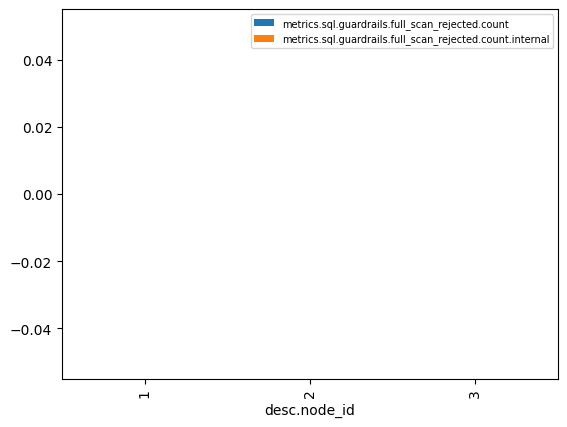

In [292]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.guardrails.full_scan_rejected.count', 'metrics.sql.guardrails.full_scan_rejected.count.internal'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

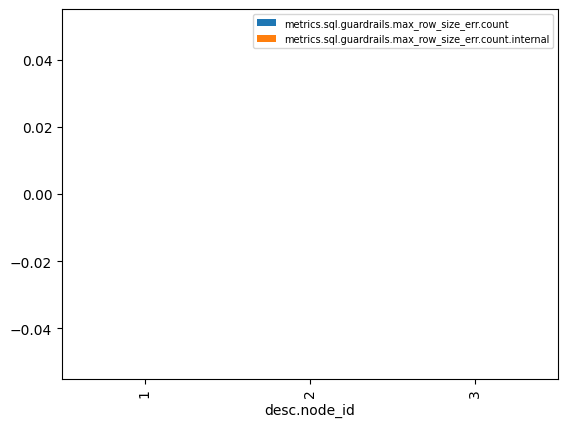

In [293]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.guardrails.max_row_size_err.count', 'metrics.sql.guardrails.max_row_size_err.count.internal'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

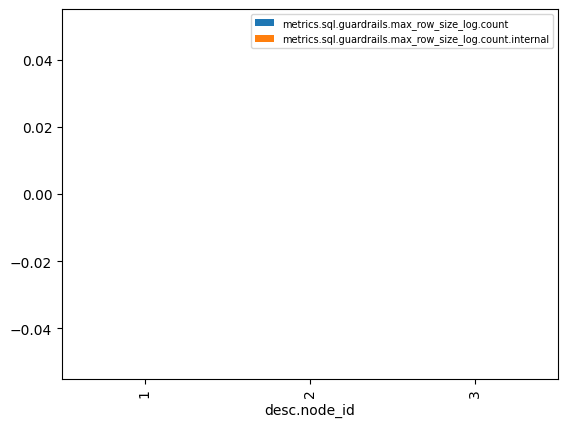

In [294]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.guardrails.max_row_size_log.count', 'metrics.sql.guardrails.max_row_size_log.count.internal'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

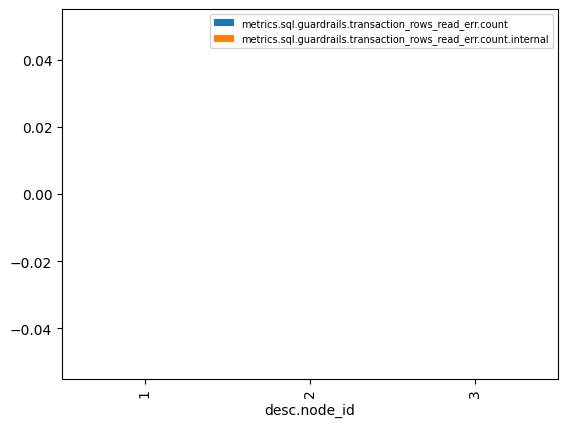

In [295]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.guardrails.transaction_rows_read_err.count', 'metrics.sql.guardrails.transaction_rows_read_err.count.internal'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

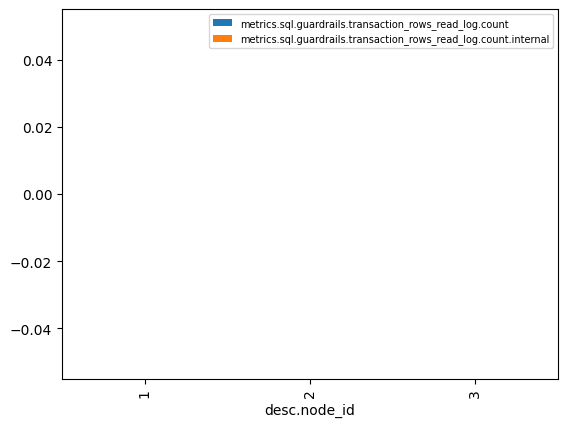

In [296]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.guardrails.transaction_rows_read_log.count', 'metrics.sql.guardrails.transaction_rows_read_log.count.internal'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

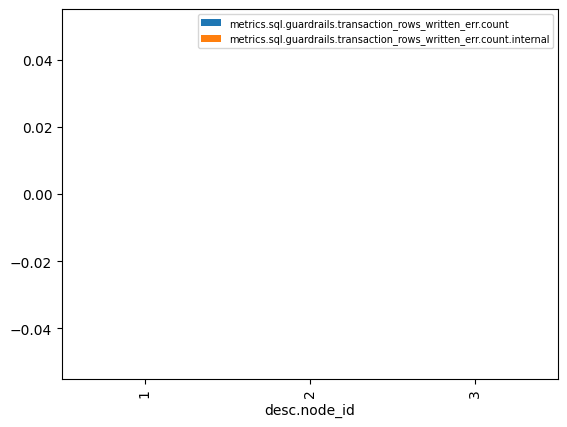

In [297]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.guardrails.transaction_rows_written_err.count', 'metrics.sql.guardrails.transaction_rows_written_err.count.internal'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

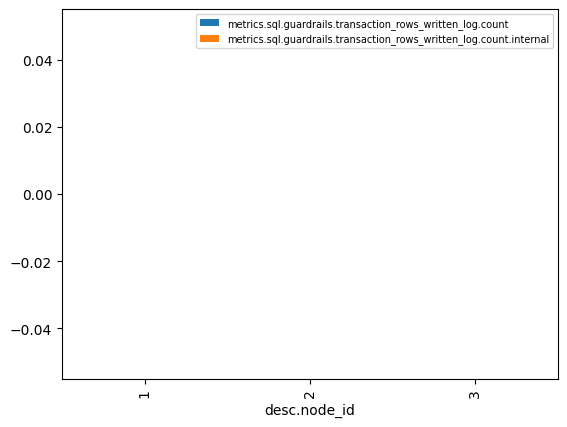

In [298]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.guardrails.transaction_rows_written_log.count', 'metrics.sql.guardrails.transaction_rows_written_log.count.internal'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

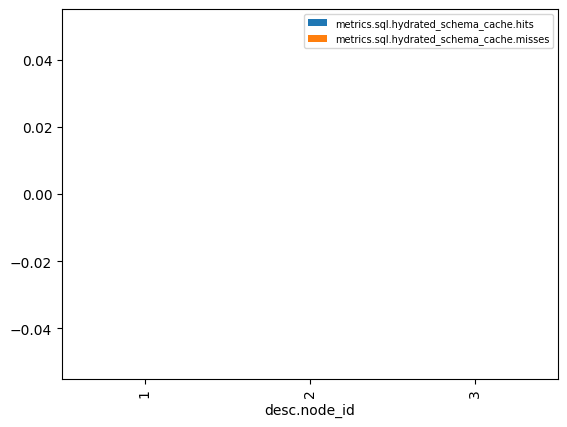

In [299]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.hydrated_schema_cache.hits', 'metrics.sql.hydrated_schema_cache.misses'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

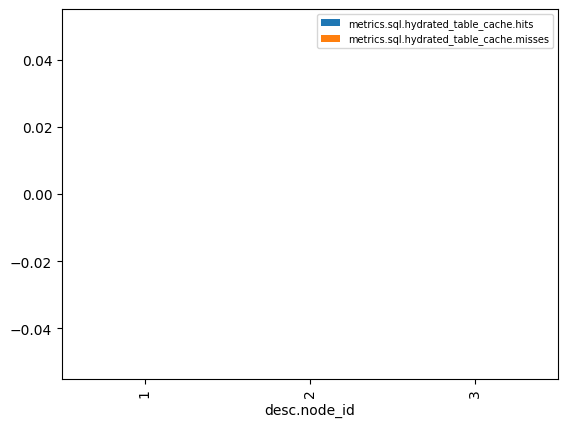

In [300]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.hydrated_table_cache.hits', 'metrics.sql.hydrated_table_cache.misses'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

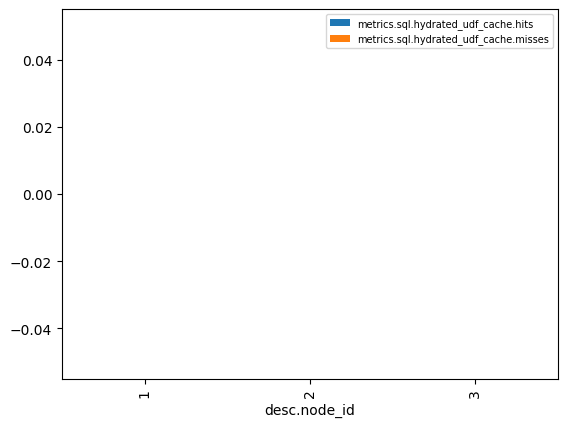

In [301]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.hydrated_udf_cache.hits', 'metrics.sql.hydrated_udf_cache.misses'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

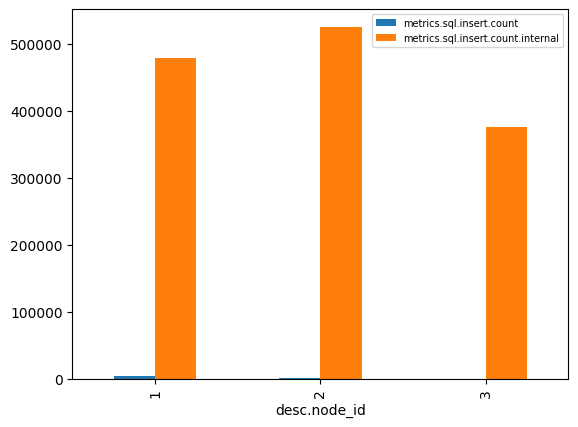

In [302]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.insert.count', 'metrics.sql.insert.count.internal'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

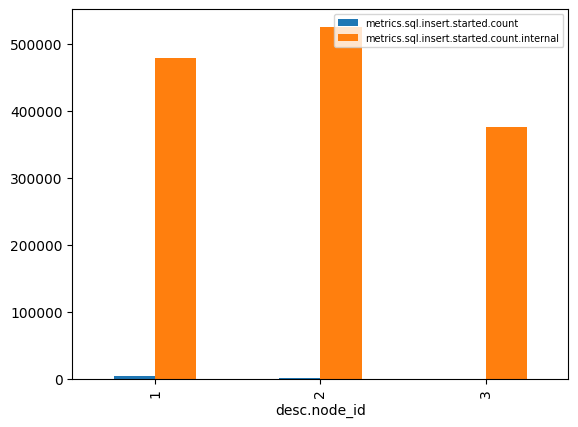

In [303]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.insert.started.count', 'metrics.sql.insert.started.count.internal'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

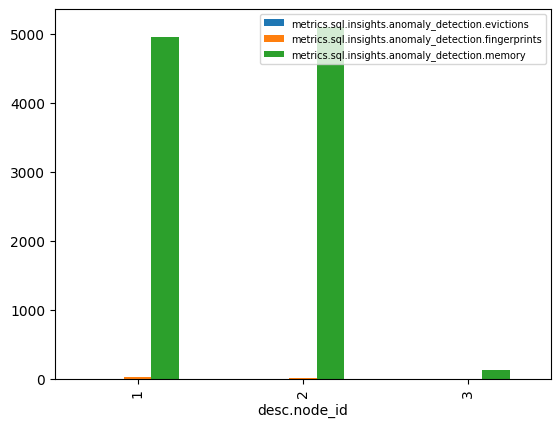

In [304]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.insights.anomaly_detection.evictions', 'metrics.sql.insights.anomaly_detection.fingerprints', 'metrics.sql.insights.anomaly_detection.memory'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

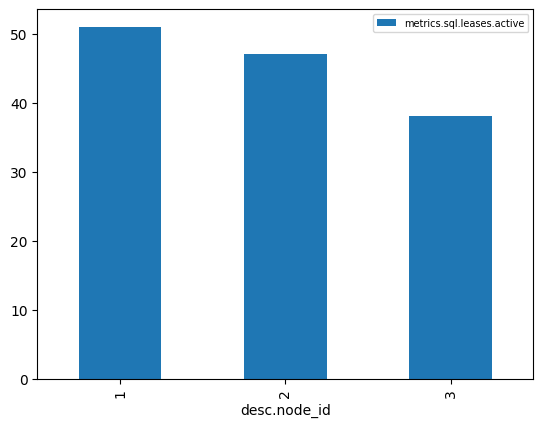

In [305]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.leases.active'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

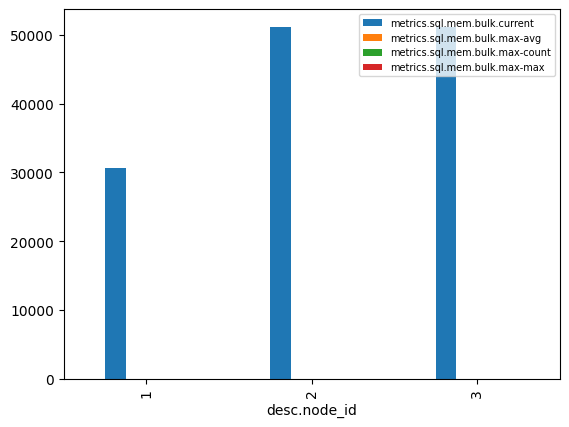

In [306]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.mem.bulk.current', 'metrics.sql.mem.bulk.max-avg', 'metrics.sql.mem.bulk.max-count', 'metrics.sql.mem.bulk.max-max'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

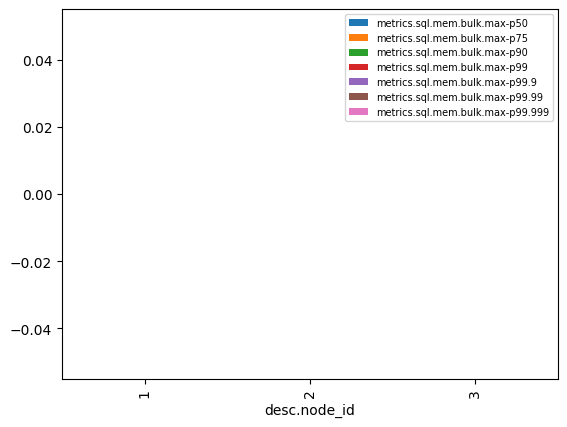

In [307]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.mem.bulk.max-p50', 'metrics.sql.mem.bulk.max-p75', 'metrics.sql.mem.bulk.max-p90', 'metrics.sql.mem.bulk.max-p99', 'metrics.sql.mem.bulk.max-p99.9', 'metrics.sql.mem.bulk.max-p99.99', 'metrics.sql.mem.bulk.max-p99.999'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

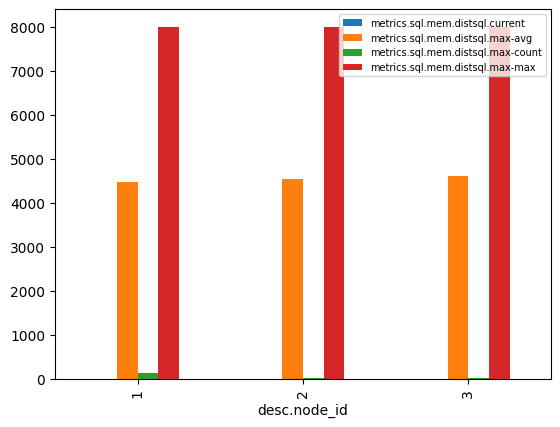

In [308]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.mem.distsql.current', 'metrics.sql.mem.distsql.max-avg', 'metrics.sql.mem.distsql.max-count', 'metrics.sql.mem.distsql.max-max'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

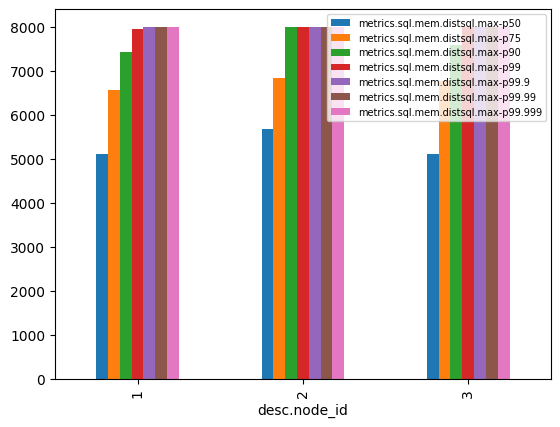

In [309]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.mem.distsql.max-p50', 'metrics.sql.mem.distsql.max-p75', 'metrics.sql.mem.distsql.max-p90', 'metrics.sql.mem.distsql.max-p99', 'metrics.sql.mem.distsql.max-p99.9', 'metrics.sql.mem.distsql.max-p99.99', 'metrics.sql.mem.distsql.max-p99.999'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

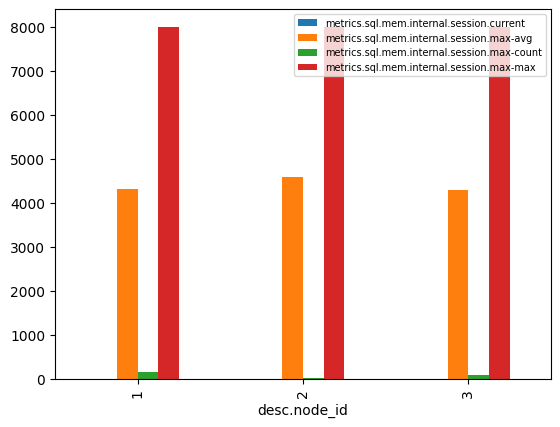

In [310]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.mem.internal.session.current', 'metrics.sql.mem.internal.session.max-avg', 'metrics.sql.mem.internal.session.max-count', 'metrics.sql.mem.internal.session.max-max'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

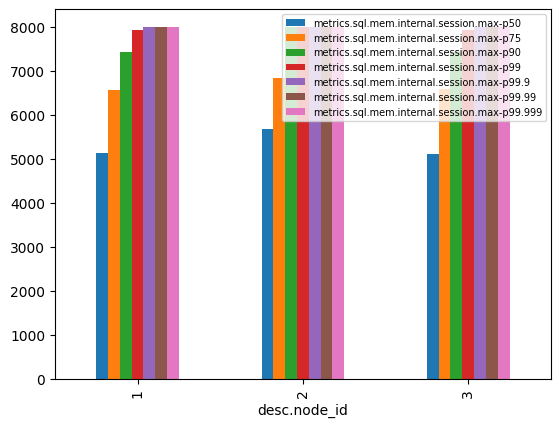

In [311]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.mem.internal.session.max-p50', 'metrics.sql.mem.internal.session.max-p75', 'metrics.sql.mem.internal.session.max-p90', 'metrics.sql.mem.internal.session.max-p99', 'metrics.sql.mem.internal.session.max-p99.9', 'metrics.sql.mem.internal.session.max-p99.99', 'metrics.sql.mem.internal.session.max-p99.999'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

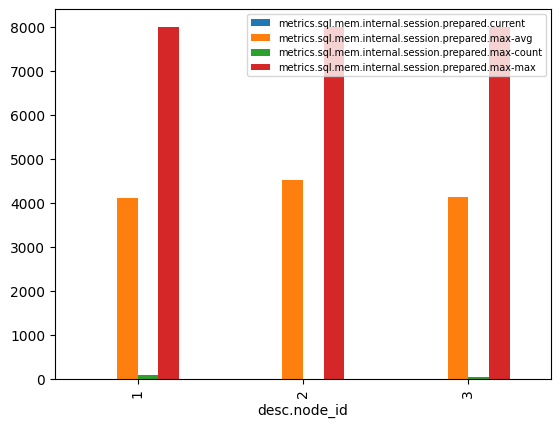

In [312]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.mem.internal.session.prepared.current', 'metrics.sql.mem.internal.session.prepared.max-avg', 'metrics.sql.mem.internal.session.prepared.max-count', 'metrics.sql.mem.internal.session.prepared.max-max'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

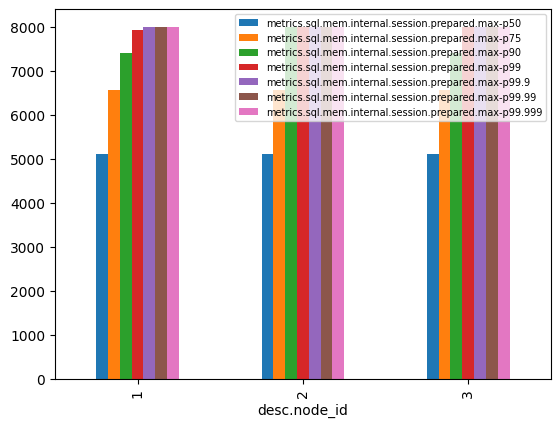

In [313]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.mem.internal.session.prepared.max-p50', 'metrics.sql.mem.internal.session.prepared.max-p75', 'metrics.sql.mem.internal.session.prepared.max-p90', 'metrics.sql.mem.internal.session.prepared.max-p99', 'metrics.sql.mem.internal.session.prepared.max-p99.9', 'metrics.sql.mem.internal.session.prepared.max-p99.99', 'metrics.sql.mem.internal.session.prepared.max-p99.999'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

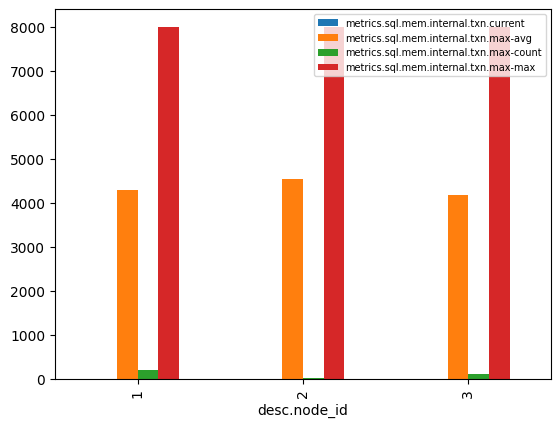

In [314]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.mem.internal.txn.current', 'metrics.sql.mem.internal.txn.max-avg', 'metrics.sql.mem.internal.txn.max-count', 'metrics.sql.mem.internal.txn.max-max'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

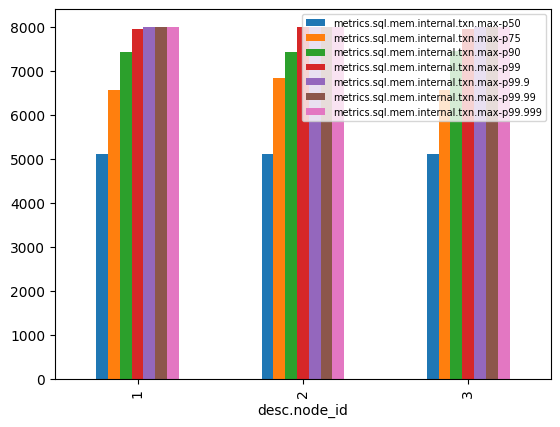

In [315]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.mem.internal.txn.max-p50', 'metrics.sql.mem.internal.txn.max-p75', 'metrics.sql.mem.internal.txn.max-p90', 'metrics.sql.mem.internal.txn.max-p99', 'metrics.sql.mem.internal.txn.max-p99.9', 'metrics.sql.mem.internal.txn.max-p99.99', 'metrics.sql.mem.internal.txn.max-p99.999'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

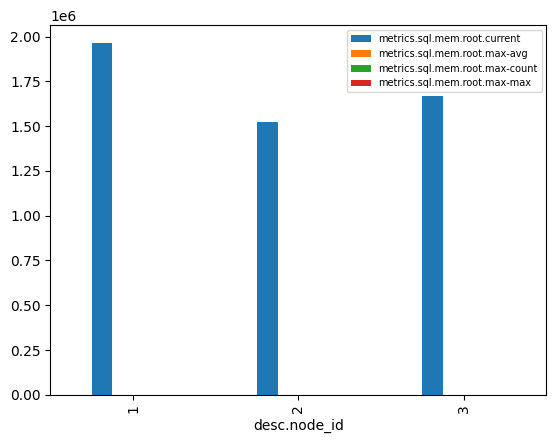

In [316]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.mem.root.current', 'metrics.sql.mem.root.max-avg', 'metrics.sql.mem.root.max-count', 'metrics.sql.mem.root.max-max'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

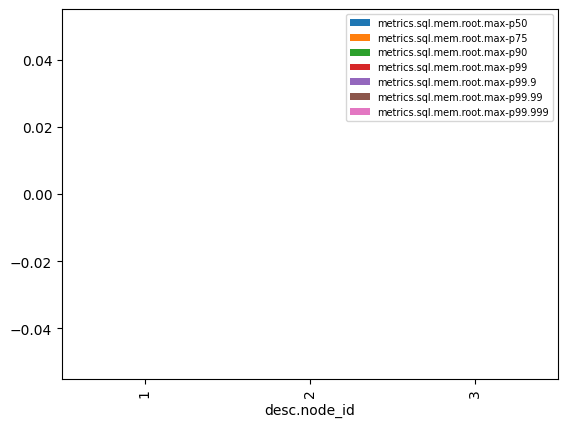

In [317]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.mem.root.max-p50', 'metrics.sql.mem.root.max-p75', 'metrics.sql.mem.root.max-p90', 'metrics.sql.mem.root.max-p99', 'metrics.sql.mem.root.max-p99.9', 'metrics.sql.mem.root.max-p99.99', 'metrics.sql.mem.root.max-p99.999'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

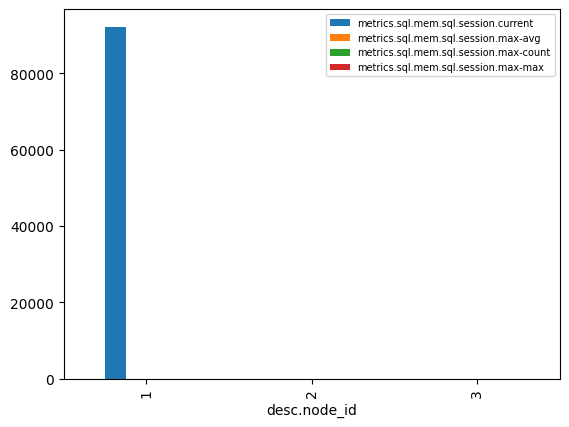

In [318]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.mem.sql.session.current', 'metrics.sql.mem.sql.session.max-avg', 'metrics.sql.mem.sql.session.max-count', 'metrics.sql.mem.sql.session.max-max'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

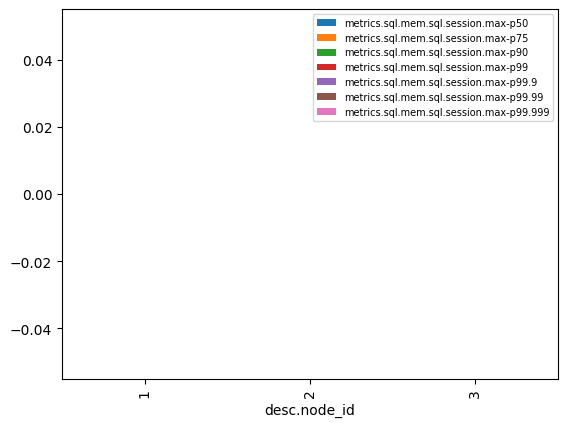

In [319]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.mem.sql.session.max-p50', 'metrics.sql.mem.sql.session.max-p75', 'metrics.sql.mem.sql.session.max-p90', 'metrics.sql.mem.sql.session.max-p99', 'metrics.sql.mem.sql.session.max-p99.9', 'metrics.sql.mem.sql.session.max-p99.99', 'metrics.sql.mem.sql.session.max-p99.999'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

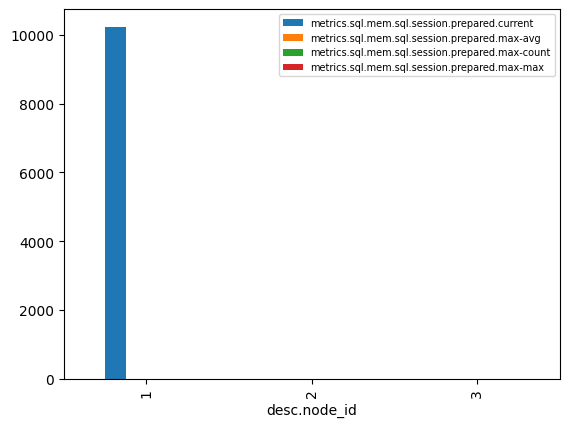

In [320]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.mem.sql.session.prepared.current', 'metrics.sql.mem.sql.session.prepared.max-avg', 'metrics.sql.mem.sql.session.prepared.max-count', 'metrics.sql.mem.sql.session.prepared.max-max'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

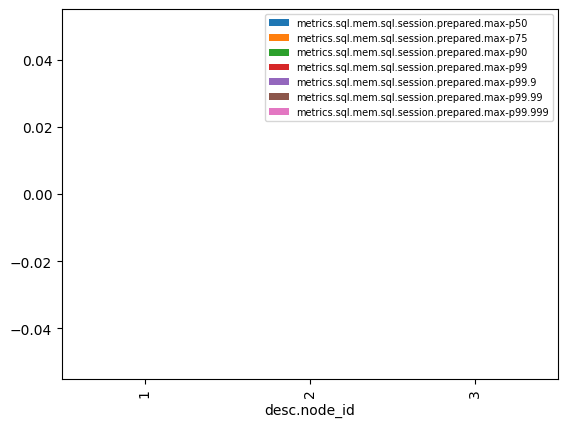

In [321]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.mem.sql.session.prepared.max-p50', 'metrics.sql.mem.sql.session.prepared.max-p75', 'metrics.sql.mem.sql.session.prepared.max-p90', 'metrics.sql.mem.sql.session.prepared.max-p99', 'metrics.sql.mem.sql.session.prepared.max-p99.9', 'metrics.sql.mem.sql.session.prepared.max-p99.99', 'metrics.sql.mem.sql.session.prepared.max-p99.999'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

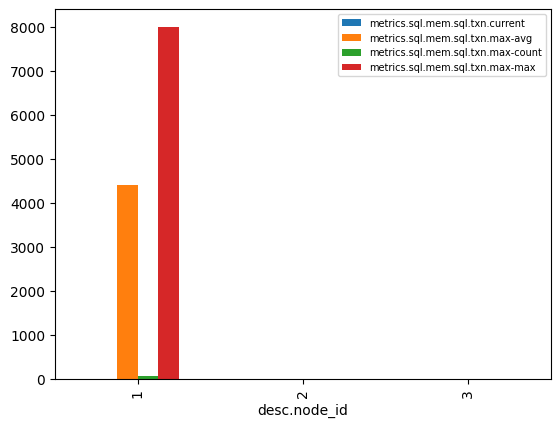

In [322]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.mem.sql.txn.current', 'metrics.sql.mem.sql.txn.max-avg', 'metrics.sql.mem.sql.txn.max-count', 'metrics.sql.mem.sql.txn.max-max'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

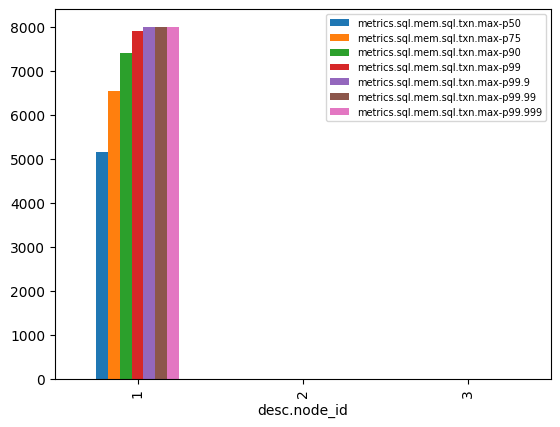

In [323]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.mem.sql.txn.max-p50', 'metrics.sql.mem.sql.txn.max-p75', 'metrics.sql.mem.sql.txn.max-p90', 'metrics.sql.mem.sql.txn.max-p99', 'metrics.sql.mem.sql.txn.max-p99.9', 'metrics.sql.mem.sql.txn.max-p99.99', 'metrics.sql.mem.sql.txn.max-p99.999'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

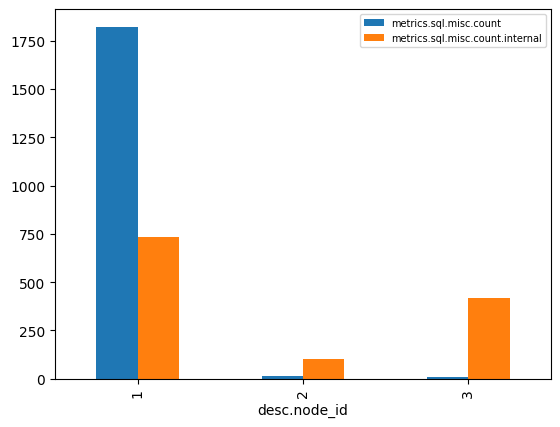

In [324]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.misc.count', 'metrics.sql.misc.count.internal'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

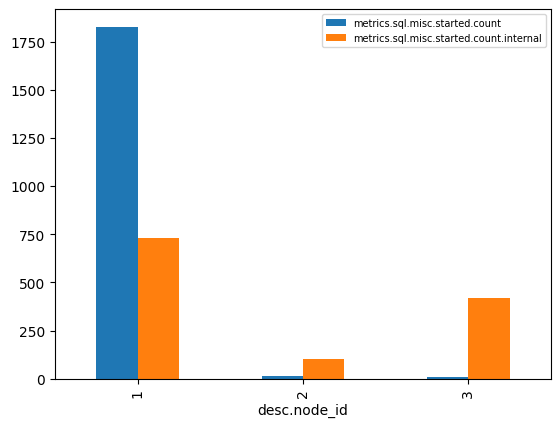

In [325]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.misc.started.count', 'metrics.sql.misc.started.count.internal'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

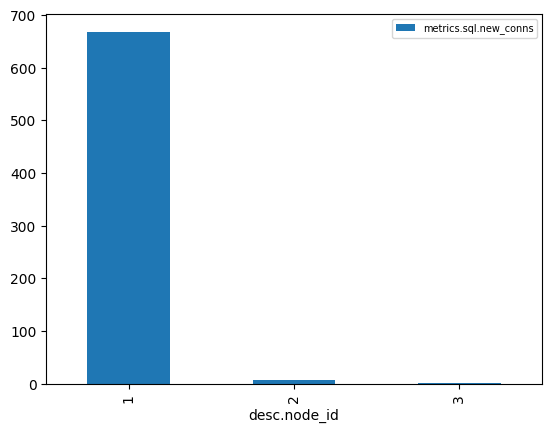

In [326]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.new_conns'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

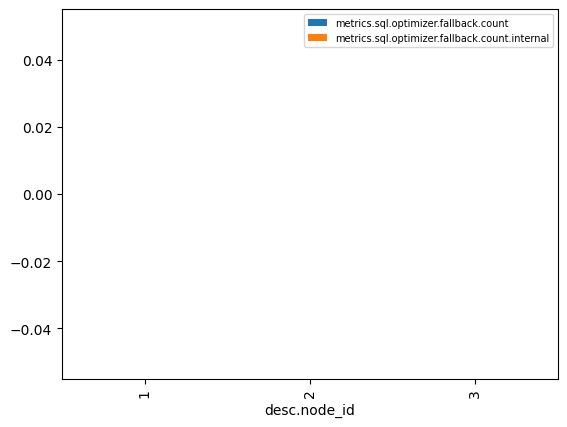

In [327]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.optimizer.fallback.count', 'metrics.sql.optimizer.fallback.count.internal'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

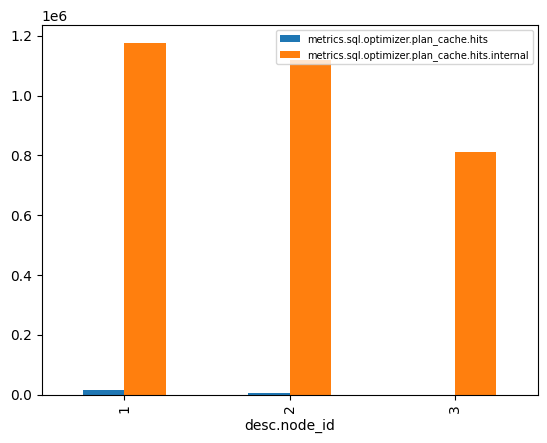

In [328]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.optimizer.plan_cache.hits', 'metrics.sql.optimizer.plan_cache.hits.internal'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

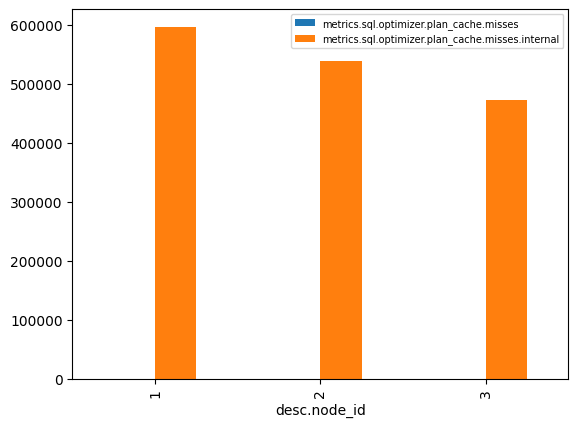

In [329]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.optimizer.plan_cache.misses', 'metrics.sql.optimizer.plan_cache.misses.internal'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

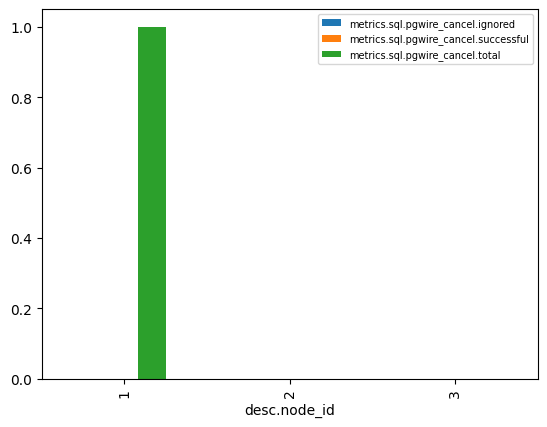

In [330]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.pgwire_cancel.ignored', 'metrics.sql.pgwire_cancel.successful', 'metrics.sql.pgwire_cancel.total'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

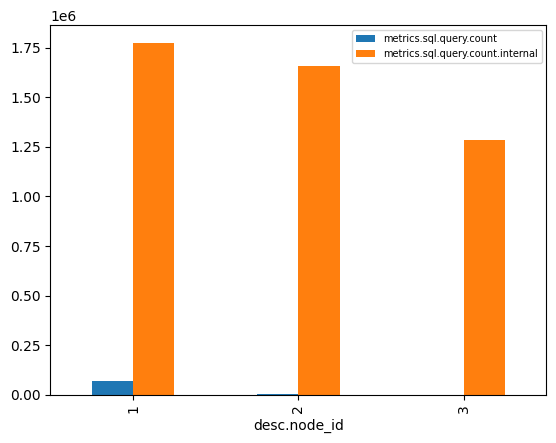

In [331]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.query.count', 'metrics.sql.query.count.internal'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

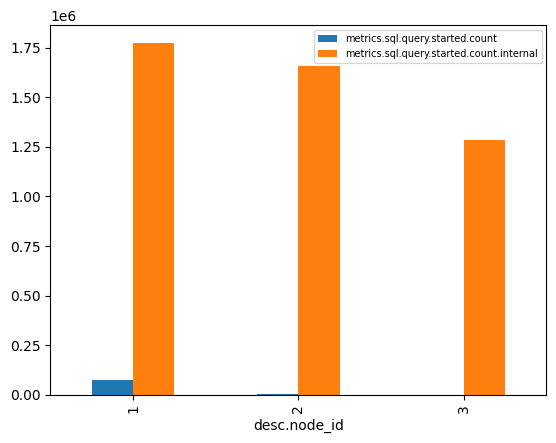

In [332]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.query.started.count', 'metrics.sql.query.started.count.internal'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

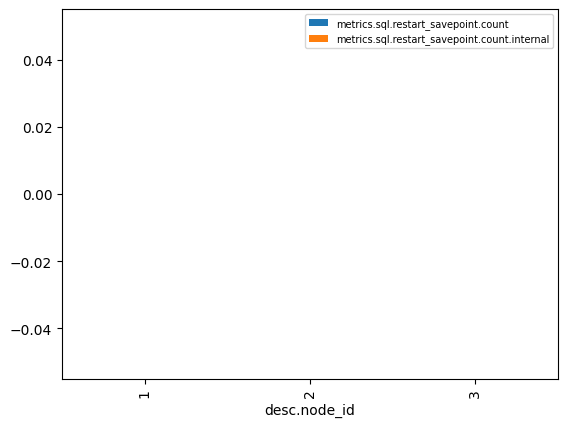

In [333]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.restart_savepoint.count', 'metrics.sql.restart_savepoint.count.internal'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

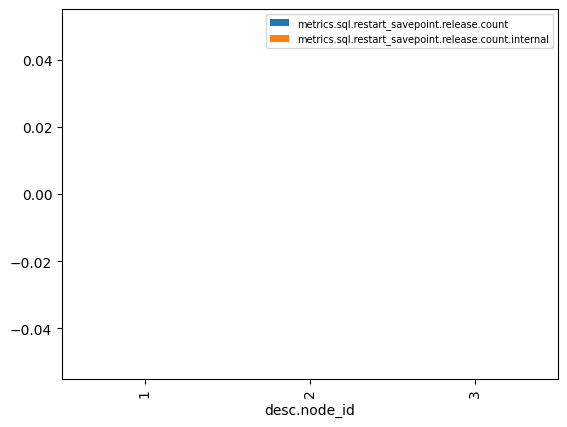

In [334]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.restart_savepoint.release.count', 'metrics.sql.restart_savepoint.release.count.internal'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

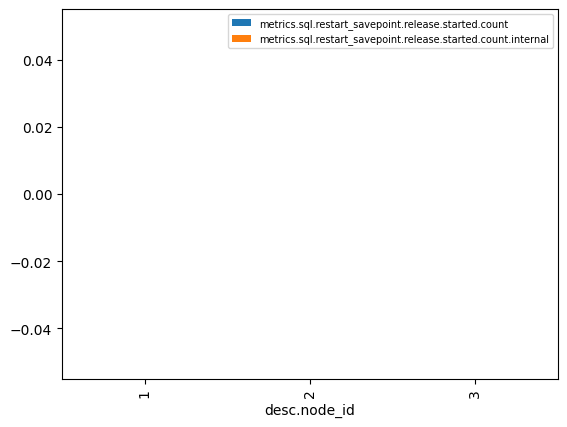

In [335]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.restart_savepoint.release.started.count', 'metrics.sql.restart_savepoint.release.started.count.internal'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

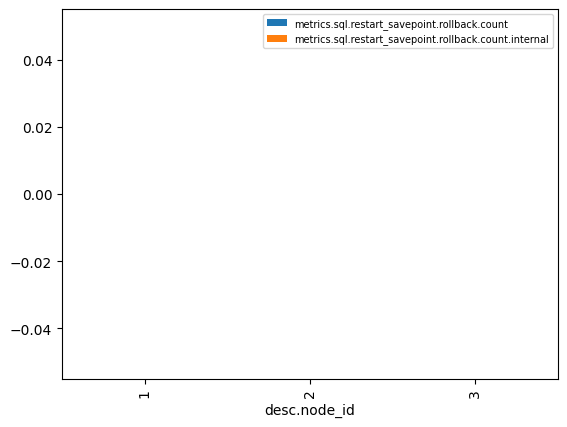

In [336]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.restart_savepoint.rollback.count', 'metrics.sql.restart_savepoint.rollback.count.internal'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

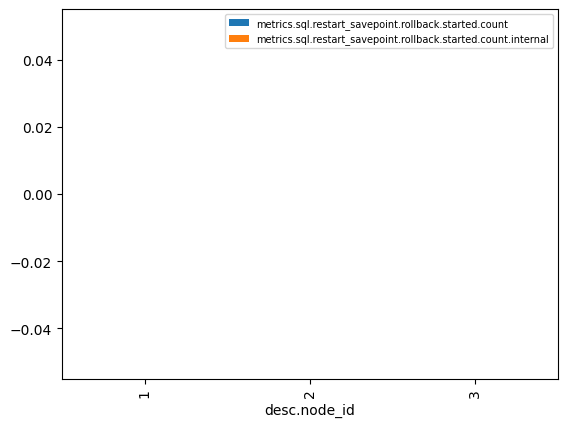

In [337]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.restart_savepoint.rollback.started.count', 'metrics.sql.restart_savepoint.rollback.started.count.internal'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

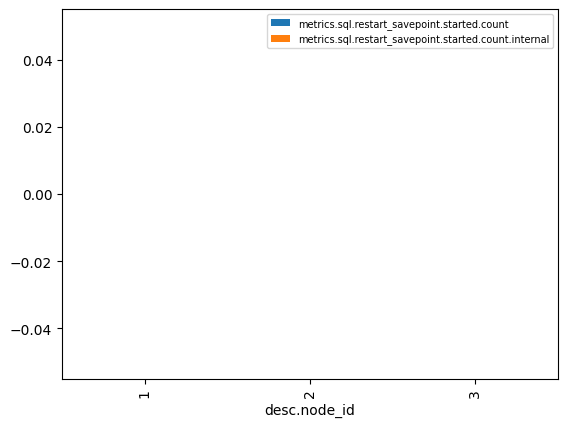

In [338]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.restart_savepoint.started.count', 'metrics.sql.restart_savepoint.started.count.internal'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

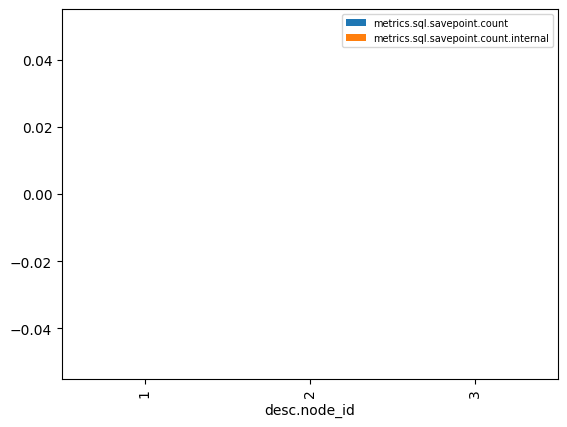

In [339]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.savepoint.count', 'metrics.sql.savepoint.count.internal'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

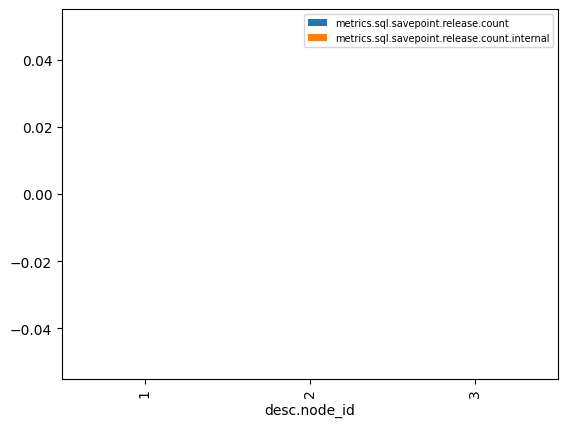

In [340]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.savepoint.release.count', 'metrics.sql.savepoint.release.count.internal'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

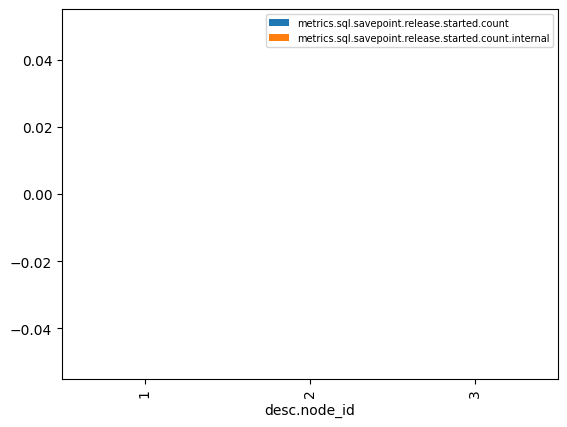

In [341]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.savepoint.release.started.count', 'metrics.sql.savepoint.release.started.count.internal'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

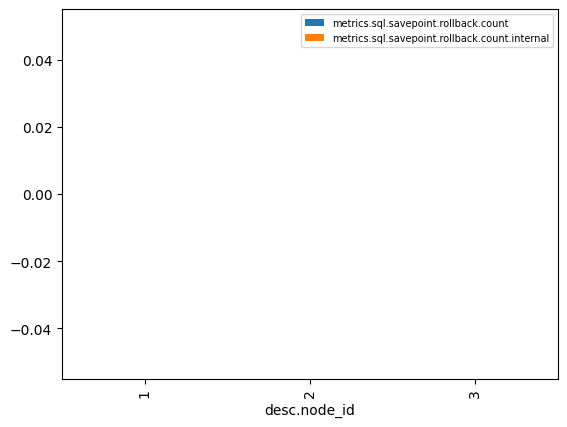

In [342]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.savepoint.rollback.count', 'metrics.sql.savepoint.rollback.count.internal'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

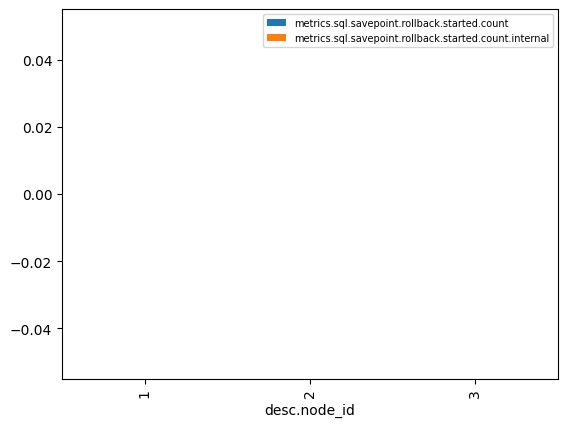

In [343]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.savepoint.rollback.started.count', 'metrics.sql.savepoint.rollback.started.count.internal'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

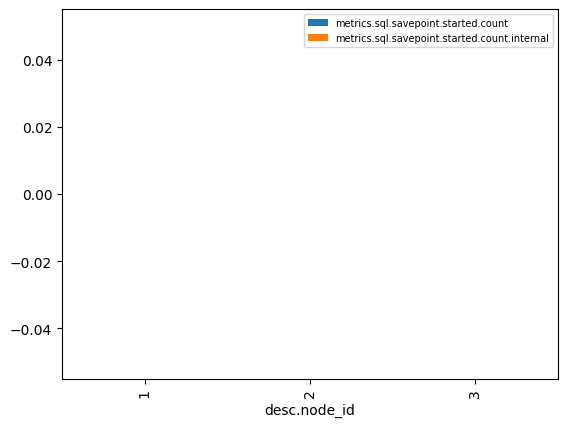

In [344]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.savepoint.started.count', 'metrics.sql.savepoint.started.count.internal'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

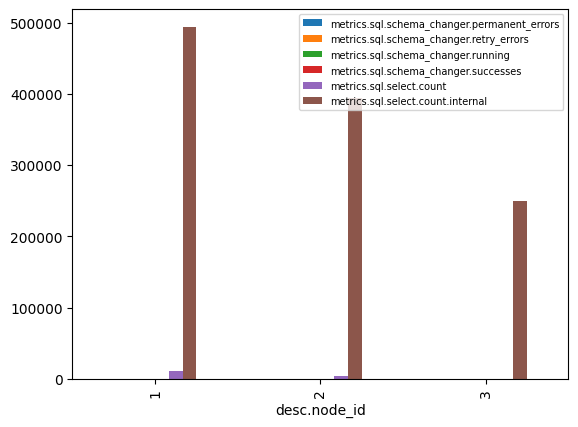

In [345]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.schema_changer.permanent_errors', 'metrics.sql.schema_changer.retry_errors', 'metrics.sql.schema_changer.running', 'metrics.sql.schema_changer.successes', 'metrics.sql.select.count', 'metrics.sql.select.count.internal'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

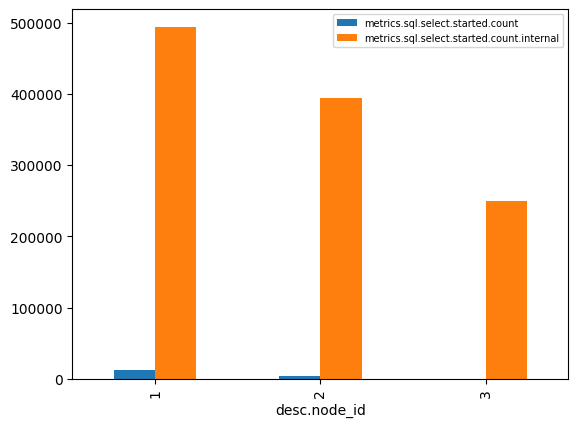

In [346]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.select.started.count', 'metrics.sql.select.started.count.internal'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

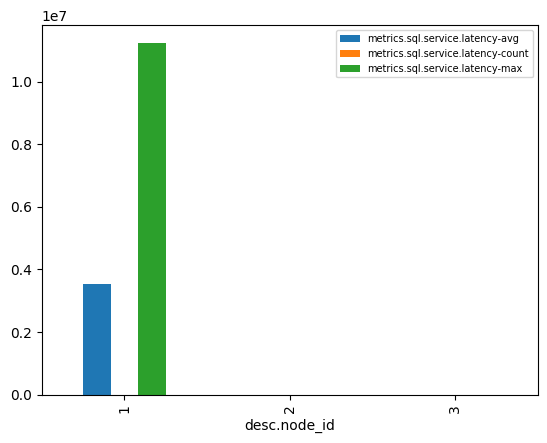

In [347]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.service.latency-avg', 'metrics.sql.service.latency-count', 'metrics.sql.service.latency-max'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

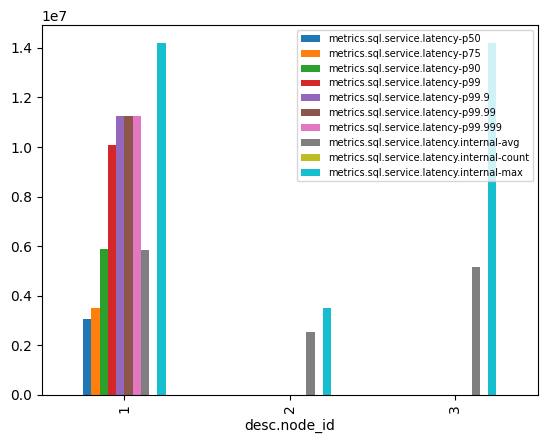

In [348]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.service.latency-p50', 'metrics.sql.service.latency-p75', 'metrics.sql.service.latency-p90', 'metrics.sql.service.latency-p99', 'metrics.sql.service.latency-p99.9', 'metrics.sql.service.latency-p99.99', 'metrics.sql.service.latency-p99.999', 'metrics.sql.service.latency.internal-avg', 'metrics.sql.service.latency.internal-count', 'metrics.sql.service.latency.internal-max'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

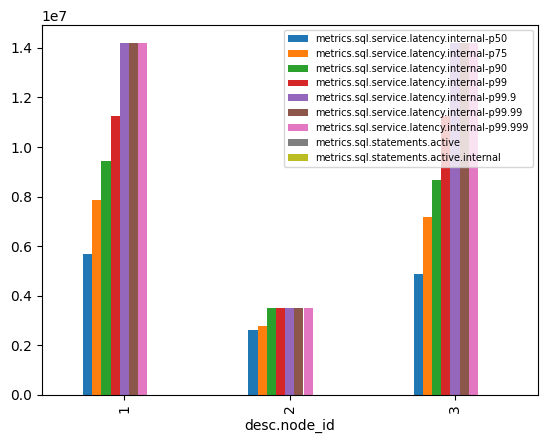

In [349]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.service.latency.internal-p50', 'metrics.sql.service.latency.internal-p75', 'metrics.sql.service.latency.internal-p90', 'metrics.sql.service.latency.internal-p99', 'metrics.sql.service.latency.internal-p99.9', 'metrics.sql.service.latency.internal-p99.99', 'metrics.sql.service.latency.internal-p99.999', 'metrics.sql.statements.active', 'metrics.sql.statements.active.internal'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

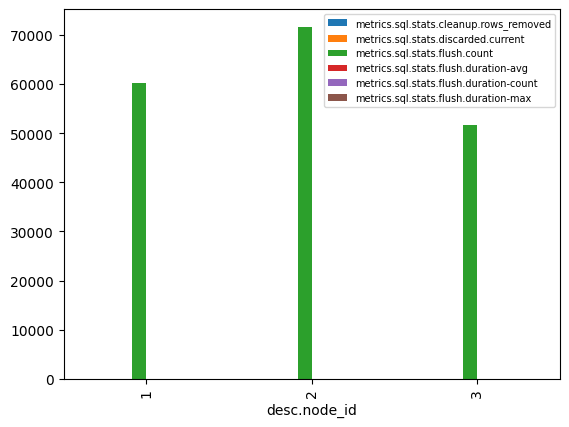

In [350]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.stats.cleanup.rows_removed', 'metrics.sql.stats.discarded.current', 'metrics.sql.stats.flush.count', 'metrics.sql.stats.flush.duration-avg', 'metrics.sql.stats.flush.duration-count', 'metrics.sql.stats.flush.duration-max'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

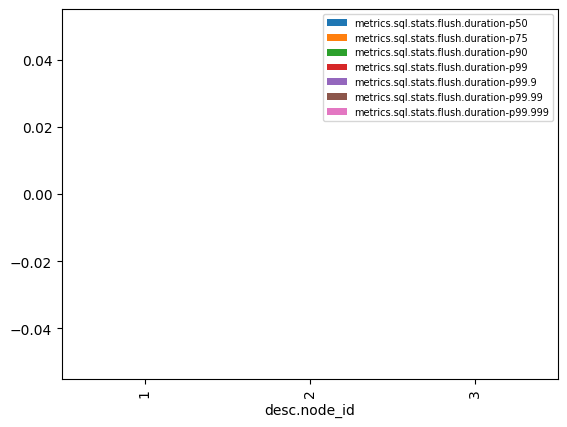

In [351]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.stats.flush.duration-p50', 'metrics.sql.stats.flush.duration-p75', 'metrics.sql.stats.flush.duration-p90', 'metrics.sql.stats.flush.duration-p99', 'metrics.sql.stats.flush.duration-p99.9', 'metrics.sql.stats.flush.duration-p99.99', 'metrics.sql.stats.flush.duration-p99.999'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

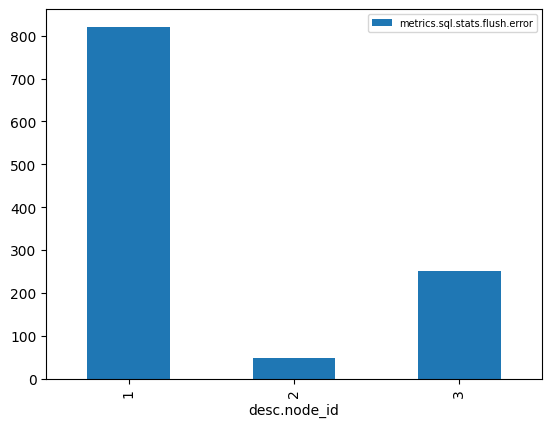

In [352]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.stats.flush.error'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

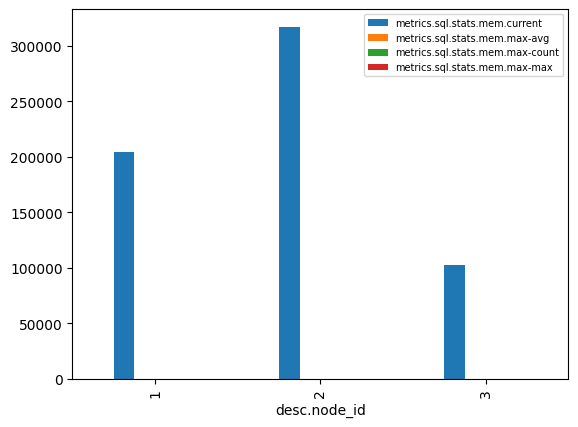

In [353]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.stats.mem.current', 'metrics.sql.stats.mem.max-avg', 'metrics.sql.stats.mem.max-count', 'metrics.sql.stats.mem.max-max'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

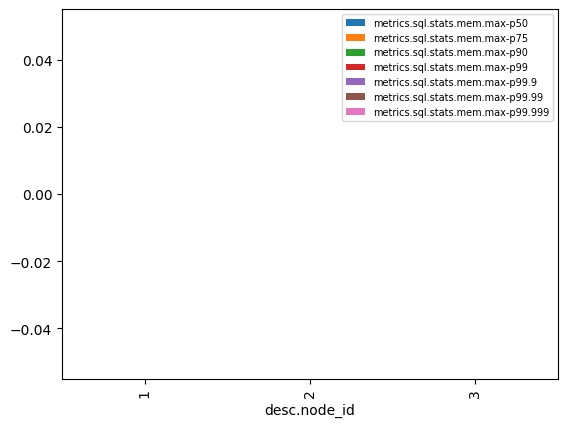

In [354]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.stats.mem.max-p50', 'metrics.sql.stats.mem.max-p75', 'metrics.sql.stats.mem.max-p90', 'metrics.sql.stats.mem.max-p99', 'metrics.sql.stats.mem.max-p99.9', 'metrics.sql.stats.mem.max-p99.99', 'metrics.sql.stats.mem.max-p99.999'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

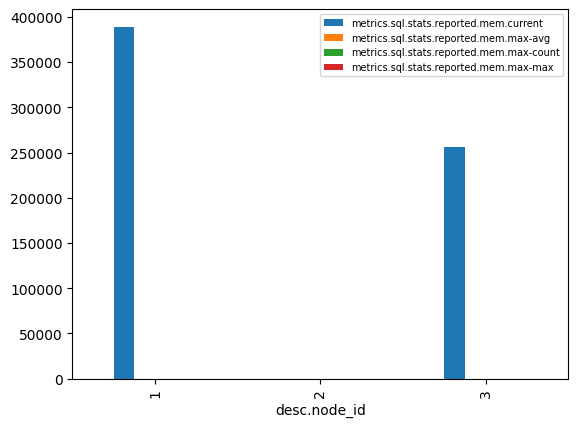

In [355]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.stats.reported.mem.current', 'metrics.sql.stats.reported.mem.max-avg', 'metrics.sql.stats.reported.mem.max-count', 'metrics.sql.stats.reported.mem.max-max'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

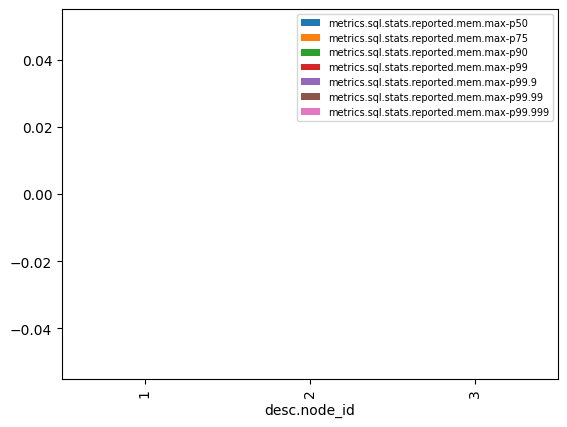

In [356]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.stats.reported.mem.max-p50', 'metrics.sql.stats.reported.mem.max-p75', 'metrics.sql.stats.reported.mem.max-p90', 'metrics.sql.stats.reported.mem.max-p99', 'metrics.sql.stats.reported.mem.max-p99.9', 'metrics.sql.stats.reported.mem.max-p99.99', 'metrics.sql.stats.reported.mem.max-p99.999'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

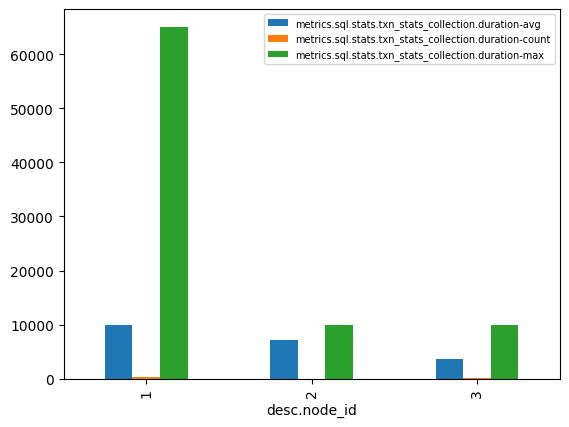

In [357]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.stats.txn_stats_collection.duration-avg', 'metrics.sql.stats.txn_stats_collection.duration-count', 'metrics.sql.stats.txn_stats_collection.duration-max'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

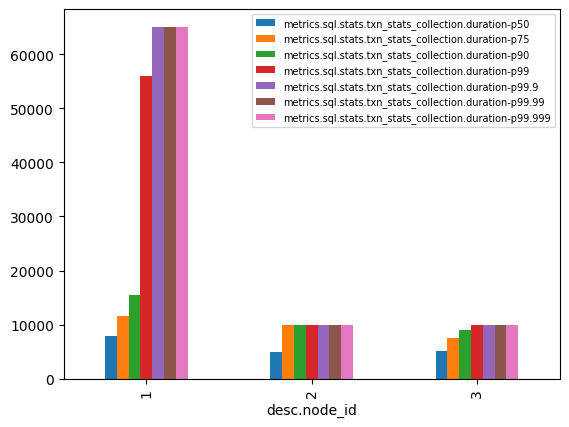

In [358]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.stats.txn_stats_collection.duration-p50', 'metrics.sql.stats.txn_stats_collection.duration-p75', 'metrics.sql.stats.txn_stats_collection.duration-p90', 'metrics.sql.stats.txn_stats_collection.duration-p99', 'metrics.sql.stats.txn_stats_collection.duration-p99.9', 'metrics.sql.stats.txn_stats_collection.duration-p99.99', 'metrics.sql.stats.txn_stats_collection.duration-p99.999'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

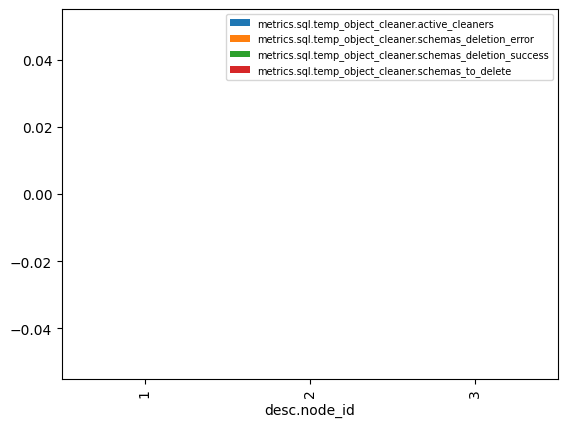

In [359]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.temp_object_cleaner.active_cleaners', 'metrics.sql.temp_object_cleaner.schemas_deletion_error', 'metrics.sql.temp_object_cleaner.schemas_deletion_success', 'metrics.sql.temp_object_cleaner.schemas_to_delete'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

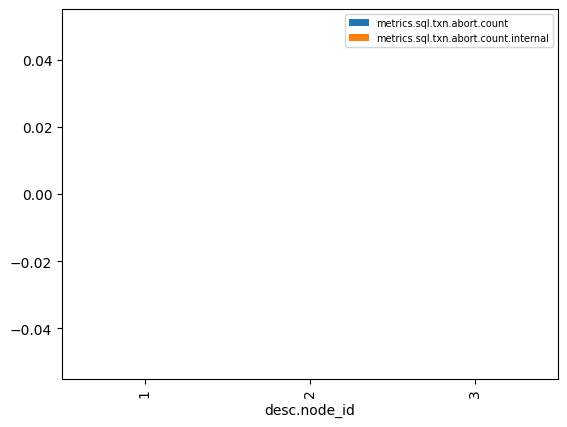

In [360]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.txn.abort.count', 'metrics.sql.txn.abort.count.internal'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

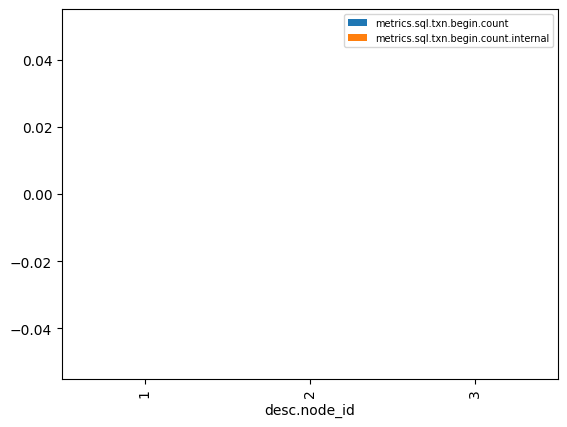

In [361]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.txn.begin.count', 'metrics.sql.txn.begin.count.internal'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

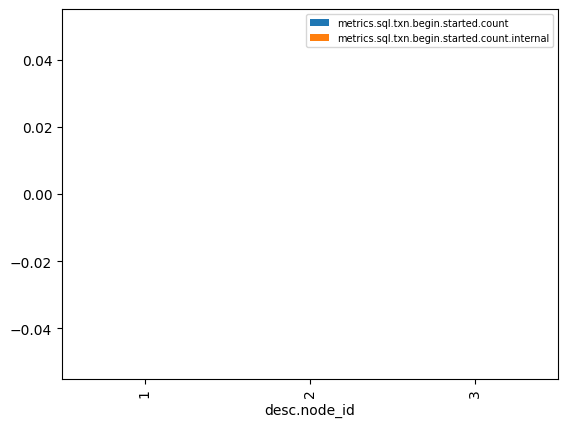

In [362]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.txn.begin.started.count', 'metrics.sql.txn.begin.started.count.internal'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

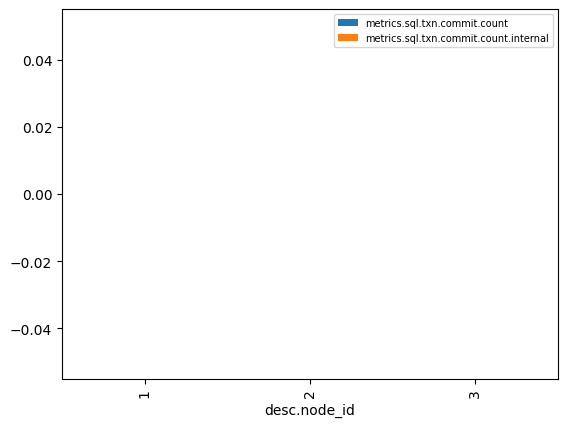

In [363]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.txn.commit.count', 'metrics.sql.txn.commit.count.internal'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

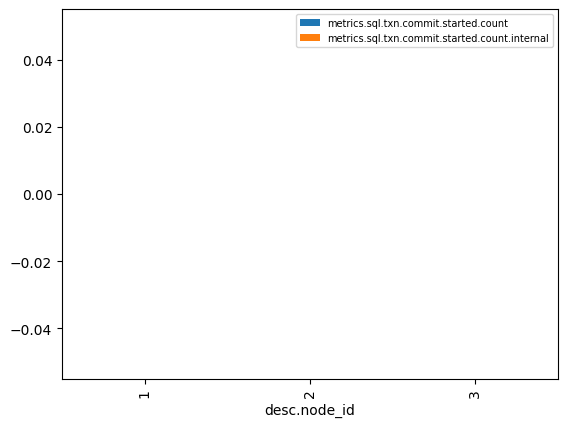

In [364]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.txn.commit.started.count', 'metrics.sql.txn.commit.started.count.internal'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

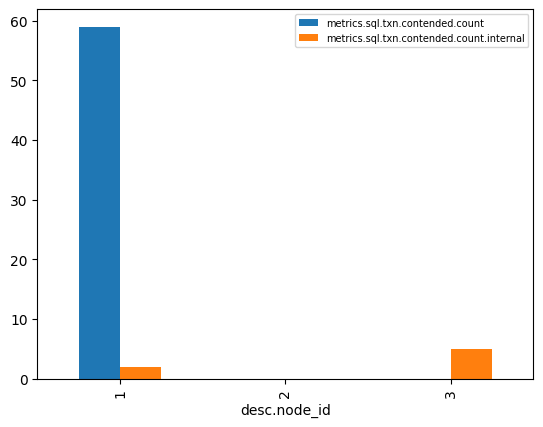

In [365]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.txn.contended.count', 'metrics.sql.txn.contended.count.internal'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

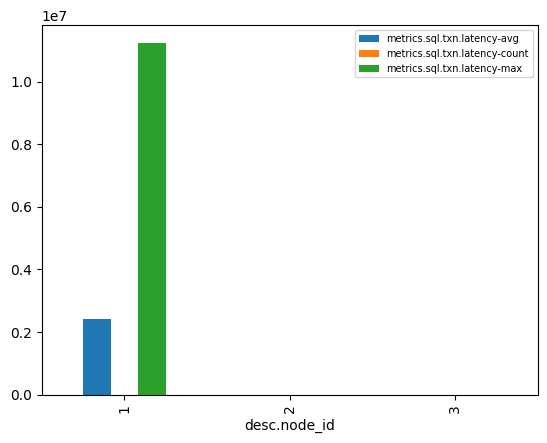

In [366]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.txn.latency-avg', 'metrics.sql.txn.latency-count', 'metrics.sql.txn.latency-max'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

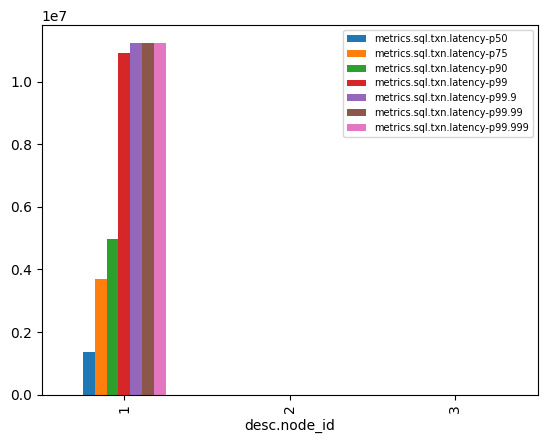

In [367]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.txn.latency-p50', 'metrics.sql.txn.latency-p75', 'metrics.sql.txn.latency-p90', 'metrics.sql.txn.latency-p99', 'metrics.sql.txn.latency-p99.9', 'metrics.sql.txn.latency-p99.99', 'metrics.sql.txn.latency-p99.999'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

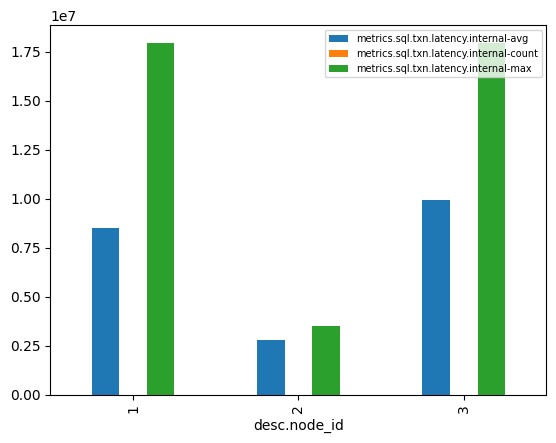

In [368]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.txn.latency.internal-avg', 'metrics.sql.txn.latency.internal-count', 'metrics.sql.txn.latency.internal-max'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

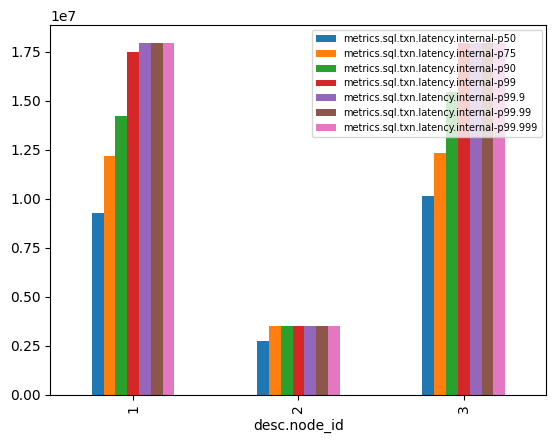

In [369]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.txn.latency.internal-p50', 'metrics.sql.txn.latency.internal-p75', 'metrics.sql.txn.latency.internal-p90', 'metrics.sql.txn.latency.internal-p99', 'metrics.sql.txn.latency.internal-p99.9', 'metrics.sql.txn.latency.internal-p99.99', 'metrics.sql.txn.latency.internal-p99.999'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

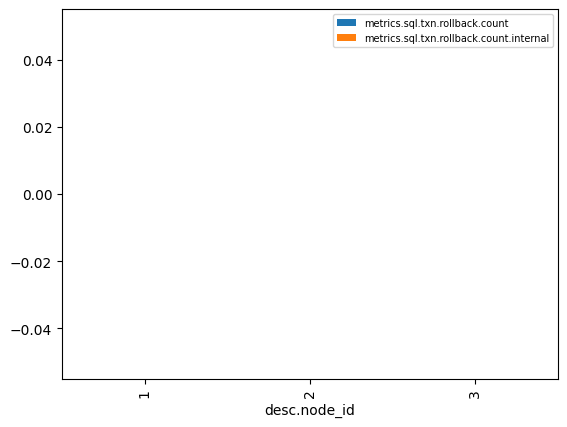

In [370]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.txn.rollback.count', 'metrics.sql.txn.rollback.count.internal'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

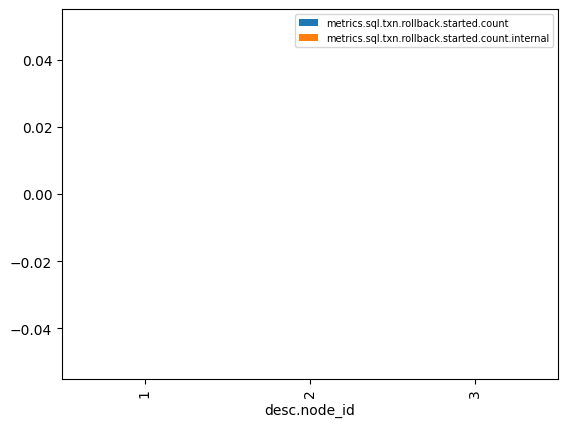

In [371]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.txn.rollback.started.count', 'metrics.sql.txn.rollback.started.count.internal'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

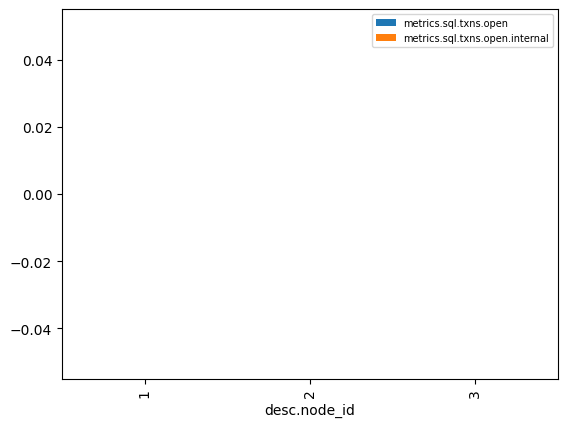

In [372]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.txns.open', 'metrics.sql.txns.open.internal'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

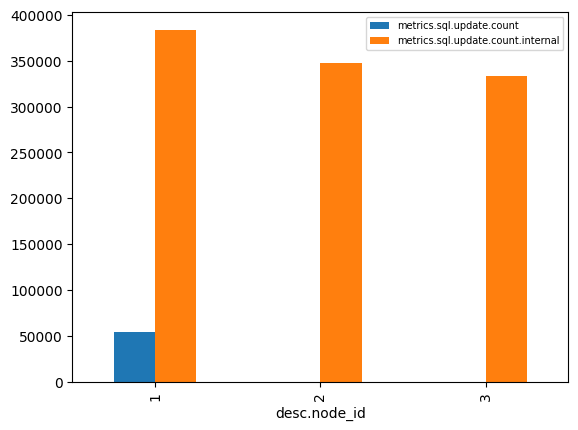

In [373]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.update.count', 'metrics.sql.update.count.internal'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

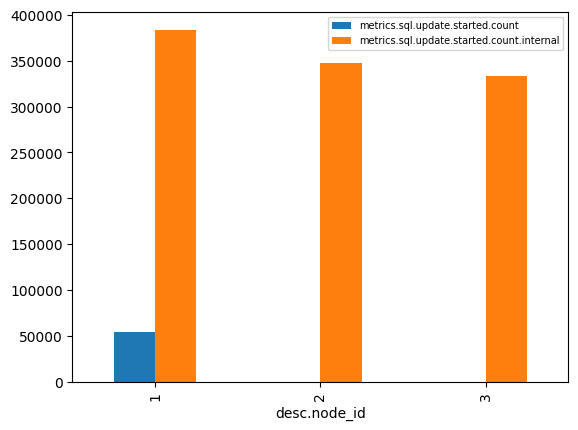

In [374]:
df.plot.bar(x='desc.node_id',y=['metrics.sql.update.started.count', 'metrics.sql.update.started.count.internal'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

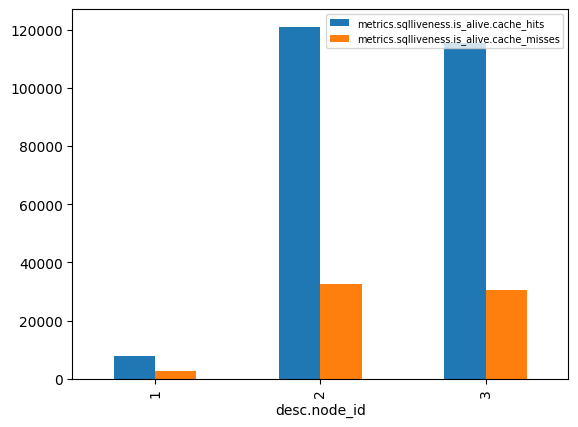

In [375]:
df.plot.bar(x='desc.node_id',y=['metrics.sqlliveness.is_alive.cache_hits', 'metrics.sqlliveness.is_alive.cache_misses'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

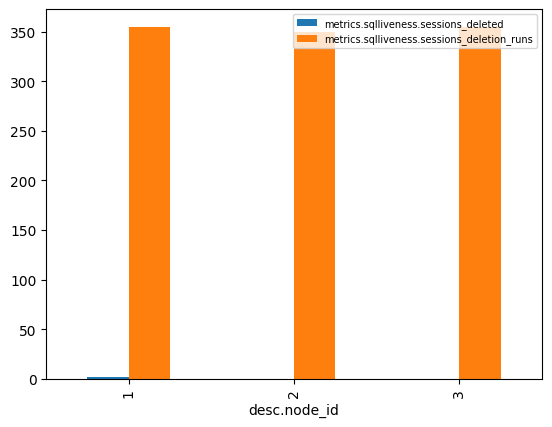

In [376]:
df.plot.bar(x='desc.node_id',y=['metrics.sqlliveness.sessions_deleted', 'metrics.sqlliveness.sessions_deletion_runs'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

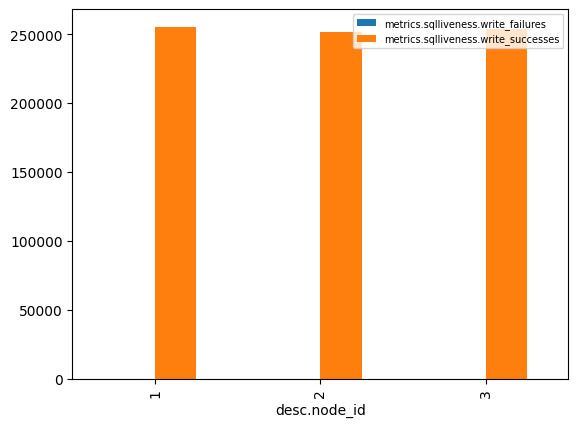

In [377]:
df.plot.bar(x='desc.node_id',y=['metrics.sqlliveness.write_failures', 'metrics.sqlliveness.write_successes'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

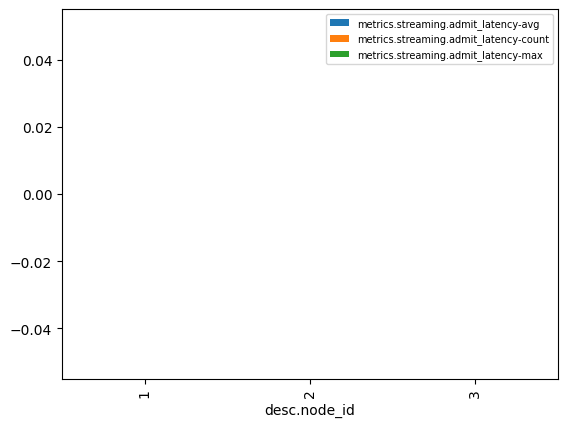

In [378]:
df.plot.bar(x='desc.node_id',y=['metrics.streaming.admit_latency-avg', 'metrics.streaming.admit_latency-count', 'metrics.streaming.admit_latency-max'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

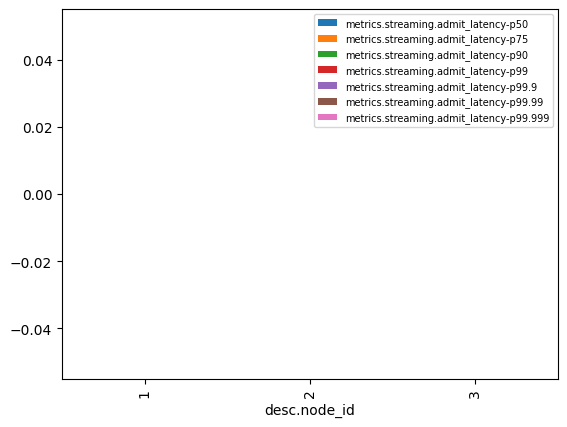

In [379]:
df.plot.bar(x='desc.node_id',y=['metrics.streaming.admit_latency-p50', 'metrics.streaming.admit_latency-p75', 'metrics.streaming.admit_latency-p90', 'metrics.streaming.admit_latency-p99', 'metrics.streaming.admit_latency-p99.9', 'metrics.streaming.admit_latency-p99.99', 'metrics.streaming.admit_latency-p99.999'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

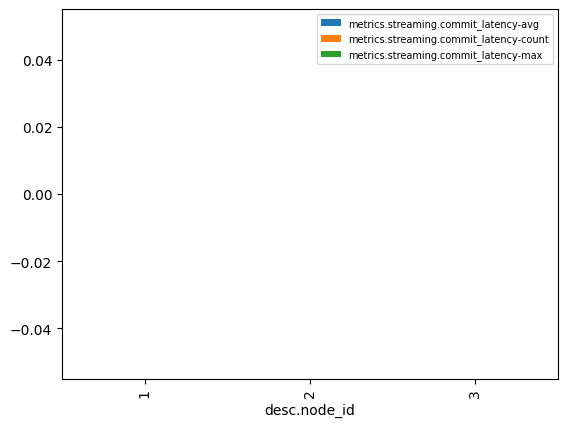

In [380]:
df.plot.bar(x='desc.node_id',y=['metrics.streaming.commit_latency-avg', 'metrics.streaming.commit_latency-count', 'metrics.streaming.commit_latency-max'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

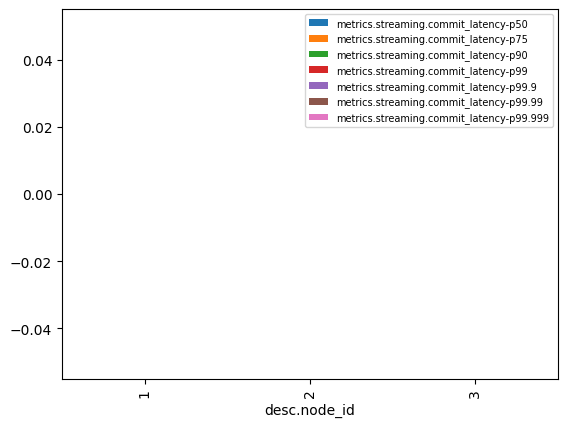

In [381]:
df.plot.bar(x='desc.node_id',y=['metrics.streaming.commit_latency-p50', 'metrics.streaming.commit_latency-p75', 'metrics.streaming.commit_latency-p90', 'metrics.streaming.commit_latency-p99', 'metrics.streaming.commit_latency-p99.9', 'metrics.streaming.commit_latency-p99.99', 'metrics.streaming.commit_latency-p99.999'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

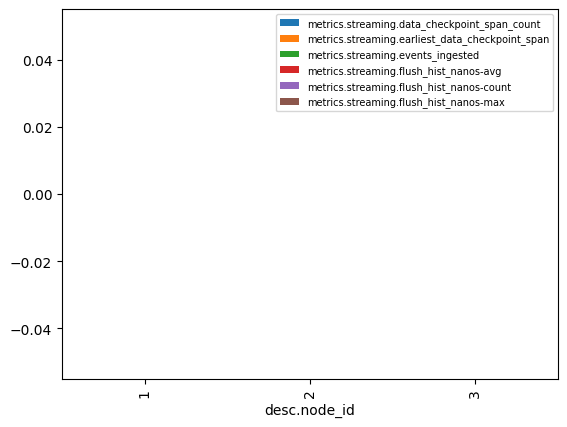

In [382]:
df.plot.bar(x='desc.node_id',y=['metrics.streaming.data_checkpoint_span_count', 'metrics.streaming.earliest_data_checkpoint_span', 'metrics.streaming.events_ingested', 'metrics.streaming.flush_hist_nanos-avg', 'metrics.streaming.flush_hist_nanos-count', 'metrics.streaming.flush_hist_nanos-max'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

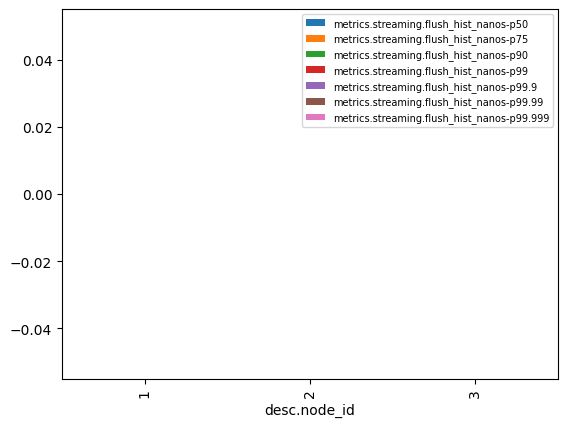

In [383]:
df.plot.bar(x='desc.node_id',y=['metrics.streaming.flush_hist_nanos-p50', 'metrics.streaming.flush_hist_nanos-p75', 'metrics.streaming.flush_hist_nanos-p90', 'metrics.streaming.flush_hist_nanos-p99', 'metrics.streaming.flush_hist_nanos-p99.9', 'metrics.streaming.flush_hist_nanos-p99.99', 'metrics.streaming.flush_hist_nanos-p99.999'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

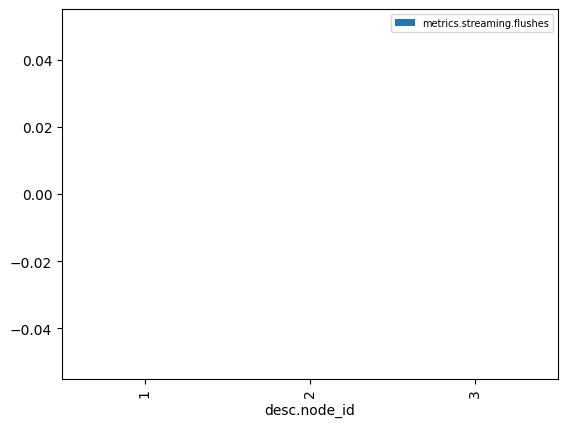

In [384]:
df.plot.bar(x='desc.node_id',y=['metrics.streaming.flushes'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

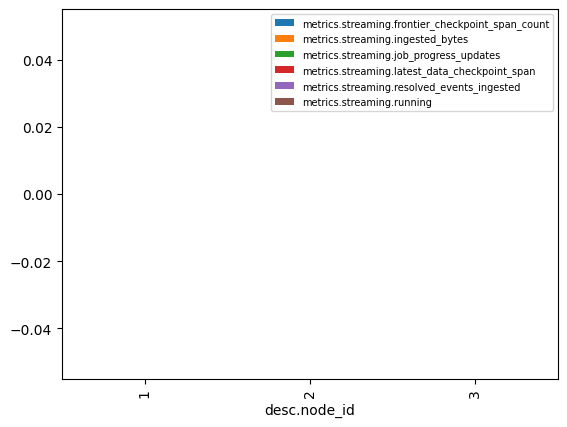

In [385]:
df.plot.bar(x='desc.node_id',y=['metrics.streaming.frontier_checkpoint_span_count', 'metrics.streaming.ingested_bytes', 'metrics.streaming.job_progress_updates', 'metrics.streaming.latest_data_checkpoint_span', 'metrics.streaming.resolved_events_ingested', 'metrics.streaming.running'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

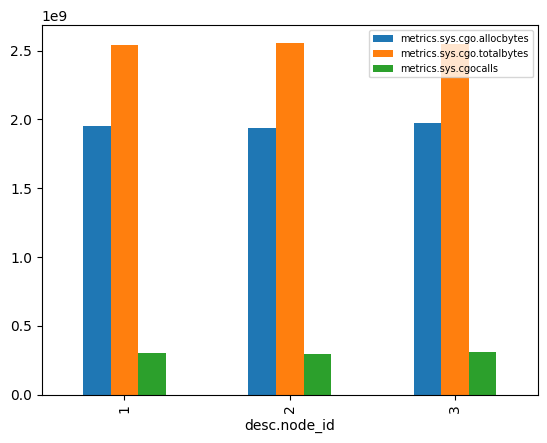

In [386]:
df.plot.bar(x='desc.node_id',y=['metrics.sys.cgo.allocbytes', 'metrics.sys.cgo.totalbytes', 'metrics.sys.cgocalls'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

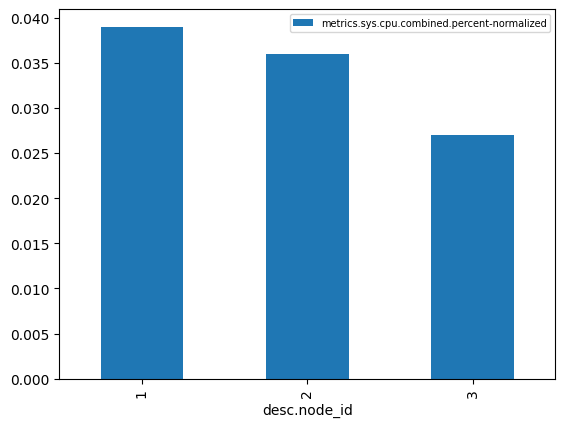

In [387]:
df.plot.bar(x='desc.node_id',y=['metrics.sys.cpu.combined.percent-normalized'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

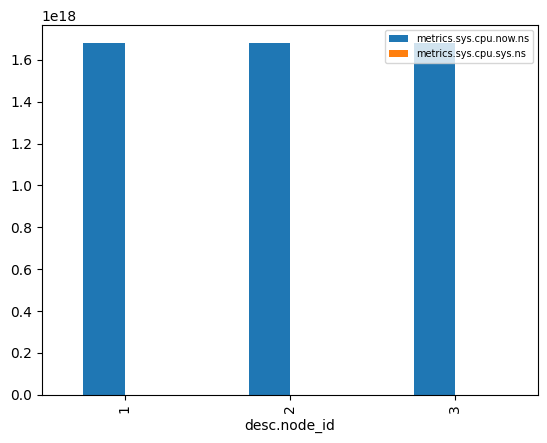

In [388]:
df.plot.bar(x='desc.node_id',y=['metrics.sys.cpu.now.ns', 'metrics.sys.cpu.sys.ns'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

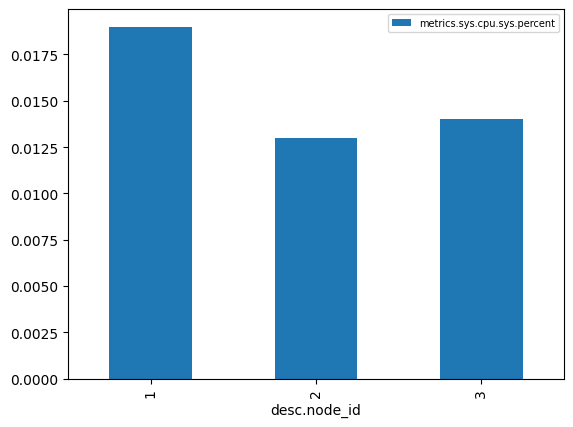

In [389]:
df.plot.bar(x='desc.node_id',y=['metrics.sys.cpu.sys.percent'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

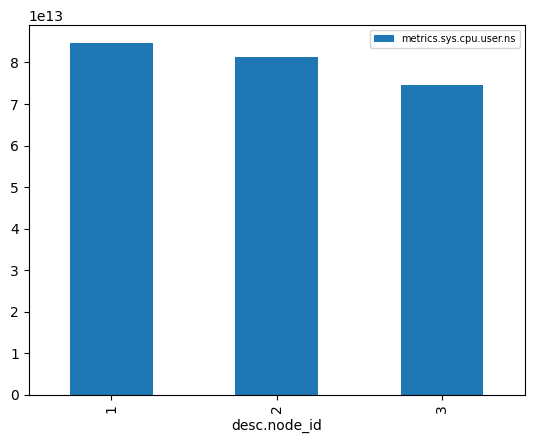

In [390]:
df.plot.bar(x='desc.node_id',y=['metrics.sys.cpu.user.ns'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

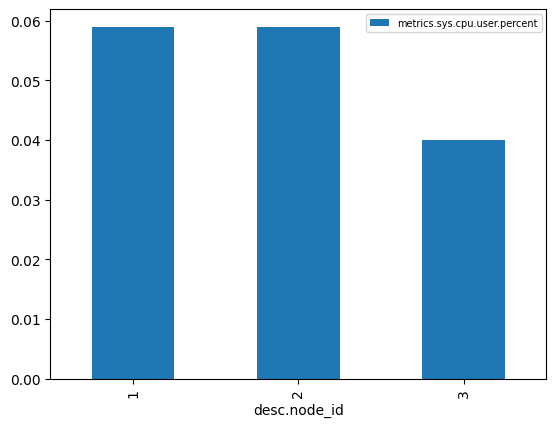

In [391]:
df.plot.bar(x='desc.node_id',y=['metrics.sys.cpu.user.percent'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

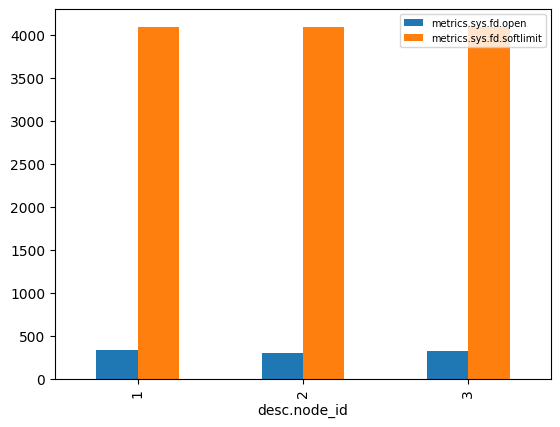

In [392]:
df.plot.bar(x='desc.node_id',y=['metrics.sys.fd.open', 'metrics.sys.fd.softlimit'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

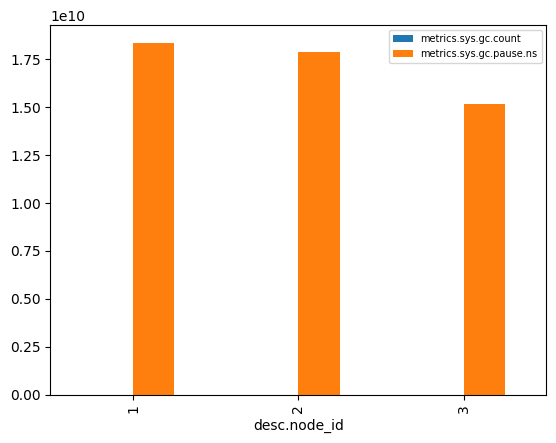

In [393]:
df.plot.bar(x='desc.node_id',y=['metrics.sys.gc.count', 'metrics.sys.gc.pause.ns'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

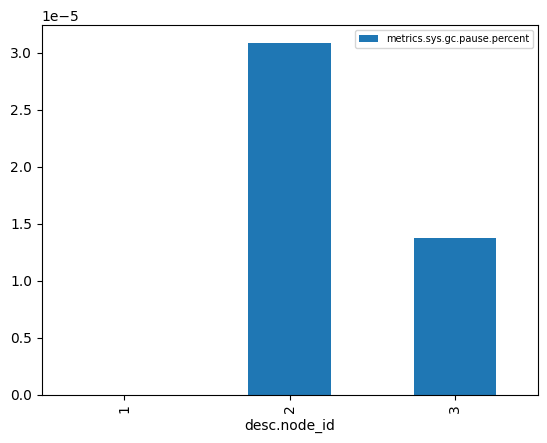

In [394]:
df.plot.bar(x='desc.node_id',y=['metrics.sys.gc.pause.percent'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

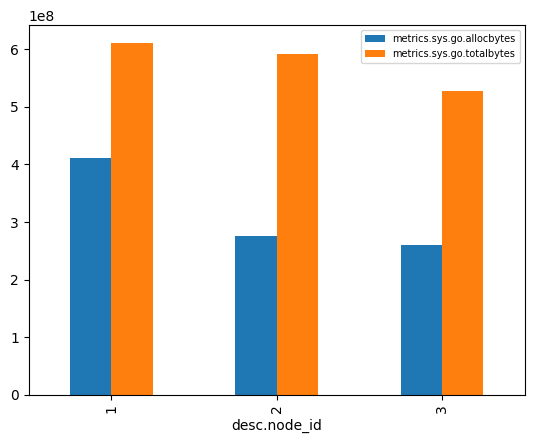

In [395]:
df.plot.bar(x='desc.node_id',y=['metrics.sys.go.allocbytes', 'metrics.sys.go.totalbytes'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

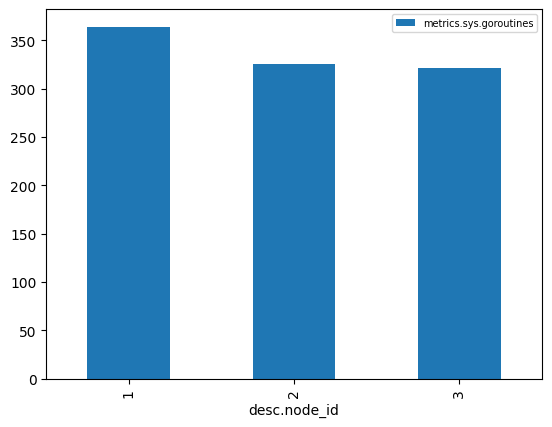

In [396]:
df.plot.bar(x='desc.node_id',y=['metrics.sys.goroutines'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

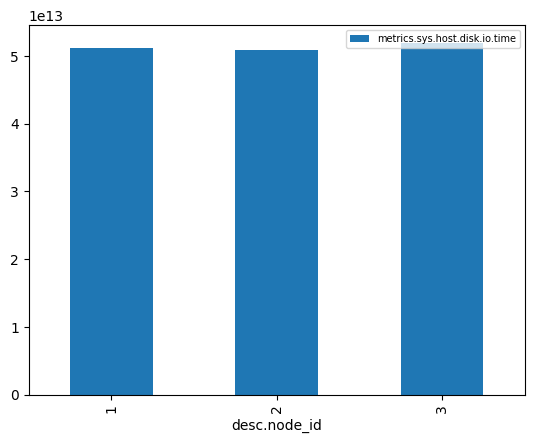

In [397]:
df.plot.bar(x='desc.node_id',y=['metrics.sys.host.disk.io.time'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

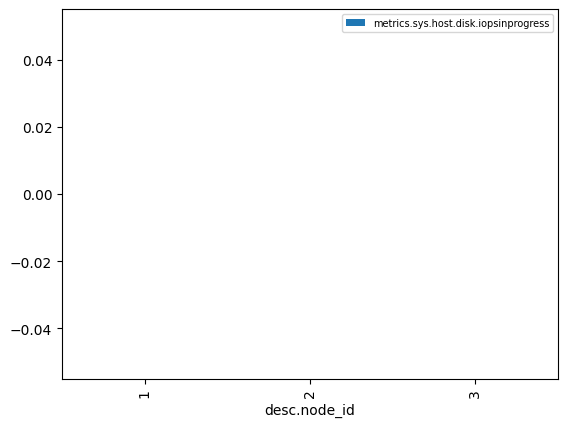

In [398]:
df.plot.bar(x='desc.node_id',y=['metrics.sys.host.disk.iopsinprogress'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

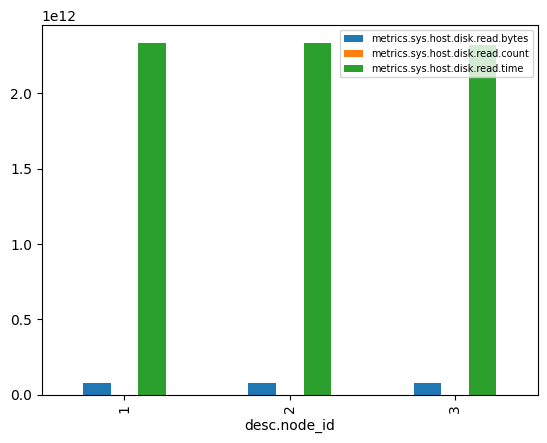

In [399]:
df.plot.bar(x='desc.node_id',y=['metrics.sys.host.disk.read.bytes', 'metrics.sys.host.disk.read.count', 'metrics.sys.host.disk.read.time'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

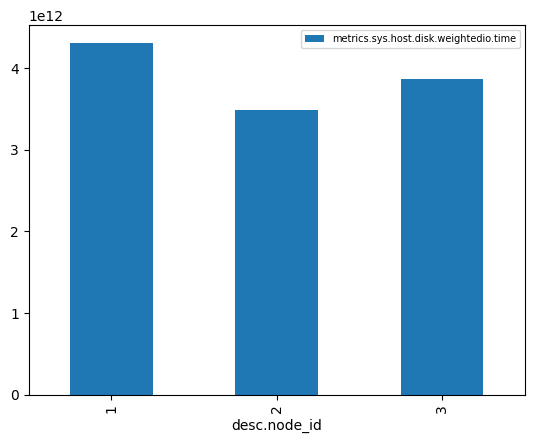

In [400]:
df.plot.bar(x='desc.node_id',y=['metrics.sys.host.disk.weightedio.time'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

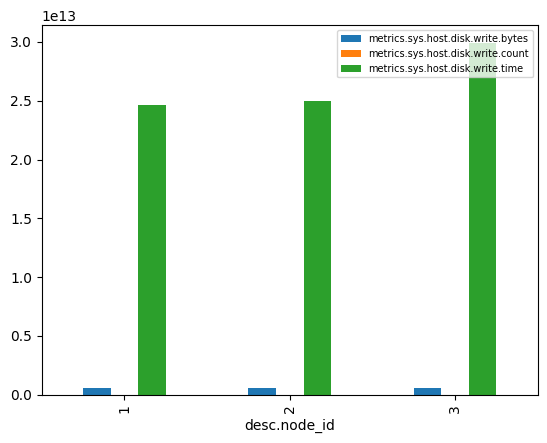

In [401]:
df.plot.bar(x='desc.node_id',y=['metrics.sys.host.disk.write.bytes', 'metrics.sys.host.disk.write.count', 'metrics.sys.host.disk.write.time'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

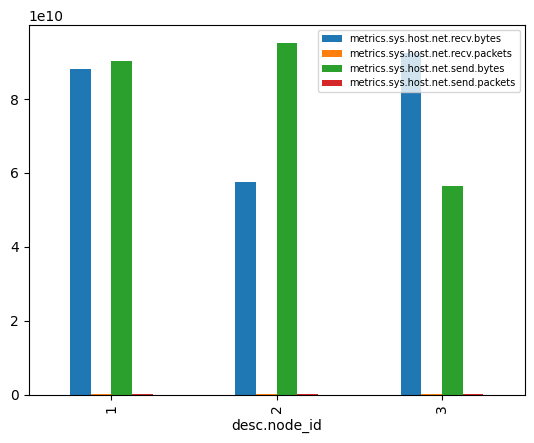

In [402]:
df.plot.bar(x='desc.node_id',y=['metrics.sys.host.net.recv.bytes', 'metrics.sys.host.net.recv.packets', 'metrics.sys.host.net.send.bytes', 'metrics.sys.host.net.send.packets'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

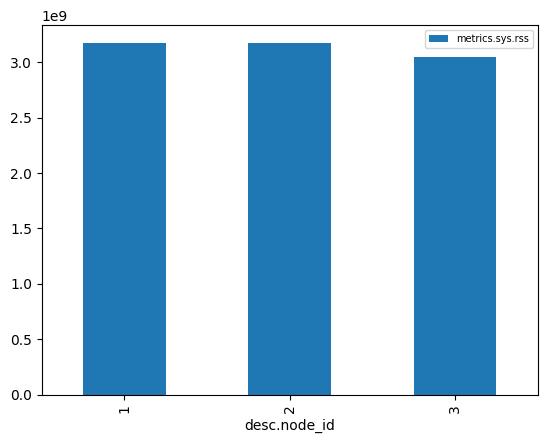

In [403]:
df.plot.bar(x='desc.node_id',y=['metrics.sys.rss'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

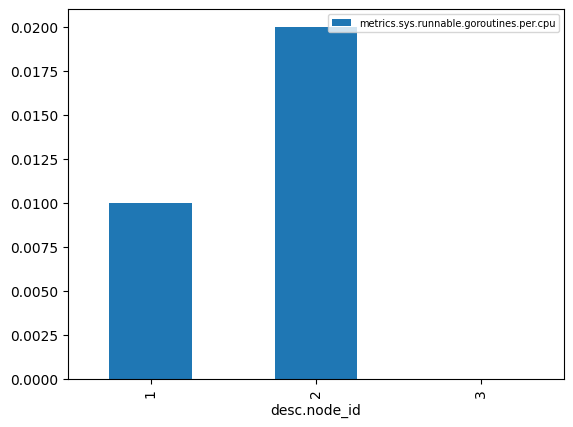

In [404]:
df.plot.bar(x='desc.node_id',y=['metrics.sys.runnable.goroutines.per.cpu'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

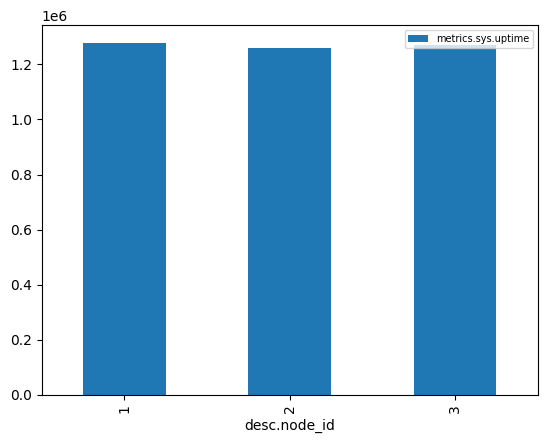

In [405]:
df.plot.bar(x='desc.node_id',y=['metrics.sys.uptime'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

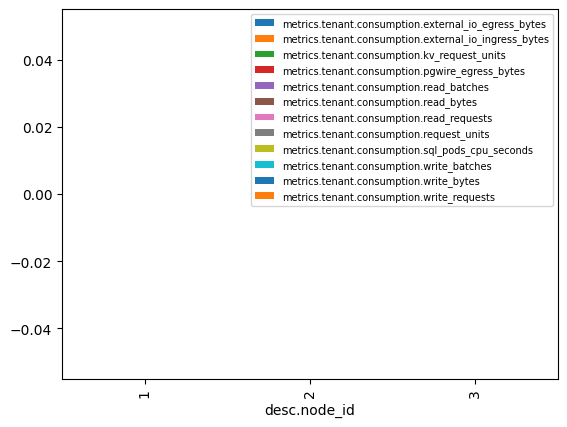

In [406]:
df.plot.bar(x='desc.node_id',y=['metrics.tenant.consumption.external_io_egress_bytes', 'metrics.tenant.consumption.external_io_ingress_bytes', 'metrics.tenant.consumption.kv_request_units', 'metrics.tenant.consumption.pgwire_egress_bytes', 'metrics.tenant.consumption.read_batches', 'metrics.tenant.consumption.read_bytes', 'metrics.tenant.consumption.read_requests', 'metrics.tenant.consumption.request_units', 'metrics.tenant.consumption.sql_pods_cpu_seconds', 'metrics.tenant.consumption.write_batches', 'metrics.tenant.consumption.write_bytes', 'metrics.tenant.consumption.write_requests'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

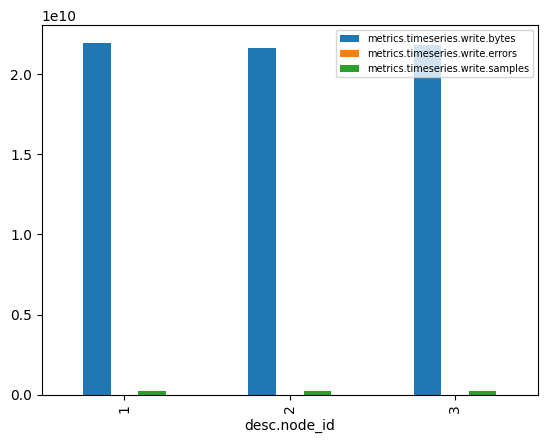

In [407]:
df.plot.bar(x='desc.node_id',y=['metrics.timeseries.write.bytes', 'metrics.timeseries.write.errors', 'metrics.timeseries.write.samples'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

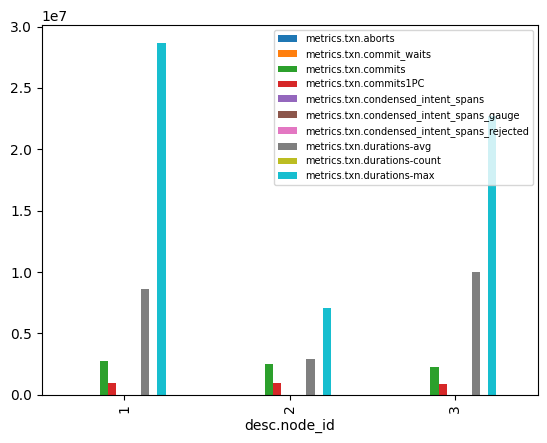

In [408]:
df.plot.bar(x='desc.node_id',y=['metrics.txn.aborts', 'metrics.txn.commit_waits', 'metrics.txn.commits', 'metrics.txn.commits1PC', 'metrics.txn.condensed_intent_spans', 'metrics.txn.condensed_intent_spans_gauge', 'metrics.txn.condensed_intent_spans_rejected', 'metrics.txn.durations-avg', 'metrics.txn.durations-count', 'metrics.txn.durations-max'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

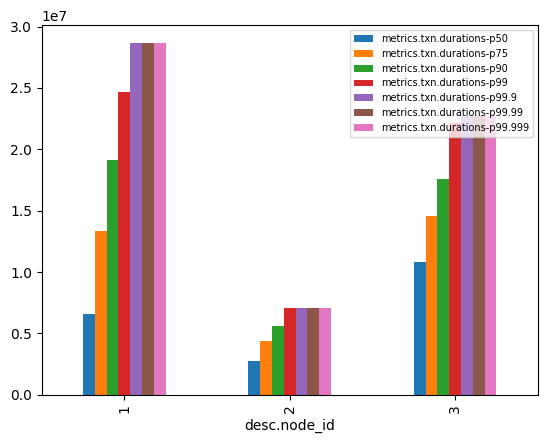

In [409]:
df.plot.bar(x='desc.node_id',y=['metrics.txn.durations-p50', 'metrics.txn.durations-p75', 'metrics.txn.durations-p90', 'metrics.txn.durations-p99', 'metrics.txn.durations-p99.9', 'metrics.txn.durations-p99.99', 'metrics.txn.durations-p99.999'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

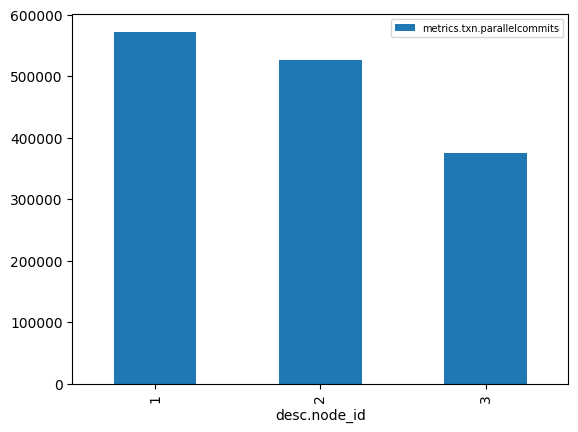

In [410]:
df.plot.bar(x='desc.node_id',y=['metrics.txn.parallelcommits'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

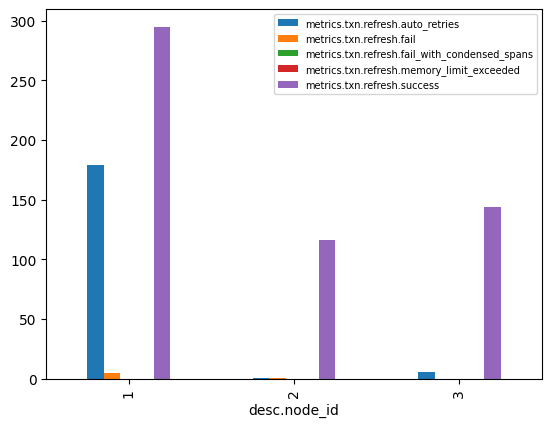

In [411]:
df.plot.bar(x='desc.node_id',y=['metrics.txn.refresh.auto_retries', 'metrics.txn.refresh.fail', 'metrics.txn.refresh.fail_with_condensed_spans', 'metrics.txn.refresh.memory_limit_exceeded', 'metrics.txn.refresh.success'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

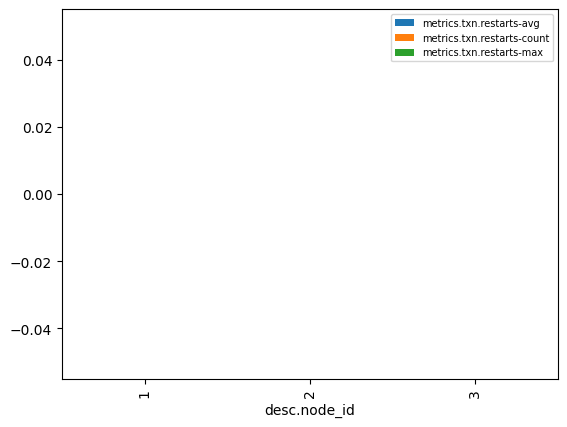

In [412]:
df.plot.bar(x='desc.node_id',y=['metrics.txn.restarts-avg', 'metrics.txn.restarts-count', 'metrics.txn.restarts-max'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

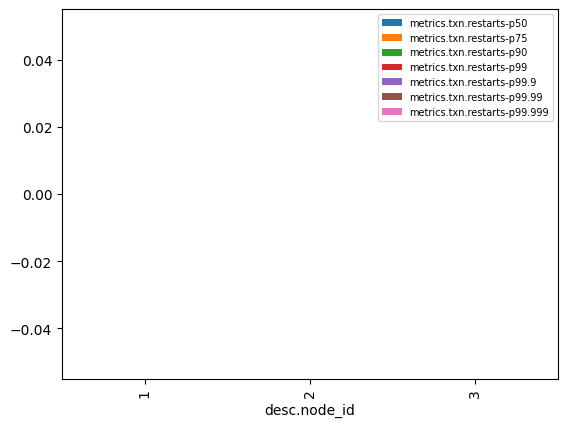

In [413]:
df.plot.bar(x='desc.node_id',y=['metrics.txn.restarts-p50', 'metrics.txn.restarts-p75', 'metrics.txn.restarts-p90', 'metrics.txn.restarts-p99', 'metrics.txn.restarts-p99.9', 'metrics.txn.restarts-p99.99', 'metrics.txn.restarts-p99.999'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()

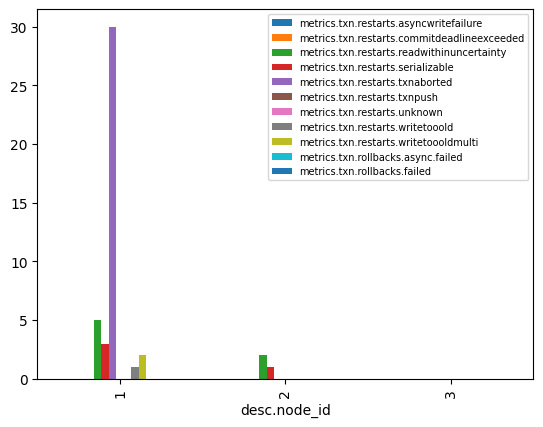

In [414]:
df.plot.bar(x='desc.node_id',y=['metrics.txn.restarts.asyncwritefailure', 'metrics.txn.restarts.commitdeadlineexceeded', 'metrics.txn.restarts.readwithinuncertainty', 'metrics.txn.restarts.serializable', 'metrics.txn.restarts.txnaborted', 'metrics.txn.restarts.txnpush', 'metrics.txn.restarts.unknown', 'metrics.txn.restarts.writetooold', 'metrics.txn.restarts.writetoooldmulti', 'metrics.txn.rollbacks.async.failed', 'metrics.txn.rollbacks.failed'])
plt.legend(fontsize='7', loc ='upper right')
plt.show()